<a href="https://colab.research.google.com/github/wiltacca/Portfolio/blob/main/Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation

In [25]:
# Import required libraries
import numpy as np
import pandas as pd
from numpy import median, mean
import seaborn as sns

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

import plotly.express as px

from scipy.stats import pearsonr

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import PercentFormatter

%matplotlib inline
%config InlineBackend.figure_formats = ['retina'] # Changing figures from PNG to retina for higher definition

# Load dataset into a DataFrame, df

url = 'https://raw.githubusercontent.com/wiltacca/Portfolio/main/Datasets/cardio_good_fitness.csv'

df = pd.read_csv(url, na_values = 'na') # recognize 'na' in dataset as NaN in dataframe

# Create a copy of the DataFrame for backup, df_bkup
df_bkup = df.copy()

# Option controls the number of columns to be printed
pd.set_option("max_columns", None)
# Turn off Option controls the number of columns to be printed
#pd.reset_option("max_columns")

# Option controls the number of rows to be printed
#pd.set_option('max_rows', None) 
# Turn off Option controls the number of rows to be printed
#pd.reset_option('max_rows') 

# Check tuple of shape (rows, columns) of dataframe
print(df.shape)

# Check size of dataframe which is rows x columns
print(df.size)

# Check dimension of dataframe
print(df.ndim)

# Check data type of each column
print(df.info())

# Show first 10 rows of df
df.head(10)

(183, 10)
1830
2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        183 non-null    object 
 1   Branch         183 non-null    object 
 2   Age            174 non-null    float64
 3   Gender         180 non-null    object 
 4   Education      180 non-null    float64
 5   MaritalStatus  180 non-null    object 
 6   Usage          172 non-null    float64
 7   Fitness        180 non-null    float64
 8   Income         180 non-null    float64
 9   Miles          180 non-null    float64
dtypes: float64(6), object(4)
memory usage: 14.4+ KB
None


Product Branch   Age  Gender  Education MaritalStatus  Usage  Fitness  \
0   TM195   West  18.0    Male       14.0        Single    NaN      4.0   
1   TM195   East  19.0    Male       15.0        Single    2.0      3.0   
2   TM195   West  19.0  Female       14.0             P    4.0      3.0   
3   TM195  South   NaN     NaN        NaN           NaN    NaN      NaN   
4   TM195   West  19.0    Male       12.0             S    NaN      3.0   
5   TM195  North  20.0    Male       13.0     Partnered    4.0      2.0   
6   TM195   East  20.0  Female       14.0     Partnered    3.0      3.0   
7   TM195   East  21.0  Female       14.0     Partnered    3.0      3.0   
8   TM195   West  21.0    Male       13.0        Single    NaN      3.0   
9   TM195   West  21.0    Male       15.0        Single    5.0      4.0   

    Income  Miles  
0  29562.0  112.0  
1  31836.0   75.0  
2  30699.0   66.0  
3      NaN    NaN  
4  32973.0   85.0  
5  35247.0   47.0  
6  32973.0   66.0  
7  35247.0   75.0  
8  32973.0   85.0  
9  35247.0  141.0

Based upon the above analysis, I realise that some columns have missing data:

* Age: 174 non-null - to replace with mode()

* Gender: 180 non-null - to replace with mode()

* Education :180 non-null - to replace wtih median()

* MaritalStatus: 180 non-null - to replace with mode()

* Usage: 172 non-null - to replace with mode()
 
* Fitness: 180 non-null - to replace with mode()

* Income: 180 non-null - to replace with mean()

* Miles: 180 non-null - to replace with mean()

There are supposed to be total 183 rows in the dataset. 

Let transform and handle the missing data with the most sensible data.

In [3]:
# Summary of numerical & non-numerical variables
df.describe(include="all") 

Product Branch         Age Gender   Education MaritalStatus  \
count      183    183  174.000000    180  180.000000           180   
unique       3      4         NaN      2         NaN             4   
top      TM195  South         NaN   Male         NaN     Partnered   
freq        81     50         NaN    104         NaN           102   
mean       NaN    NaN   28.781609    NaN   15.572222           NaN   
std        NaN    NaN    7.062766    NaN    1.617055           NaN   
min        NaN    NaN   18.000000    NaN   12.000000           NaN   
25%        NaN    NaN   24.000000    NaN   14.000000           NaN   
50%        NaN    NaN   26.000000    NaN   16.000000           NaN   
75%        NaN    NaN   33.000000    NaN   16.000000           NaN   
max        NaN    NaN   50.000000    NaN   21.000000           NaN   

             Usage     Fitness         Income       Miles  
count   172.000000  180.000000     180.000000  180.000000  
unique         NaN         NaN            NaN         NaN  
top            NaN         NaN            NaN         NaN  
freq           NaN         NaN            NaN         NaN  
mean      3.476744    3.311111   53719.577778  103.194444  
std       1.105296    0.958869   16506.684226   51.863605  
min       2.000000    1.000000   29562.000000   21.000000  
25%       3.000000    3.000000   44058.750000   66.000000  
50%       3.000000    3.000000   50596.500000   94.000000  
75%       4.000000    4.000000   58668.000000  114.750000  
max       7.000000    5.000000  104581.000000  360.000000

In [4]:
# Replace multiple values with multiple new values for an individual DataFrame column
df["MaritalStatus"] = df["MaritalStatus"].replace(["P","S"],["Partnered", "Single"])

# Display for sanity check
df["MaritalStatus"]

0         Single
1         Single
2      Partnered
3            NaN
4         Single
         ...    
178       Single
179       Single
180       Single
181    Partnered
182    Partnered
Name: MaritalStatus, Length: 183, dtype: object

In [5]:
# Replace the missing data with mode()
df["Age"].fillna(df["Age"].mode()[0], inplace=True)
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["MaritalStatus"].fillna(df["MaritalStatus"].mode()[0], inplace=True)
df["Usage"].fillna(df["Usage"].mode()[0], inplace=True)
df["Fitness"].fillna(df["Fitness"].mode()[0], inplace=True)

# Check for null value
print(df["Age"].isnull().sum())
print(df["Gender"].isnull().sum())
print(df["MaritalStatus"].isnull().sum())
print(df["Usage"].isnull().sum())
print(df["Fitness"].isnull().sum())

0
0
0
0
0


In [6]:
# Replace the missing data with median()
df["Education"].fillna(df["Education"].median(), inplace=True)

# Check for null value
print(df["Education"].isnull().sum())

0


In [7]:
# Replace the missing data with mean()
df["Income"].fillna(df["Income"].mean(), inplace=True)
df["Miles"].fillna(df["Miles"].mean(), inplace=True)

# Check for null value
print(df["Income"].isnull().sum())
print(df["Miles"].isnull().sum())

0
0


In [8]:
# Conversion of data type from float to integer
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Usage"] = df["Usage"].astype(int)
df["Fitness"] = df["Fitness"].astype(int)
df["Income"] = df["Income"].astype(int)
df["Miles"] = df["Miles"].astype(int)

# Check data type of each column 
print(df.dtypes)

Product          object
Branch           object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


## Static Visualisations

## PairGrid 

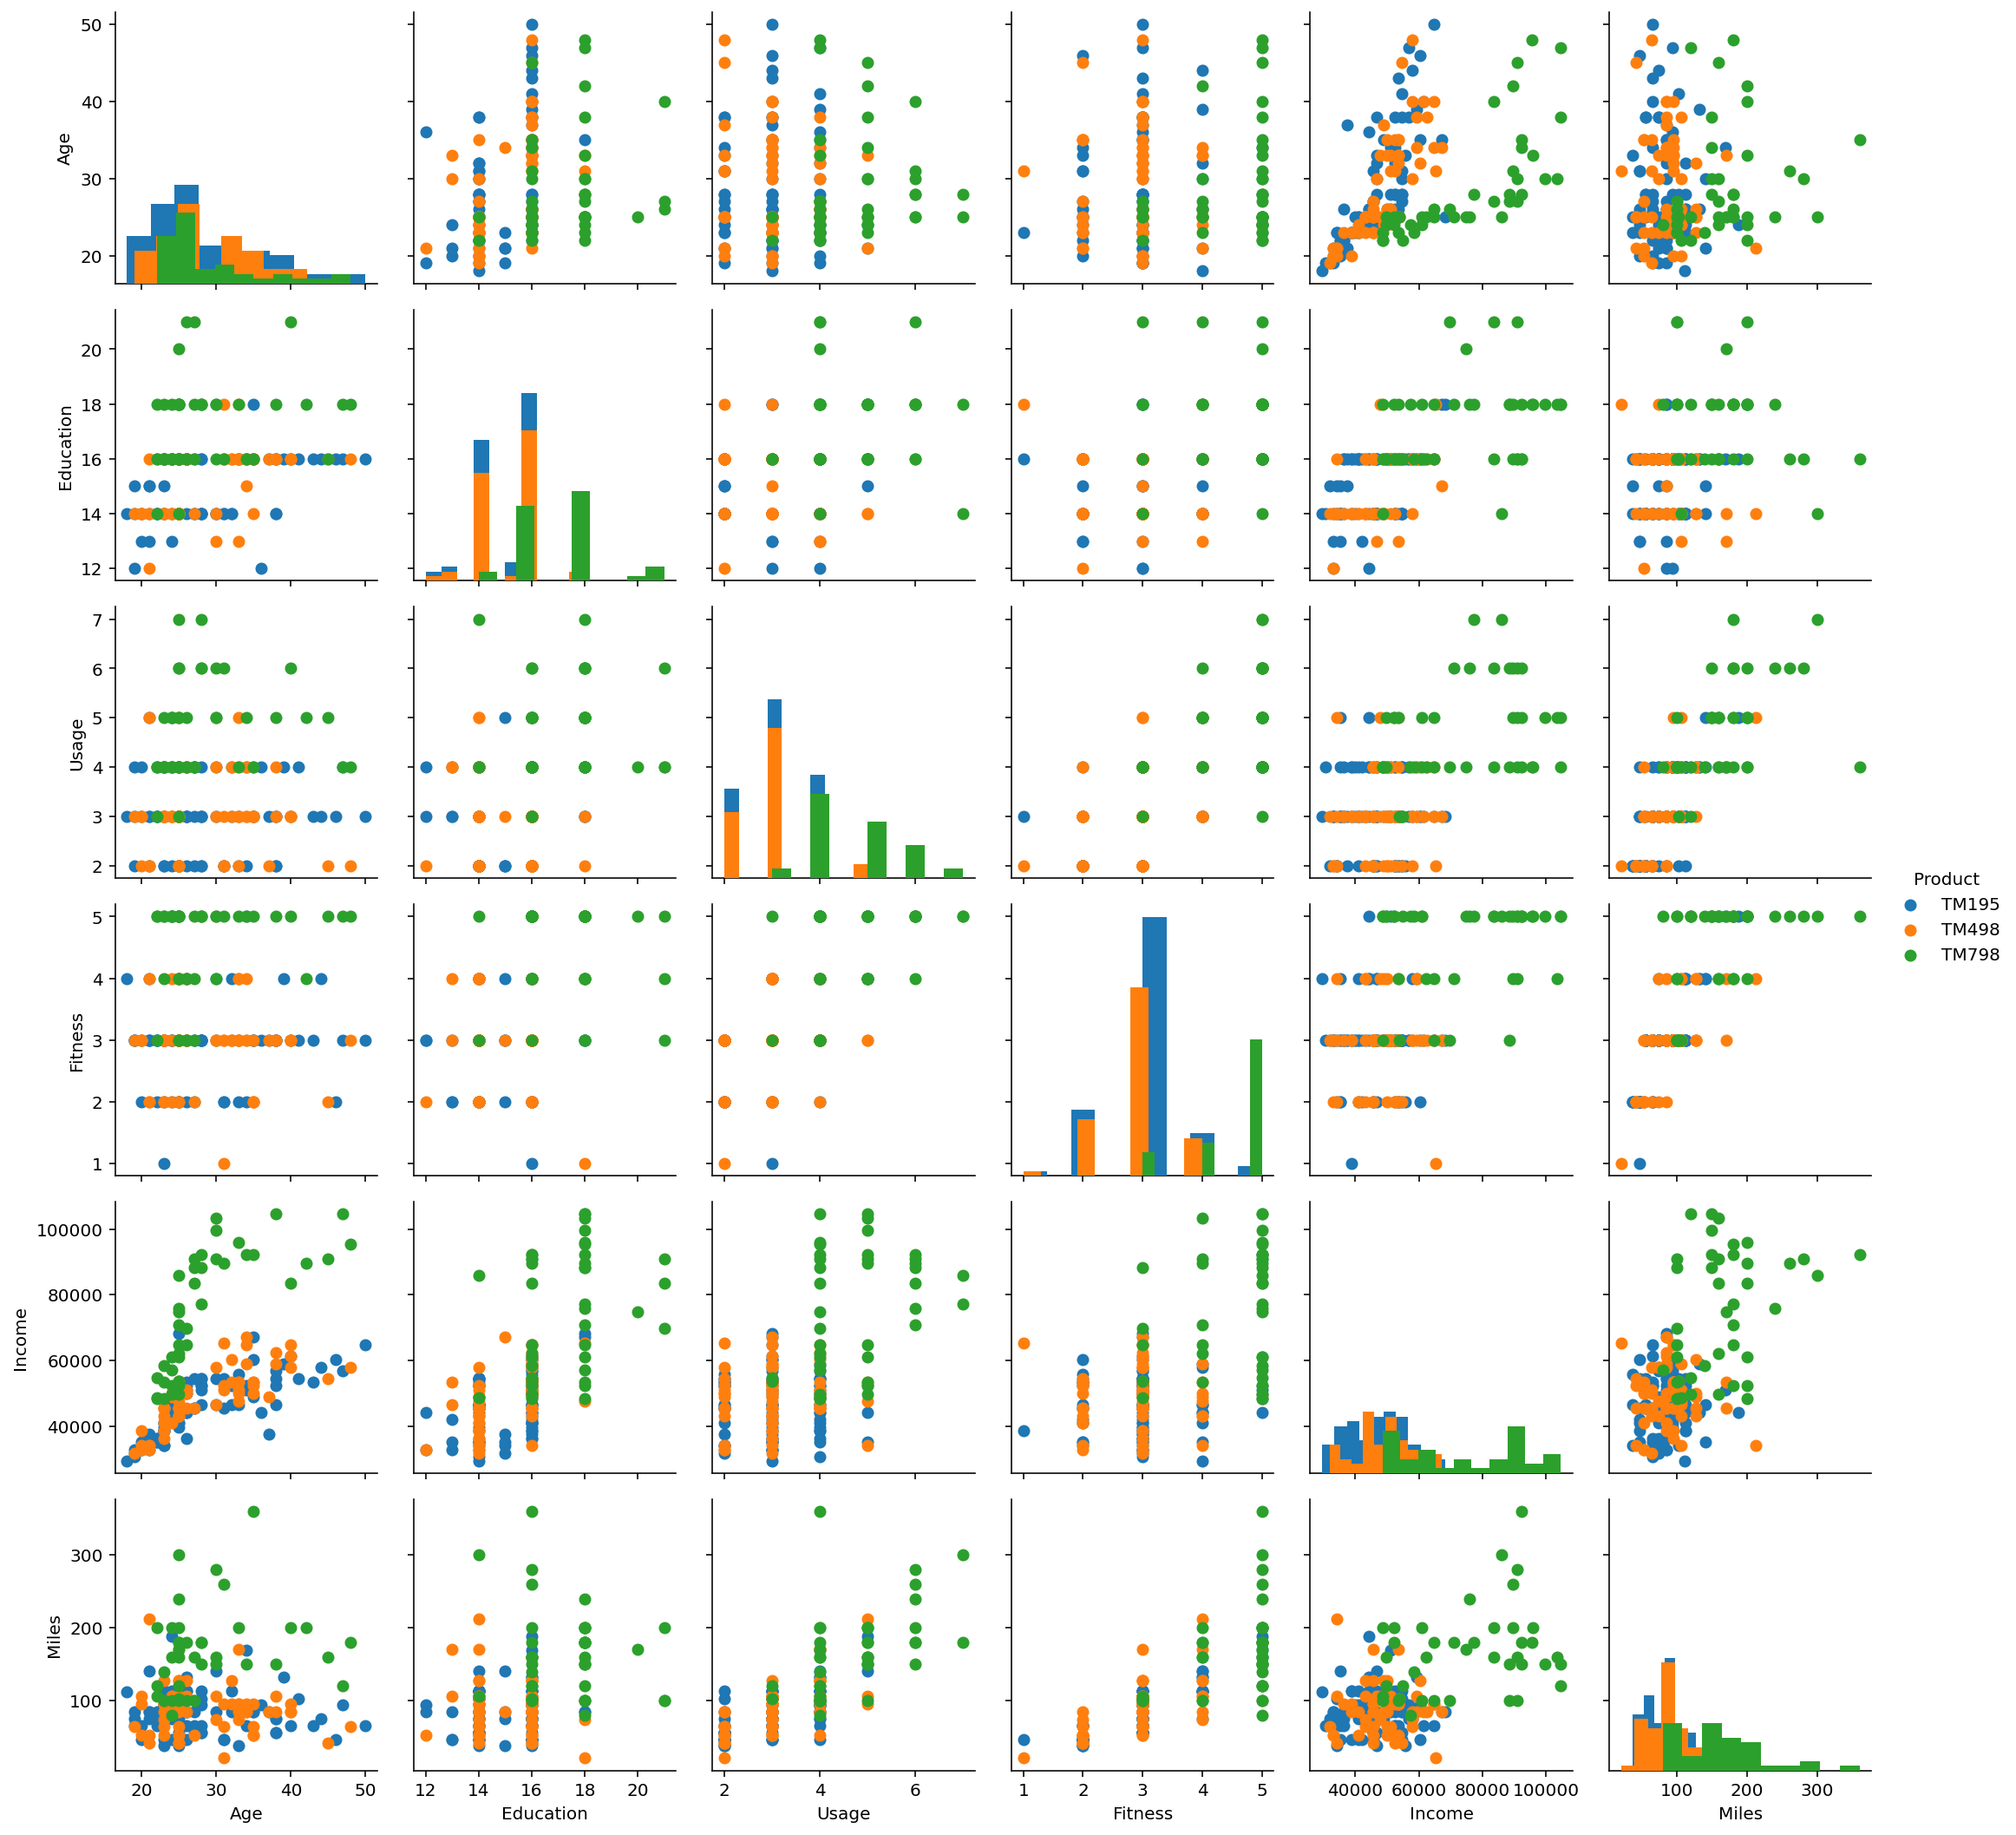

In [10]:
# PairGrid object with hue 
graph = sns.PairGrid(df, hue ="Product") 

# type of graph for diagonal 
graph = graph.map_diag(plt.hist) 

# type of graph for non-diagonal 
graph = graph.map_offdiag(plt.scatter) 

# to add legends 
graph = graph.add_legend() 

# Show the plot
plt.show() 

## Pair Plots

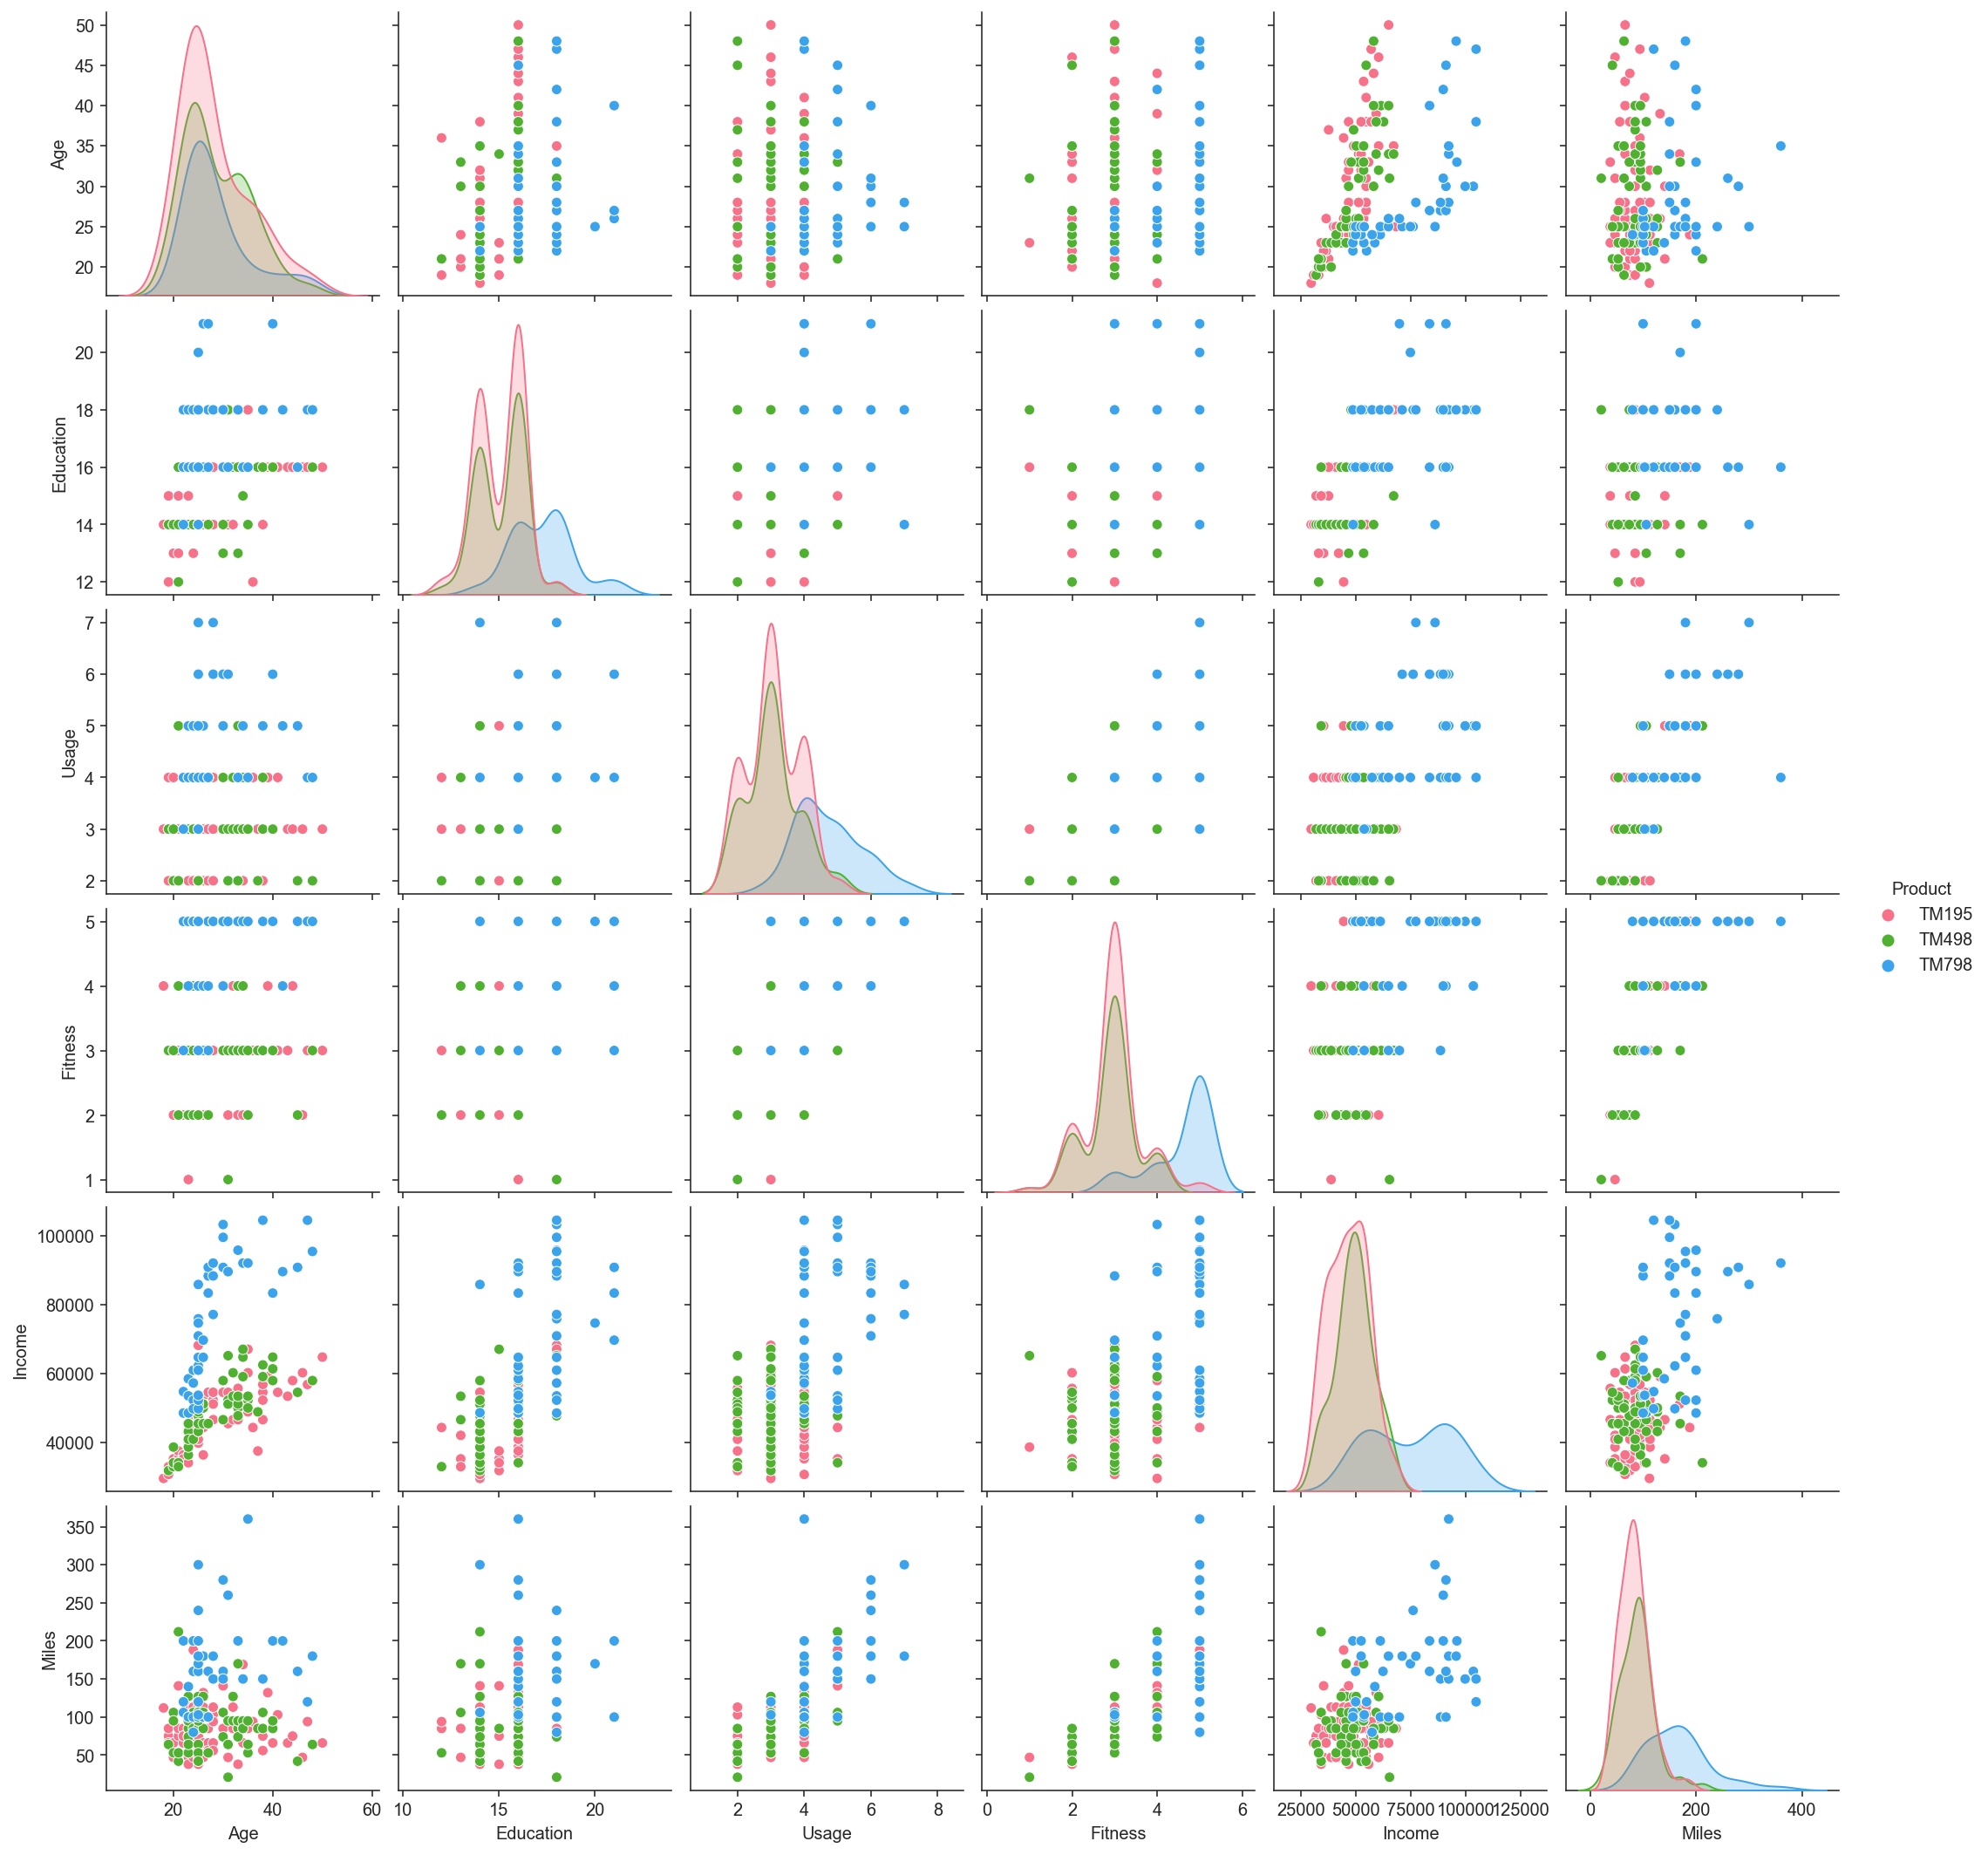

In [ ]:
# Set theme
sns.set_style("ticks")

# create pairplot
sns.pairplot(df,hue = 'Product',diag_kind = "kde",kind = "scatter",palette = "husl")

# Display the plot 
plt.show()

## Box Plot

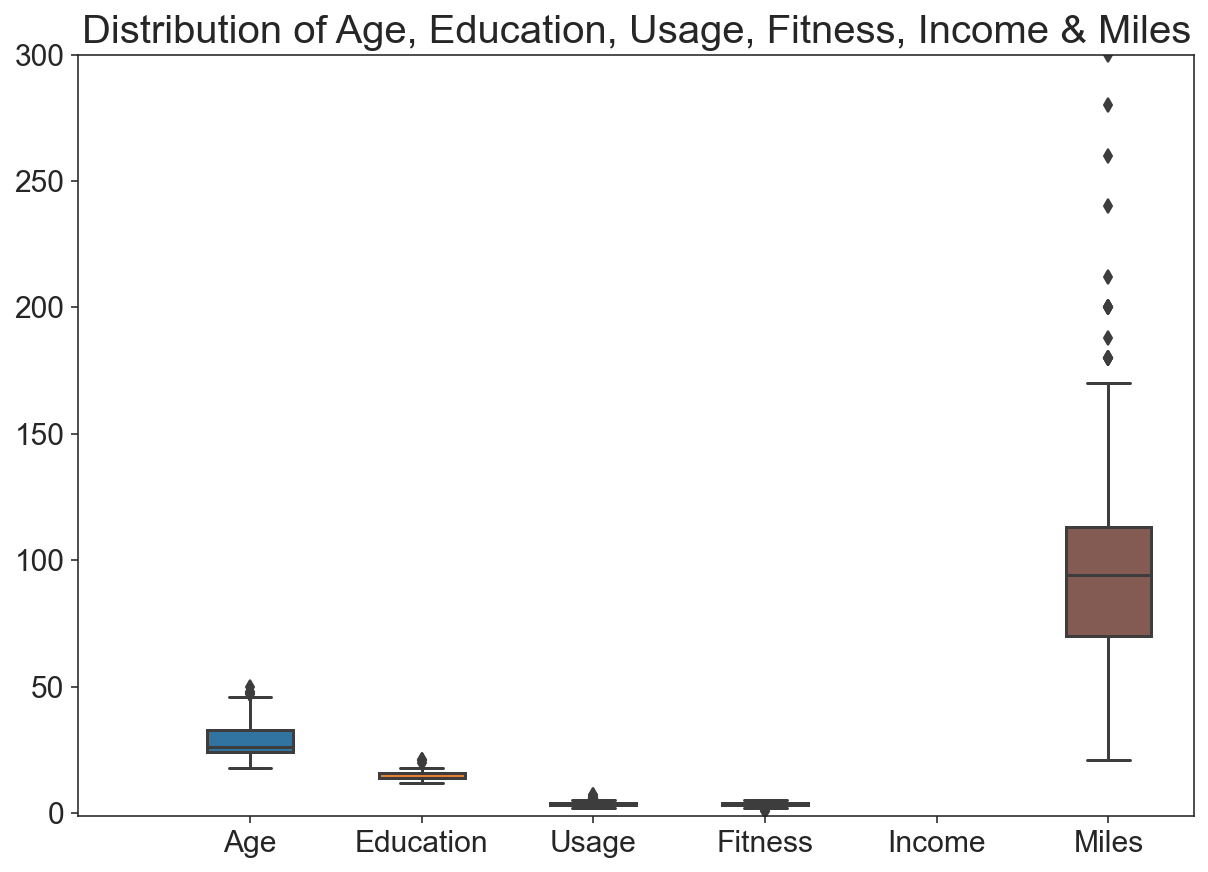

In [ ]:
# Get numerical measures from df
df_stats = df[["Age", "Education", "Usage", "Fitness", "Income", "Miles"]]

# Set figure size
plt.figure(figsize=(10,7))

# Create seaborn boxplot using df_stats
sns.boxplot(data=df_stats, width=0.5)

# State title of plot and the axes labels
plt.title('Distribution of Age, Education, Usage, Fitness, Income & Miles', fontsize=20)

# Set font size of ticks on the x-axis and y-axis
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Tweak x-axis and y-axis ranges using Matplotlib
plt.ylim(-1, 300)
plt.xlim(-1, None)

# Display the plot
plt.show()

## Violin Plot

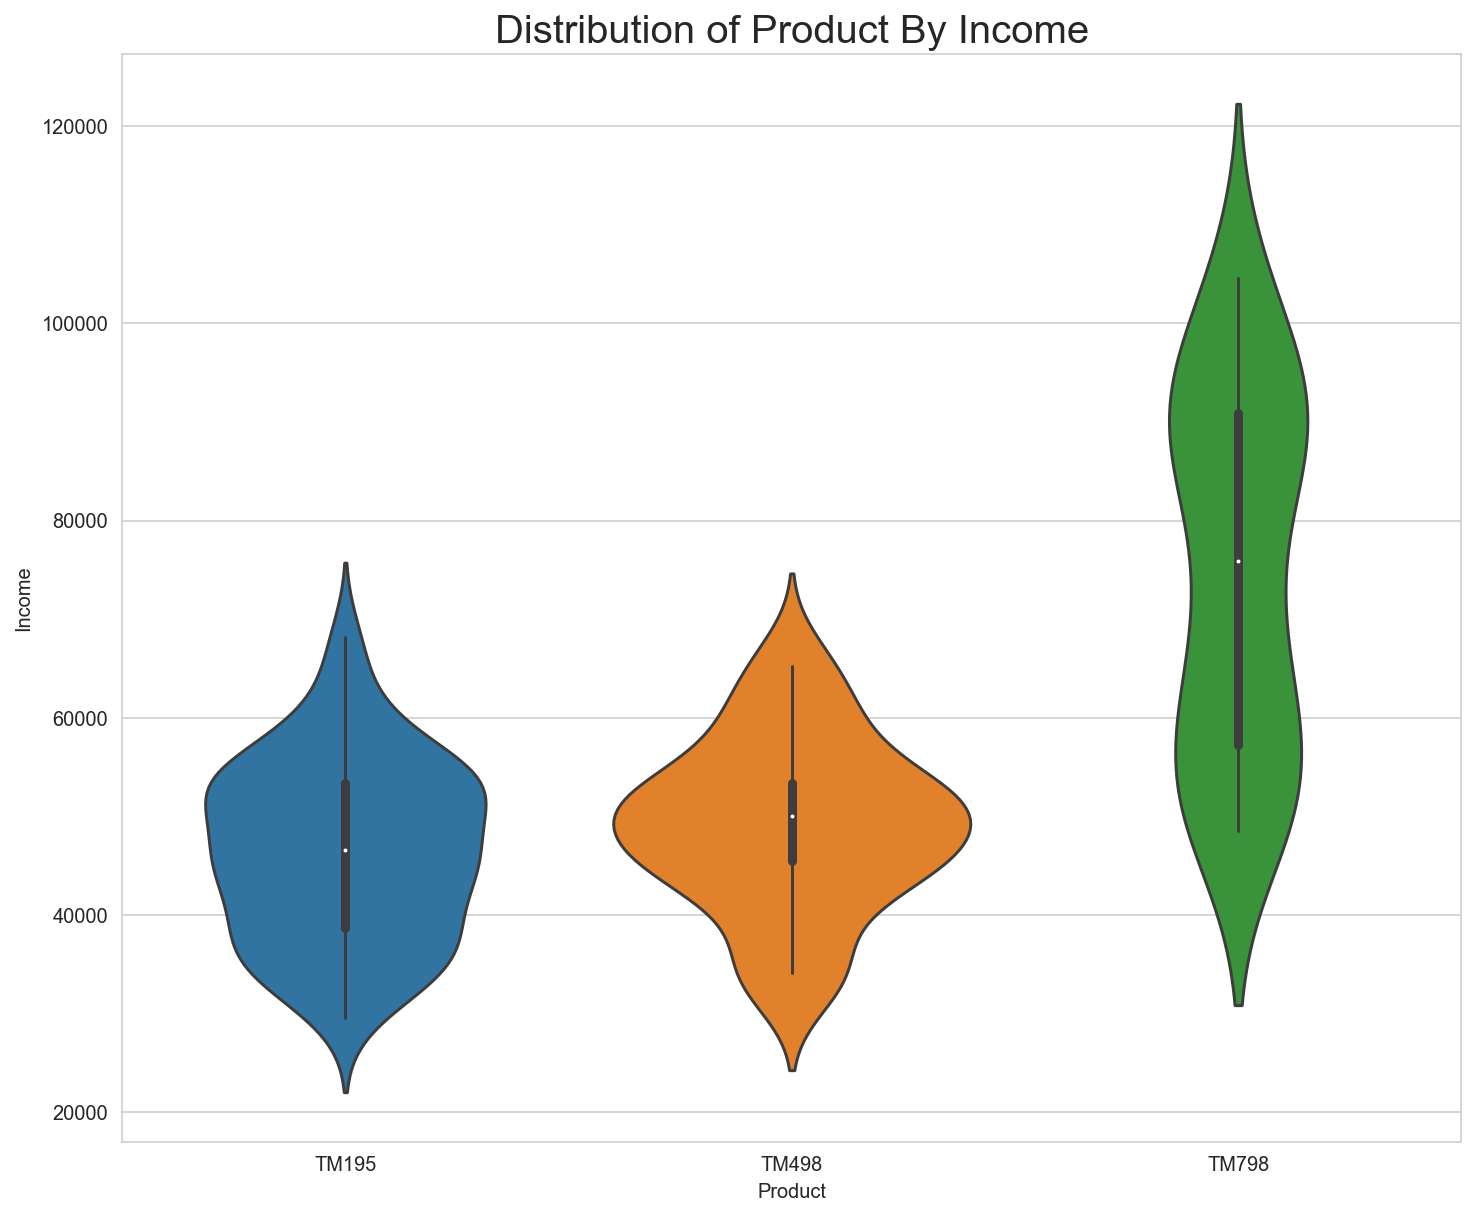

In [ ]:
# Set figure size
plt.figure(figsize=(12,10))

# Set theme
sns.set_style('whitegrid')
 
# Create Violin plot 
sns.violinplot(x='Product', y='Income', data=df)

# Set title with matplotlib
plt.title('Distribution of Product By Income', fontsize=20)

# Display the plot
plt.show()

## Combined Swarm & Violin Plots

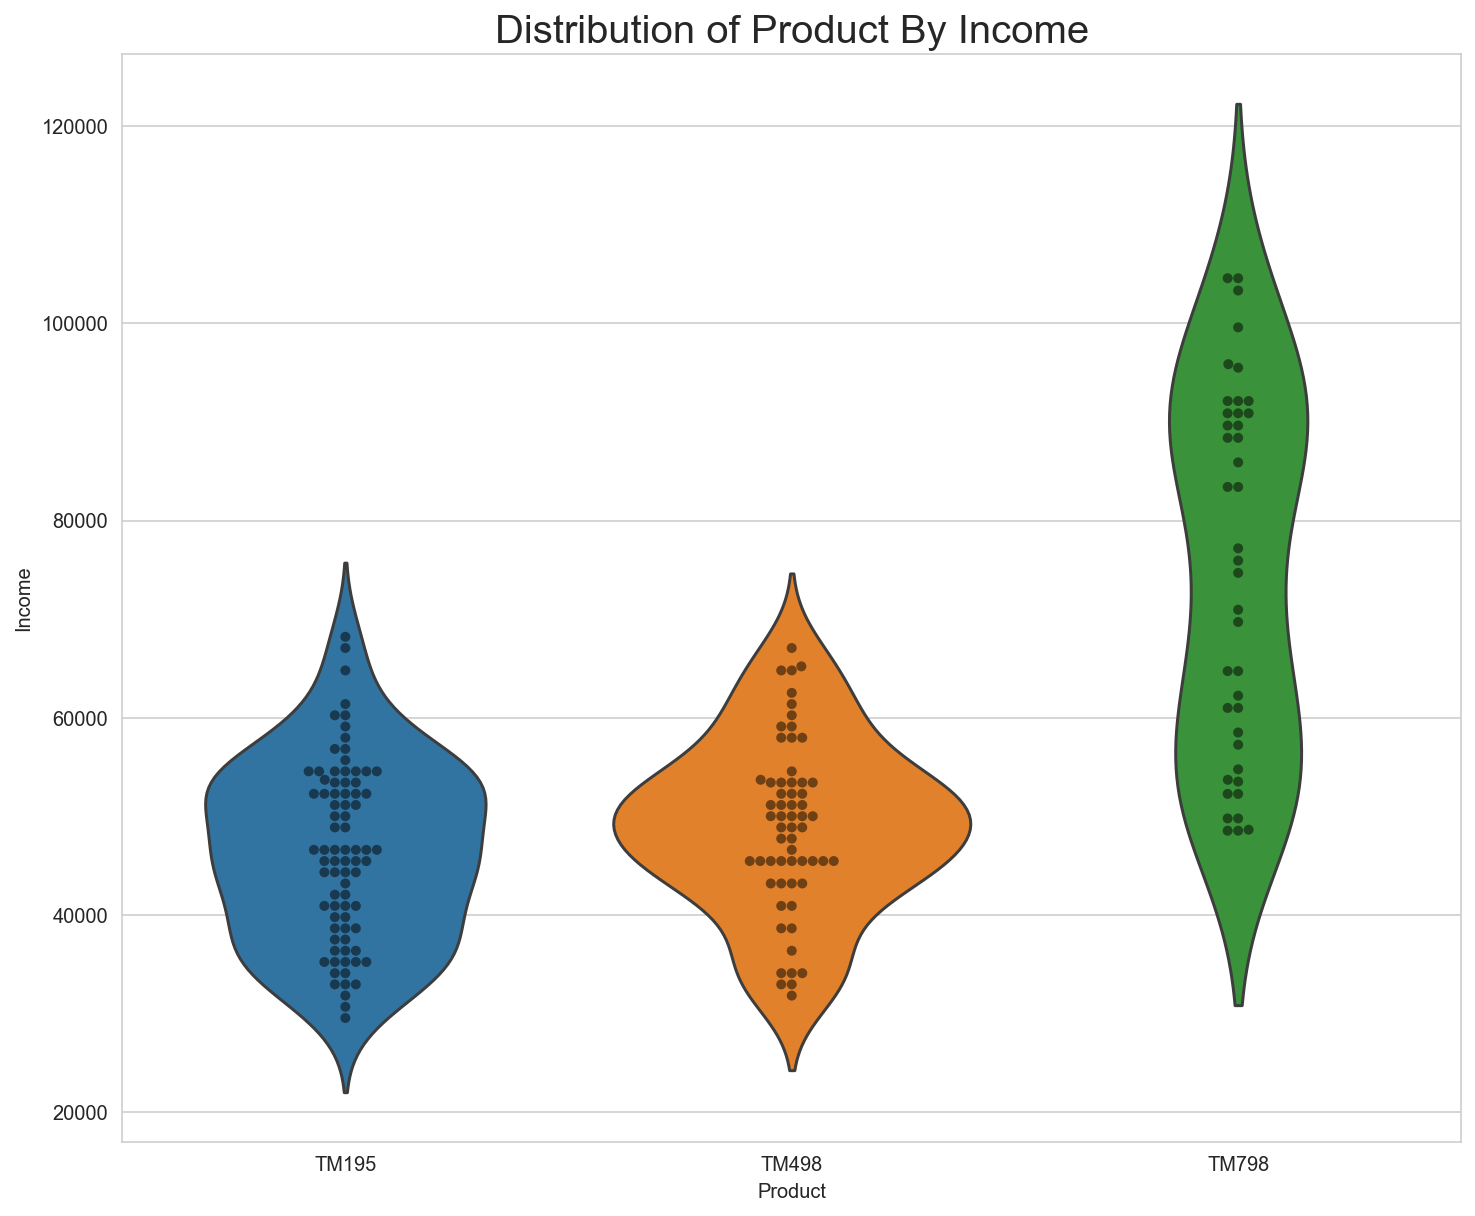

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(12,10))
 
# Create violin plot with inner boxplots removed
sns.violinplot(x='Product',
               y='Income', 
               data=df, 
               inner=None), # Remove the bars inside the violins

# Overlay swarm plot on violin plot
sns.swarmplot(x='Product', 
              y='Income', 
              data=df, 
              color='k', # Make points black and 
              alpha=0.5) # slightly transparent
 
# Set title with matplotlib
plt.title('Distribution of Product By Income', fontsize=20)

# Display the plot
plt.show()

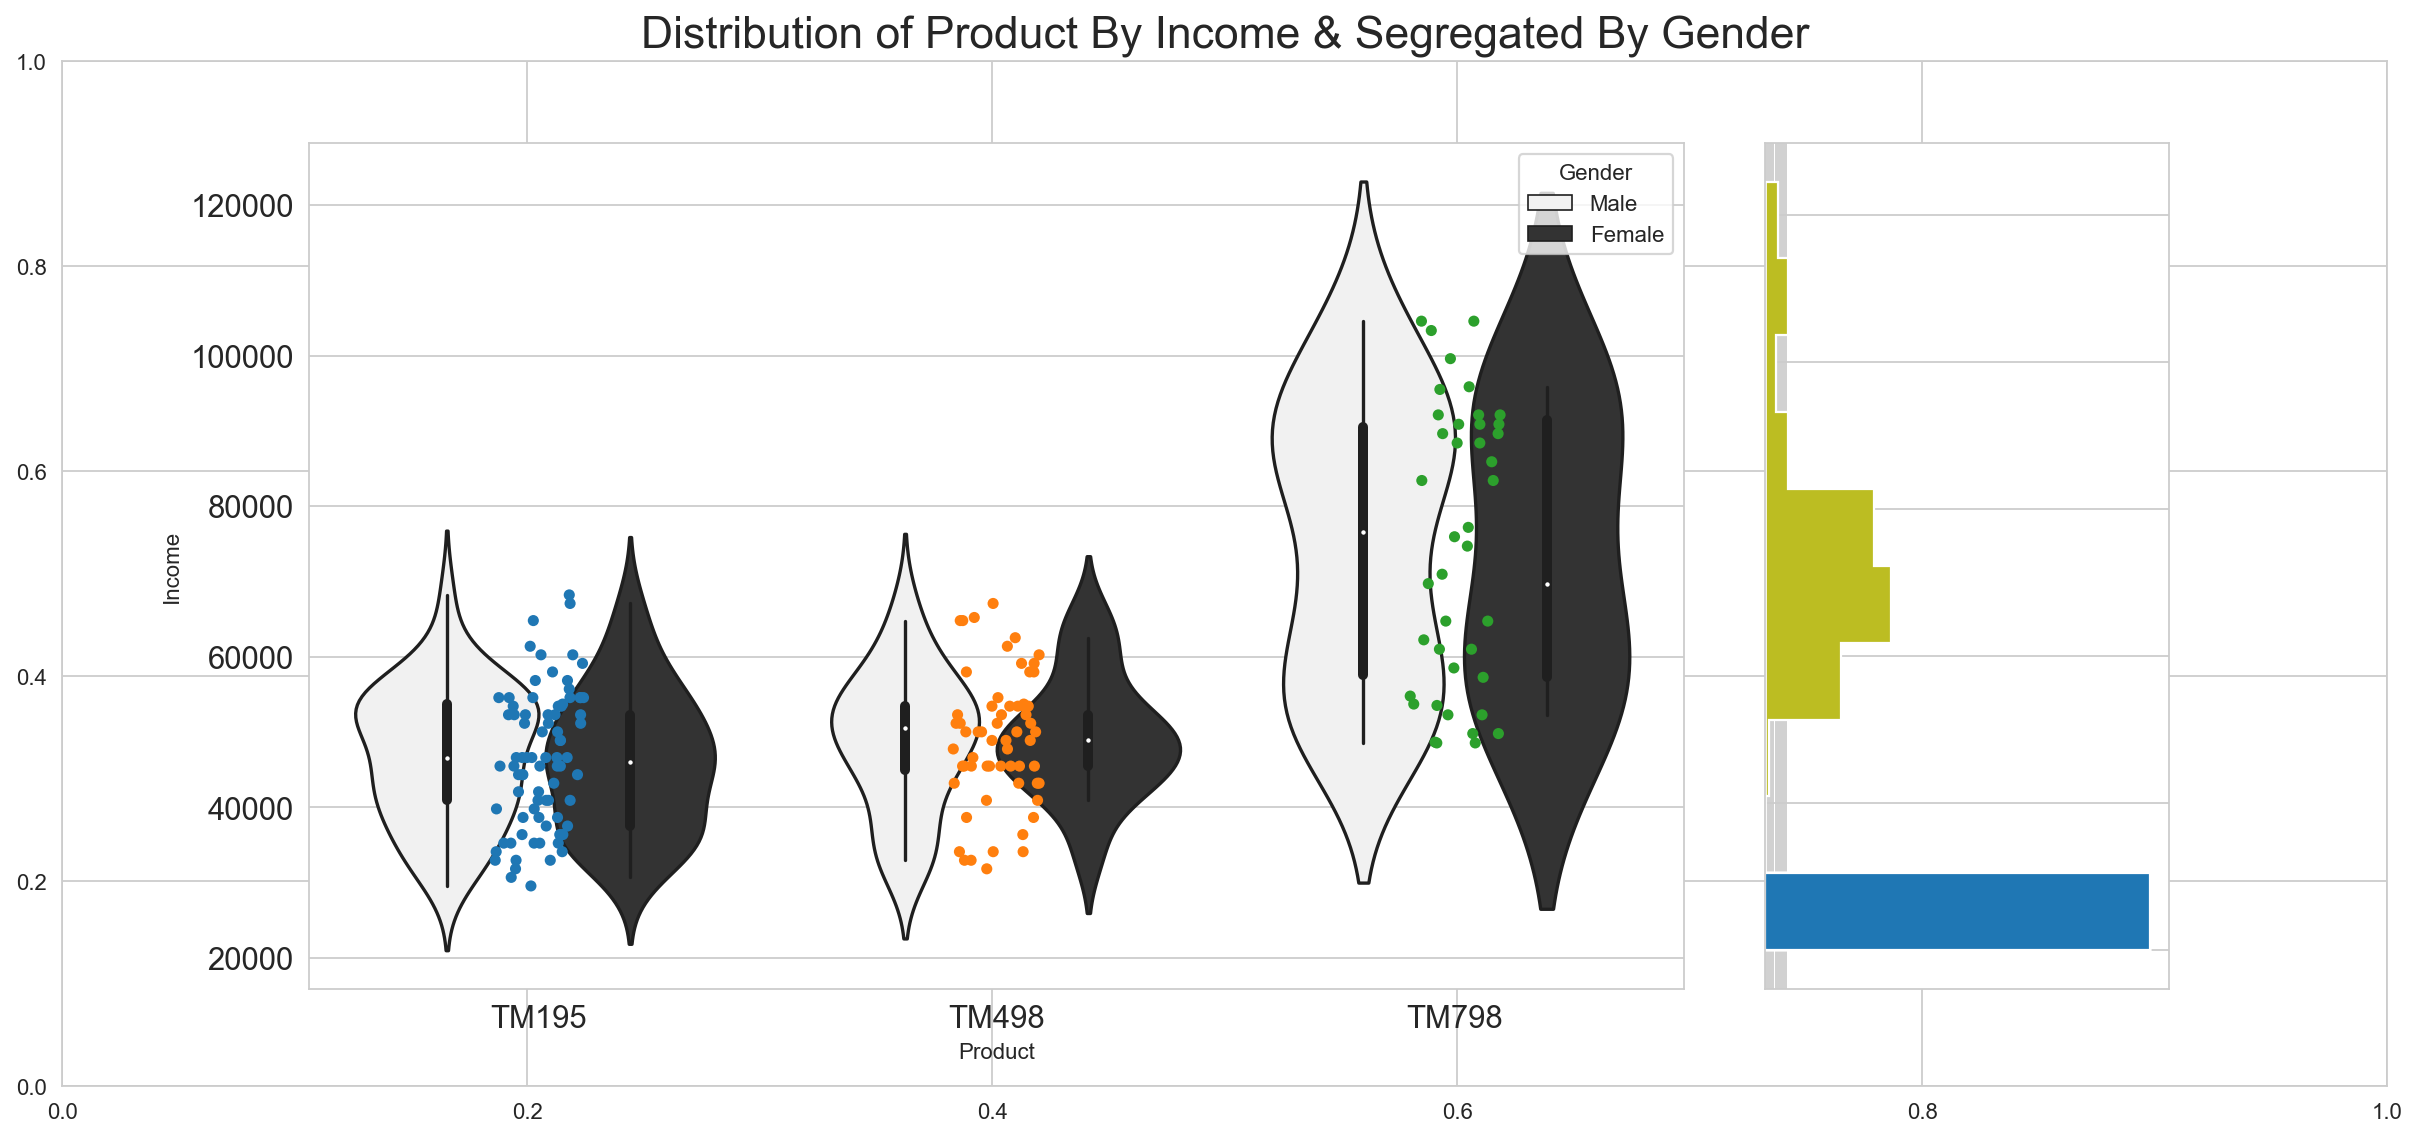

In [ ]:
# Set figure size with matplotlib
fig = plt.figure(figsize=(15, 7), dpi=80, constrained_layout=True)

# Set title with matplotlib
plt.title('Distribution of Product By Income & Segregated By Gender', fontsize=20)

# Use GridSpec to determine the dimensions of the dashboard
grid=plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define subplots and their corresponding positions
# Note the NumPy slice syntax for selecting the part of the gridspec each subplot will occupy.
ax_main = fig.add_subplot(grid[:, :-1])
ax_right = fig.add_subplot(grid[:, -1], xticklabels=[], yticklabels=[])

# Create violin plot
sns.violinplot(x= "Product", y = "Income", hue = "Gender", data = df, color= "0.2", ax=ax_main)

# Create stripplot
sns.stripplot(x= "Product", y = "Income", data = df, ax=ax_main)

# Create histogram plot
ax_right.hist(df, histtype='stepfilled', orientation='horizontal')

# Set title fontsize
ax_main.title.set_fontsize(14)

# Change the appearance of ticks, tick labels
ax_main.tick_params(rotation=0, labelsize=14)

# Display the plot
plt.show()

## Heatmap

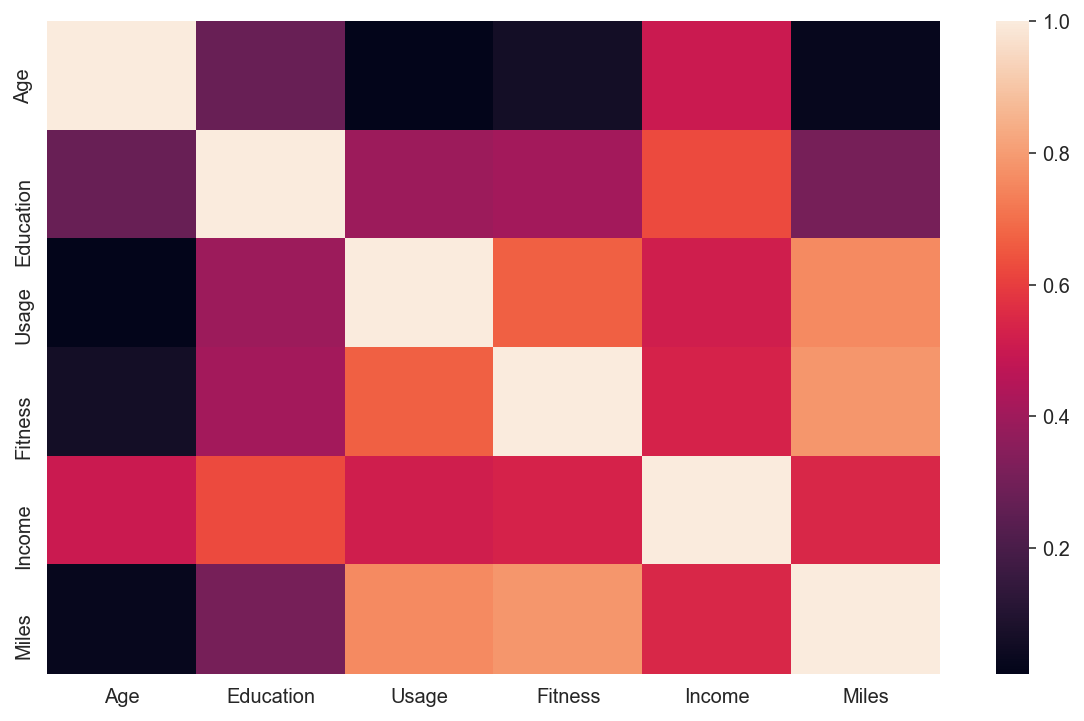

In [ ]:
# Get numerical measures from df
df_stats = df[['Age', 'Education', 'Usage','Fitness','Income', 'Miles']]

# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Calculate correlations of feature-pairs in df_stats
corr = df_stats.corr()
 
# Create heatmap
sns.heatmap(corr)

# Display the plot
plt.show()

## Diagonal Correlation Matrix - Visualising Multicollinearity

It is important to check whether some of your columns are not multicollinear before you start building your model. Multicollinear information can negatively impact your model by weakening the precision of your final coefficients. You can find out more about multicollinearity here.

High multicollinearity among your column is a reason to drop one of them from your data set, as they describe the same reality. As a self-proclaimed minimalist, I always appreciate a good reason to throw something out!

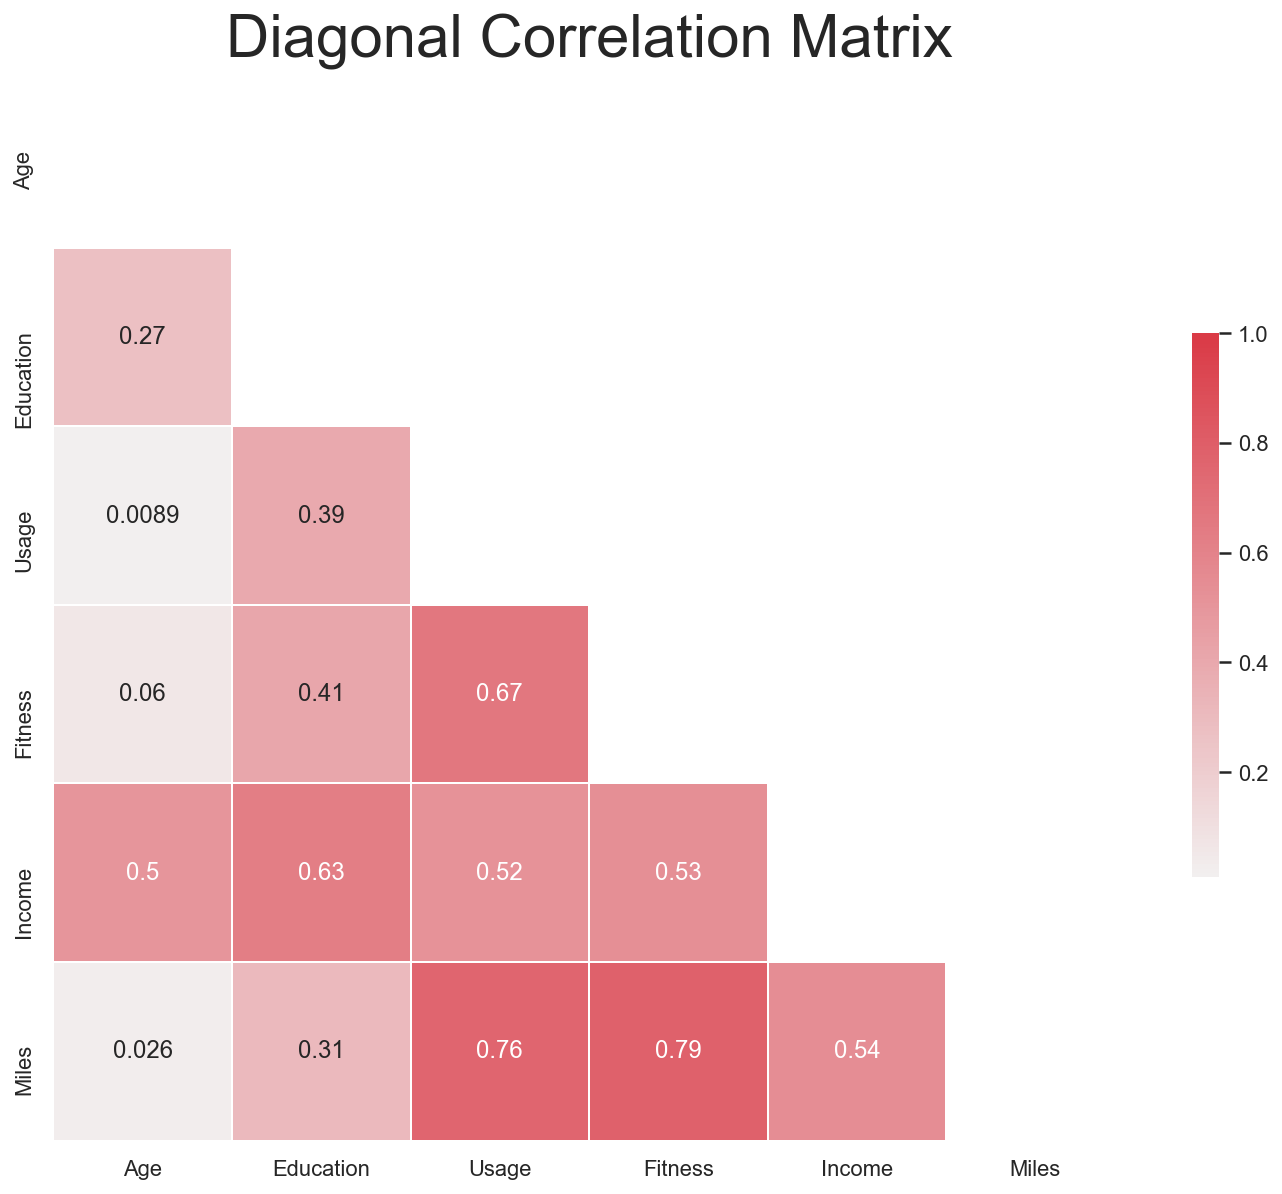

In [ ]:
# Set the background of figure
sns.set(style = "white")

# Calculates the correlation of columns and returns a dataframe with correlation values
corr = df.corr()

# create a Boolean array with the help on NumPy
mask = np.zeros_like(corr, dtype=np.bool)

# A mask is created that ‘covers’ the upper triangle of the correlation matrix
# This way we are not represented with repetitive information, as the correlation matrix is symmetrical
mask[np.triu_indices_from(mask)] = True

# Sets up a matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Sets up a diverging colour palette that will help you visualise values by colour intensity and spot multicollinear columns instantly
# Seaborn uses the HUSL colour system
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set title with matplotlib
plt.title('Diagonal Correlation Matrix', fontsize=30)

# Sets up our heat map! We pass our parameters, which we defined above
# The ‘annot’ parameter is especially useful, as it writes the data value in each square. This way we can see the correlation coefficient.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0, square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5});

## Scatter Plot 

Text(-7.5, 0.9, 'r=0.5, p=0.0')

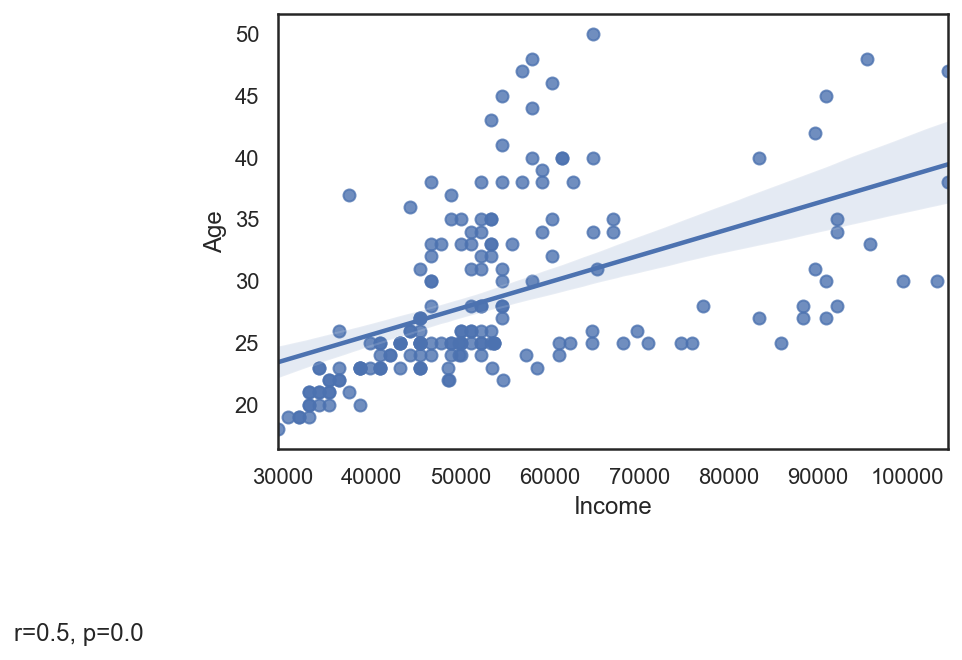

In [ ]:
# Calculate correlation coefficient
corr = pearsonr(df['Income'], df['Age'])
corr = [np.round(c, 2) for c in corr]

# Add the coefficient to your graph
text = 'r=%s, p=%s' % (corr[0], corr[1])

# Create scatter plot 
ax = sns.regplot(x="Income", y="Age", data=df)

# Add text to display 
ax.text(-7.5, 0.9, text, fontsize=12)

Text(-7.5, 0.9, 'r=0.63, p=0.0')

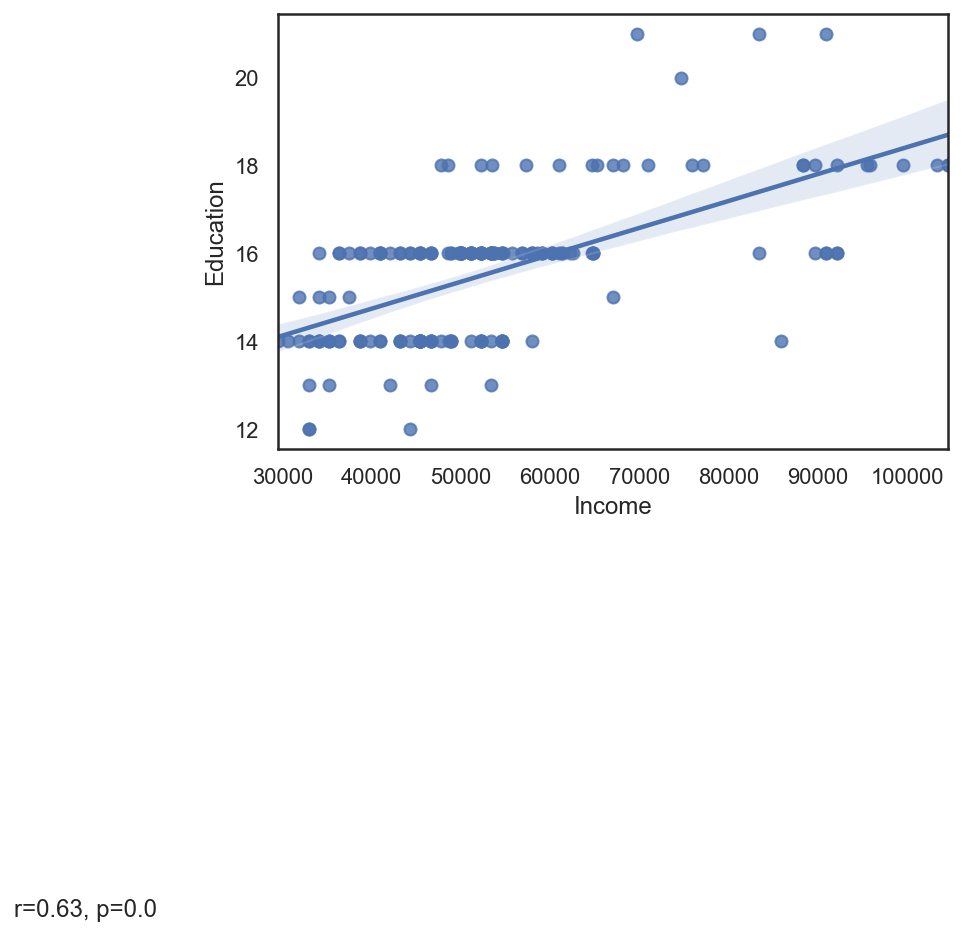

In [ ]:
# Calculate correlation coefficient
corr = pearsonr(df['Income'], df['Education'])
corr = [np.round(c, 2) for c in corr]

# Add the coefficient to your graph
text = 'r=%s, p=%s' % (corr[0], corr[1])

# Create scatter plot 
ax = sns.regplot(x="Income", y="Education", data=df)

# Add text to display 
ax.text(-7.5, 0.9, text, fontsize=12)

Text(-7.5, 0.9, 'r=0.76, p=0.0')

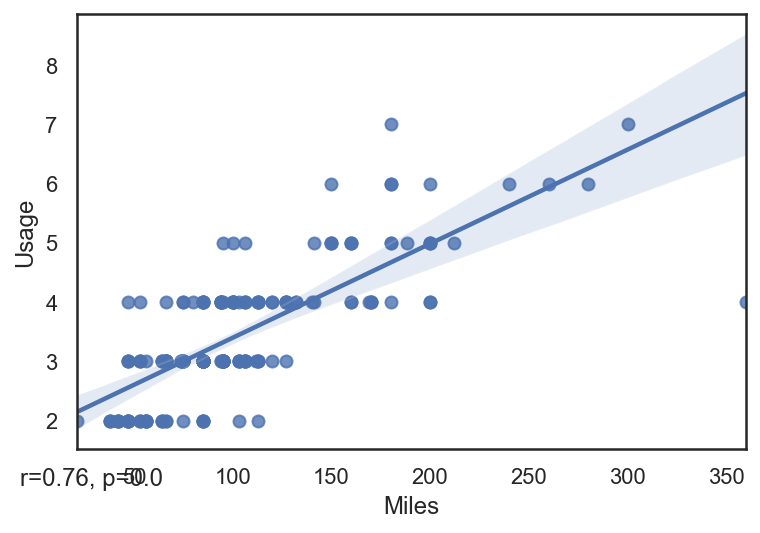

In [ ]:
# Calculate correlation coefficient
corr = pearsonr(df['Miles'], df['Usage'])
corr = [np.round(c, 2) for c in corr]

# Add the coefficient to your graph
text = 'r=%s, p=%s' % (corr[0], corr[1])

# Create scatter plot
ax = sns.regplot(x="Miles", y="Usage", data=df)

# Add text to display 
ax.text(-7.5, 0.9, text, fontsize=12)

Text(-7.5, 0.9, 'r=0.79, p=0.0')

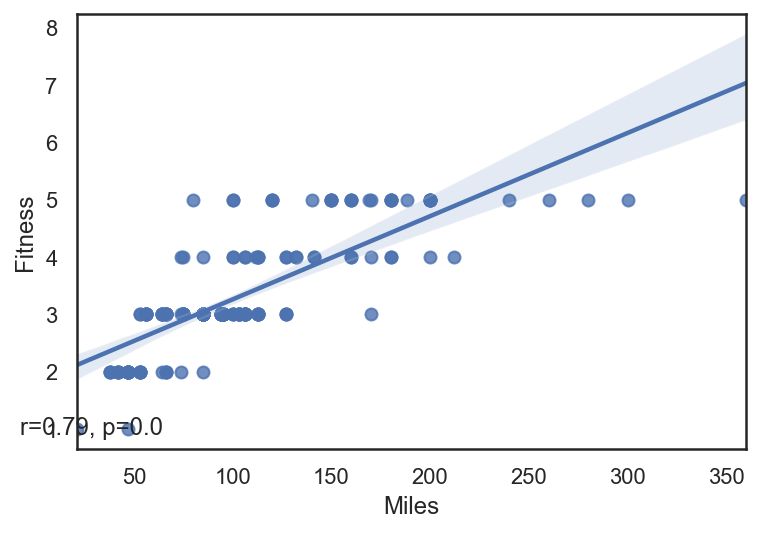

In [ ]:
# Calculate correlation coefficient
corr = pearsonr(df['Miles'], df['Fitness'])
corr = [np.round(c, 2) for c in corr]

# Add the coefficient to your graph
text = 'r=%s, p=%s' % (corr[0], corr[1])

# Create scatter plot
ax = sns.regplot(x="Miles", y="Fitness", data=df)

# Add text to display 
ax.text(-7.5, 0.9, text, fontsize=12)

Text(-7.5, 0.9, 'r=0.54, p=0.0')

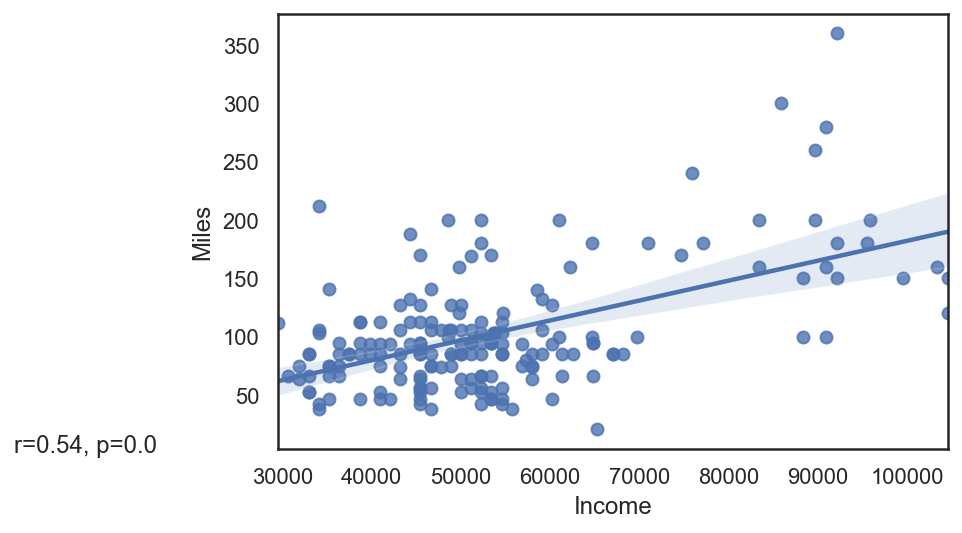

In [ ]:
# Calculate correlation coefficient
corr = pearsonr(df['Income'], df['Miles'])
corr = [np.round(c, 2) for c in corr]

# Add the coefficient to your graph
text = 'r=%s, p=%s' % (corr[0], corr[1])

# Create scatter plot
ax = sns.regplot(x="Income", y="Miles", data=df)

# Add text to display 
ax.text(-7.5, 0.9, text, fontsize=12)

In [ ]:
# Columndatasource takes dataframe in parameter
source = ColumnDataSource(data=df)

#plot data with glyph
p = figure(x_axis_label='Age', y_axis_label='Income')
p.circle(x='Age', y='Income', source=source)

# Display output in jupyter notebook
output_notebook()

# Display the plot
show(p)

Loading BokehJS ...

In [ ]:
# Columndatasource takes dataframe in parameter
source = ColumnDataSource(data=df)

# Plot data with glyph
p = figure(x_axis_label='Education', y_axis_label='Income')
p.circle(x='Education', y='Income', source=source)

# Display output in jupyter notebook
output_notebook()

# Display the plot
show(p)

Loading BokehJS ...

In [ ]:
# Columndatasource takes dataframe in parameter
source = ColumnDataSource(data=df)

# Plot data with glyph
p = figure(x_axis_label='Usage', y_axis_label='Miles')
p.circle(x='Usage', y='Miles', source=source)

# Display output in jupyter notebook
output_notebook()

# Display the plot
show(p)

Loading BokehJS ...

In [ ]:
# Columndatasource takes dataframe in parameter
source = ColumnDataSource(data=df)

#plot data with glyph
p = figure(x_axis_label='Fitness', y_axis_label='Miles')
p.circle(x='Fitness', y='Miles', source=source)

# Display output in jupyter notebook
output_notebook()

# Display the plot
show(p)

Loading BokehJS ...

In [ ]:
# Columndatasource takes dataframe in parameter
source = ColumnDataSource(data=df)

#plot data with glyph
p = figure(x_axis_label='Income', y_axis_label='Miles')
p.circle(x='Income', y='Miles', source=source)

# Display output in jupyter notebook
output_notebook()

# Display the plot
show(p)

Loading BokehJS ...

## Joint Distributions Plot

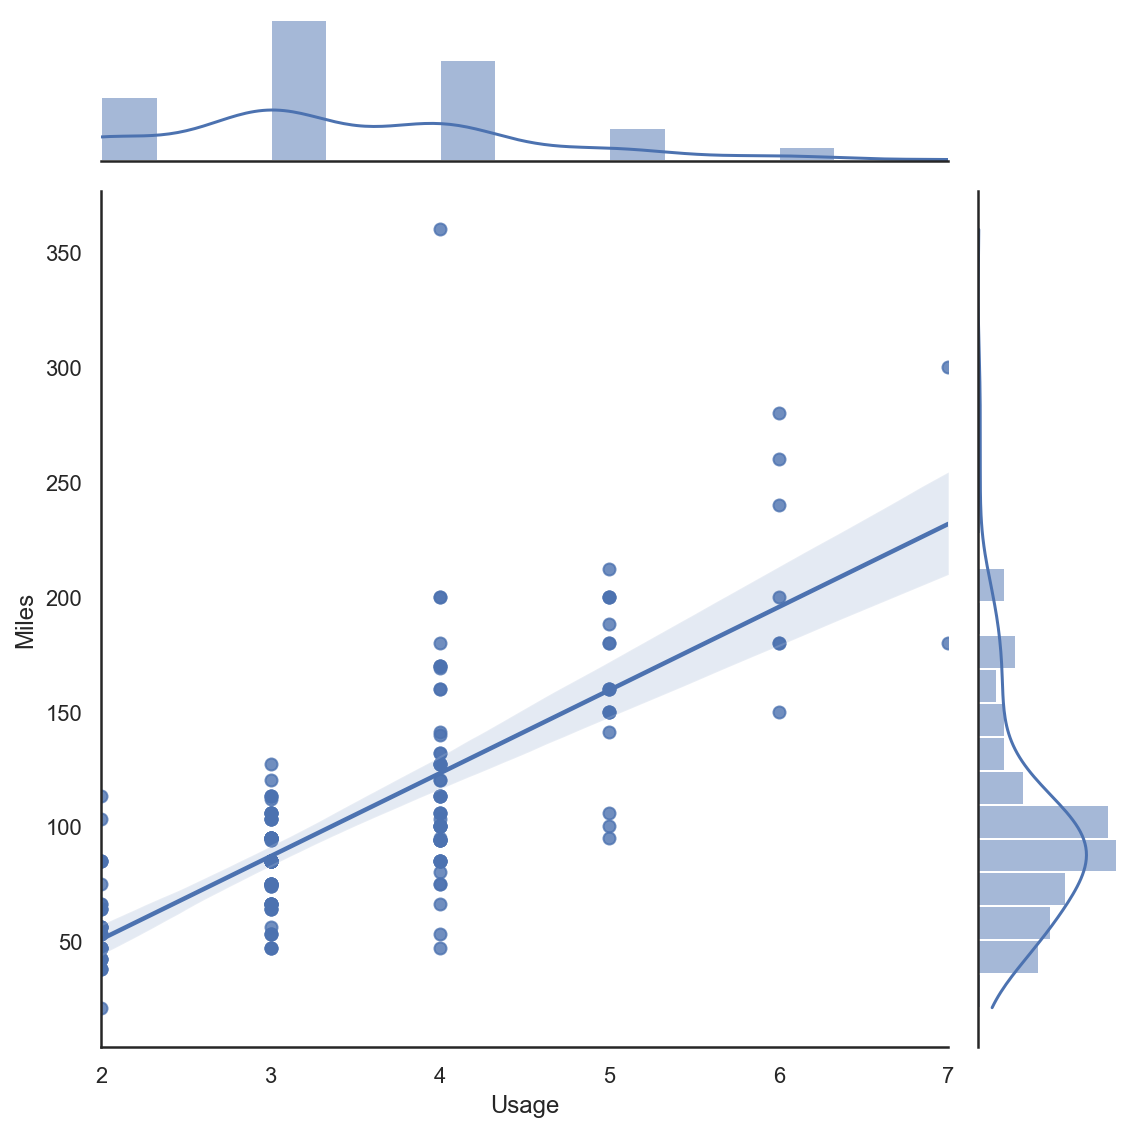

In [ ]:
# Set style
sns.set(style="white", color_codes=True)

# Joint Distributions Plot
sns.jointplot(x='Usage', y='Miles', data = df, kind='reg', height=8)

# Display the plot
plt.show()

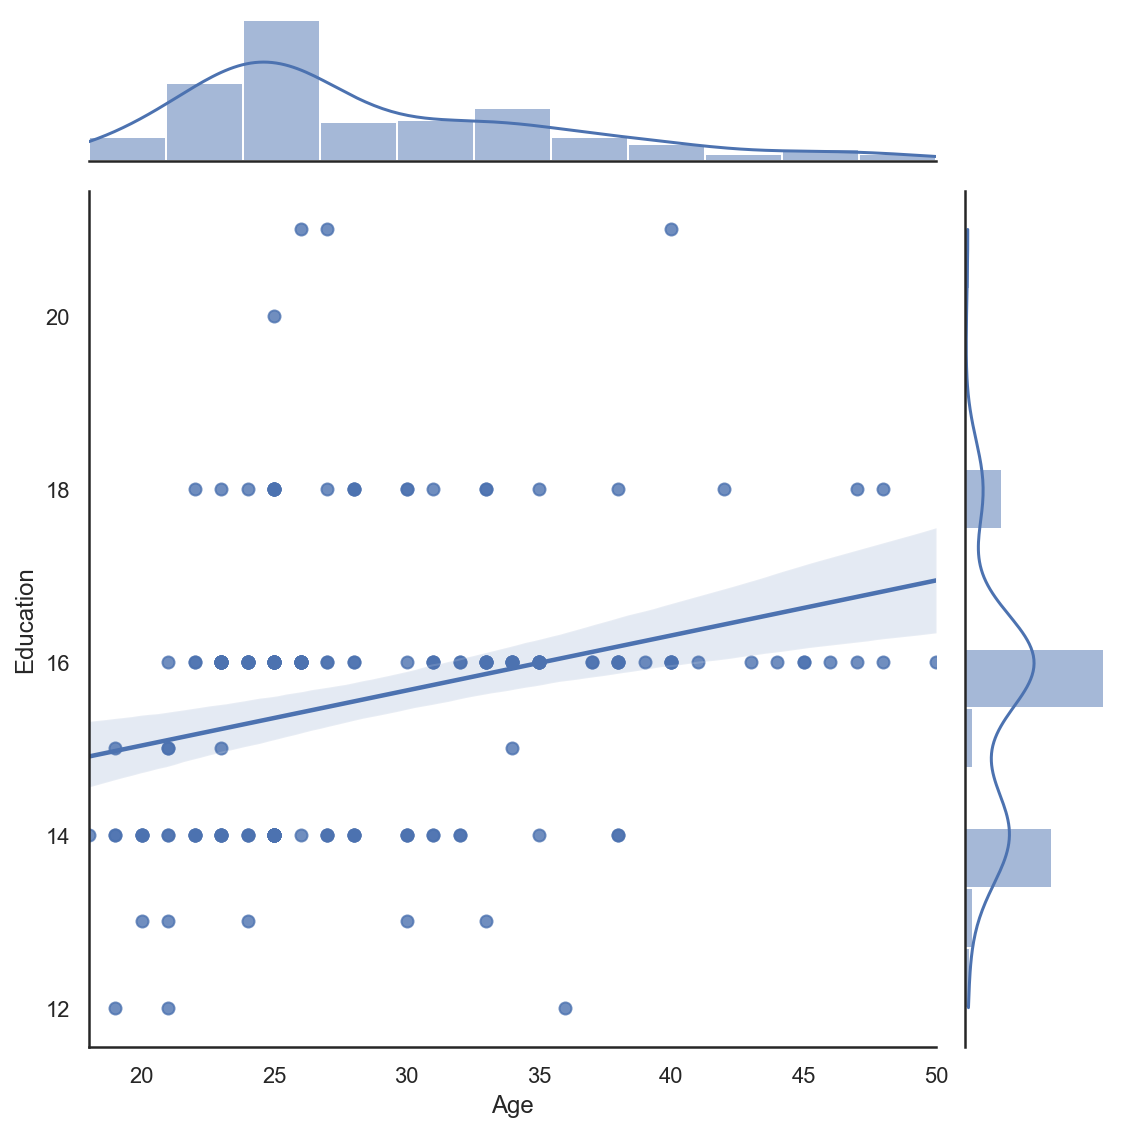

In [ ]:
# Set style
sns.set(style="white", color_codes=True)

# Joint Distributions Plot
sns.jointplot(x='Age', y='Education', data = df, kind='reg', height=8)

# Display the plot
plt.show()

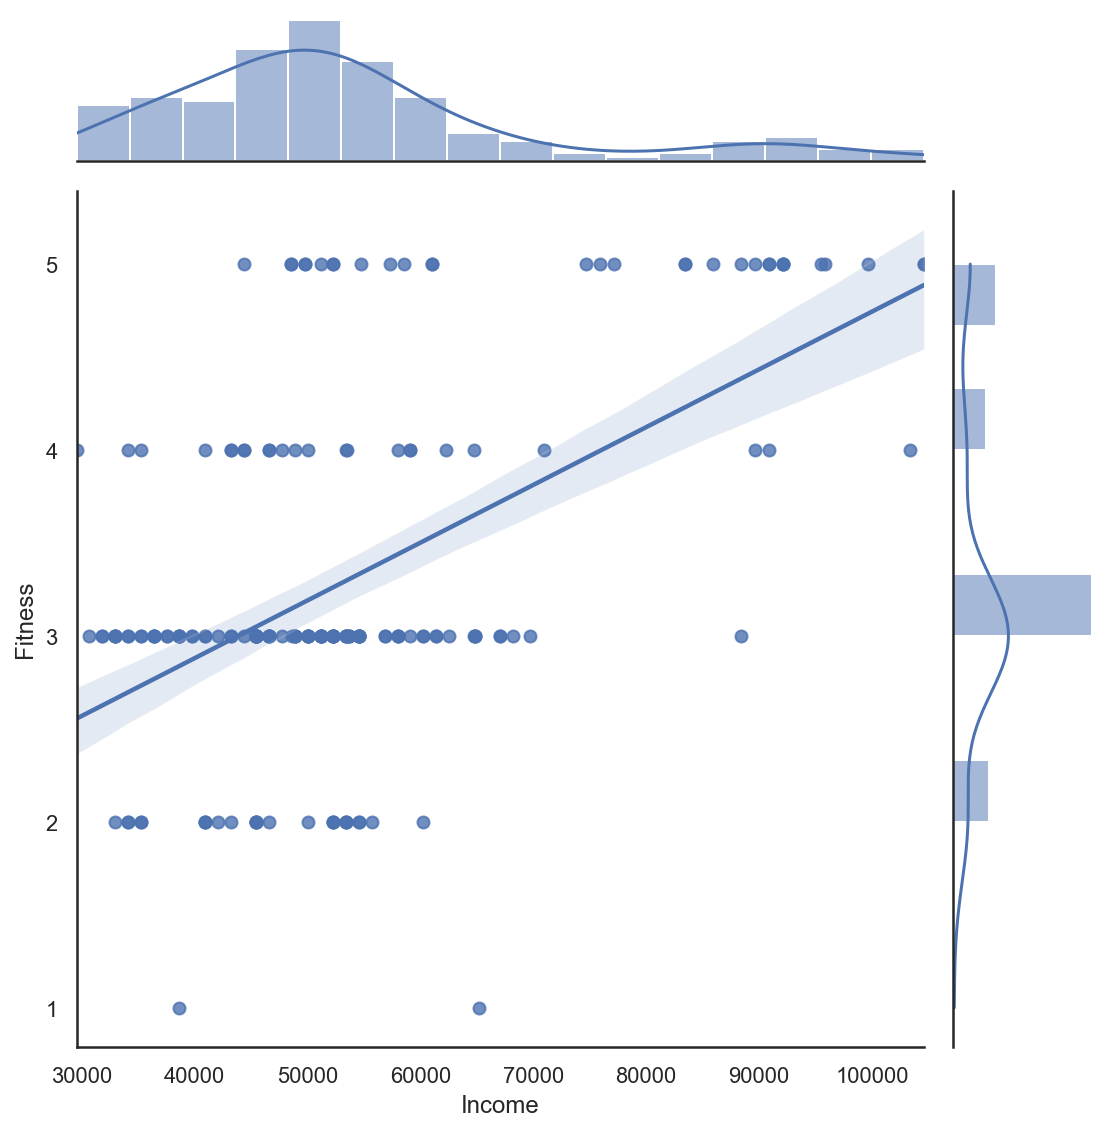

In [ ]:
# Set style
sns.set(style="white", color_codes=True)

# Joint Distributions Plot
sns.jointplot(x='Income', y='Fitness', data = df, kind='reg', height=8)

# Display the plot
plt.show()

## FacetGrids

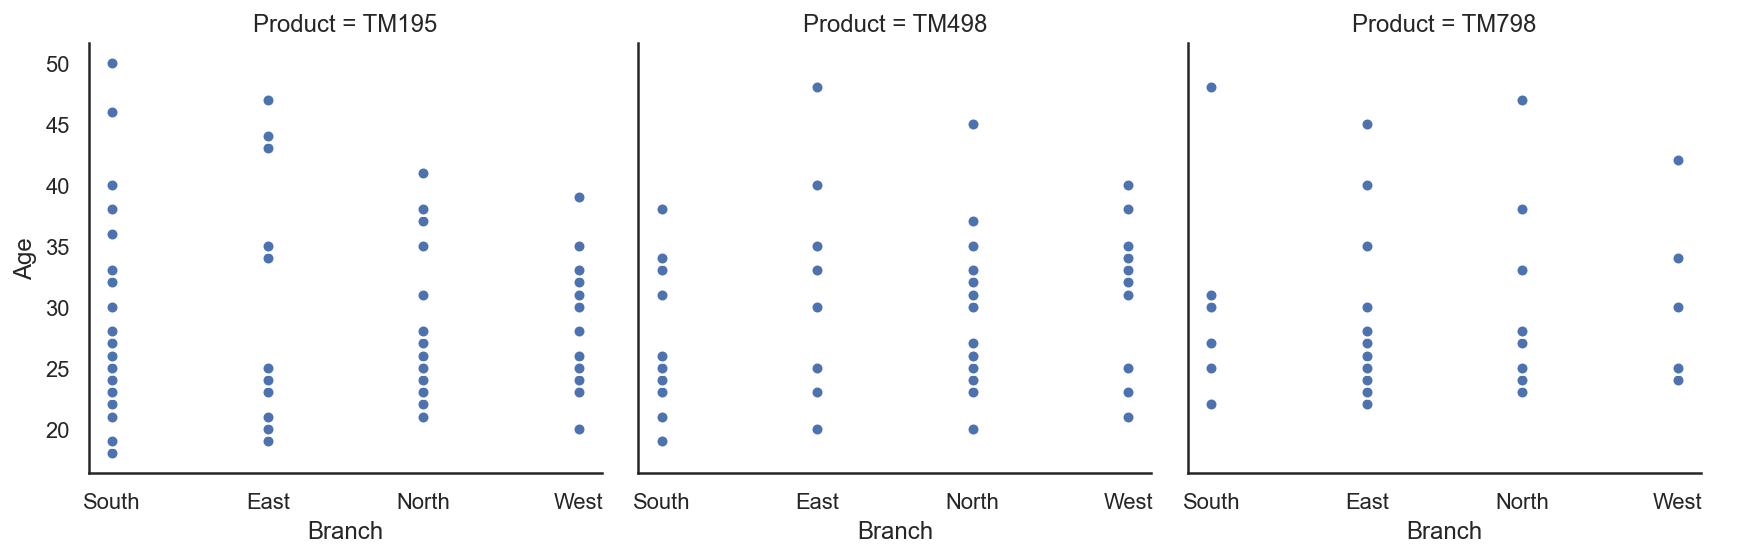

In [ ]:
# Form a facetgrid using columns with a hue 
graph = sns.FacetGrid(df, col ="Product", col_wrap=3, height=4.0) 

# Map the above form facetgrid with some attributes 
graph.map(plt.scatter, "Branch", "Age", edgecolor ="w").add_legend() 

# Show the plot 
plt.show() 

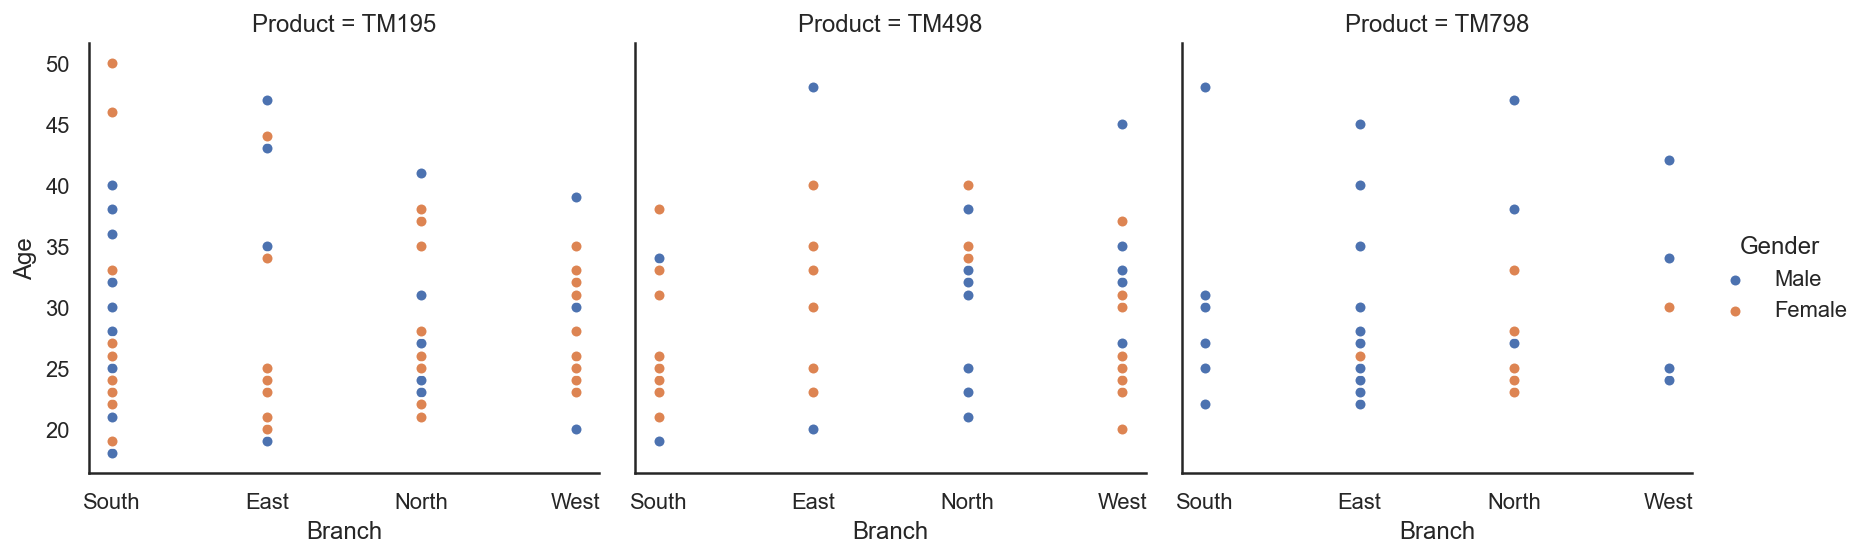

In [ ]:
# Form a facetgrid using columns with a hue 
graph = sns.FacetGrid(df, col ="Product",  hue ="Gender", col_wrap=3, height=4.0) 

# Map the above form facetgrid with some attributes 
graph.map(plt.scatter, "Branch", "Age", edgecolor ="w").add_legend() 

# Show the plot 
plt.show() 

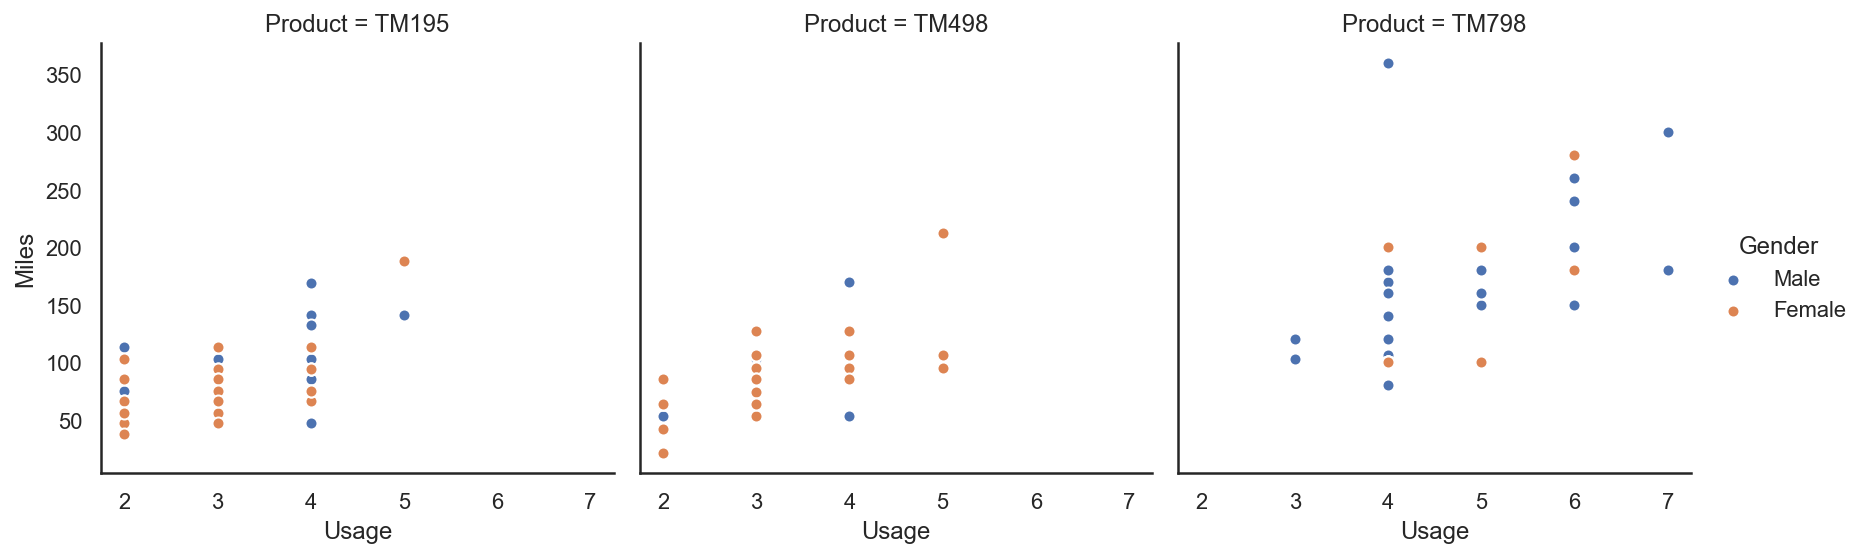

In [ ]:
# Form a facetgrid using columns with a hue 
graph = sns.FacetGrid(df, col ="Product",  hue ="Gender", col_wrap=3, height=4.0) 

# Map the above form facetgrid with some attributes 
graph.map(plt.scatter, "Usage", "Miles", edgecolor ="w").add_legend() 

# Show the plot 
plt.show() 

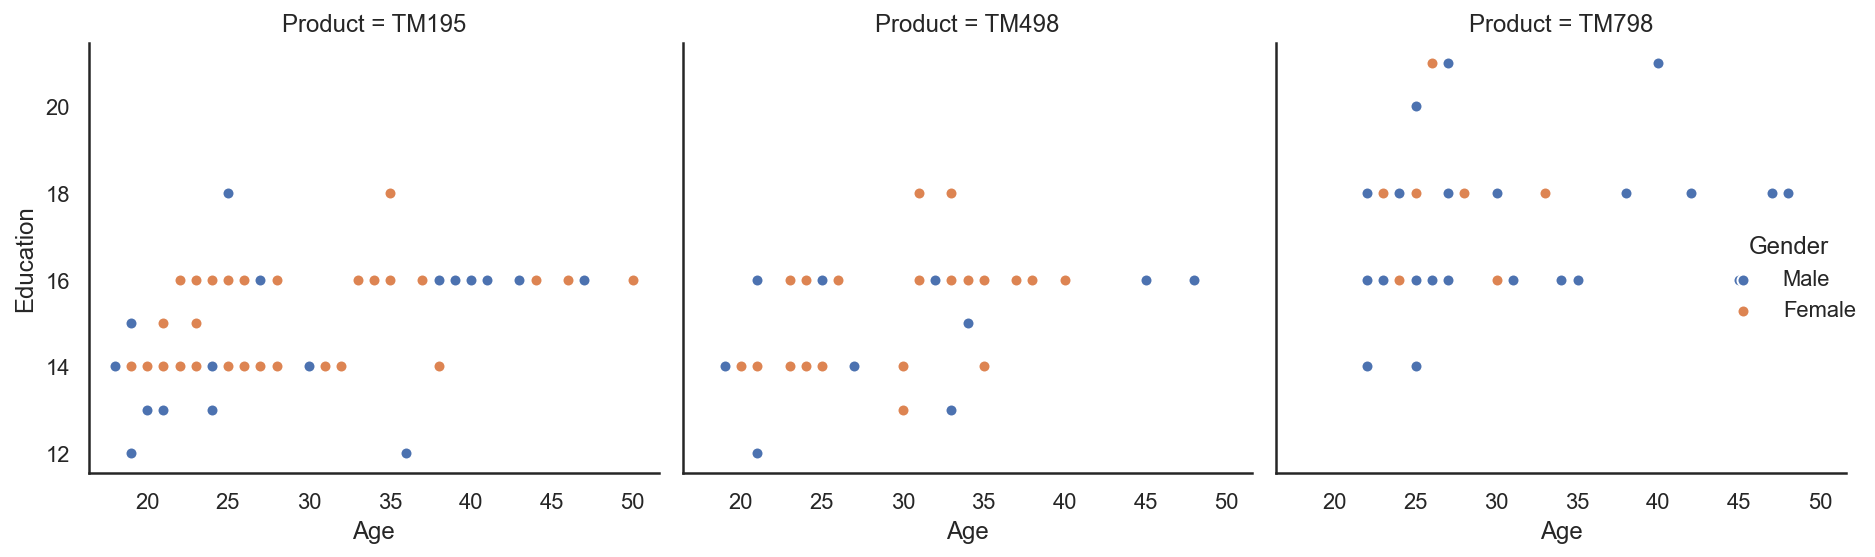

In [ ]:
# Form a facetgrid using columns with a hue 
graph = sns.FacetGrid(df, col ="Product",  hue ="Gender", col_wrap=3, height=4.0) 

# Map the above form facetgrid with some attributes 
graph.map(plt.scatter, "Age", "Education", edgecolor ="w").add_legend() 

# Adjust the arrangement of the plots
graph.fig.tight_layout(w_pad=1)

# Show the plot 
plt.show() 

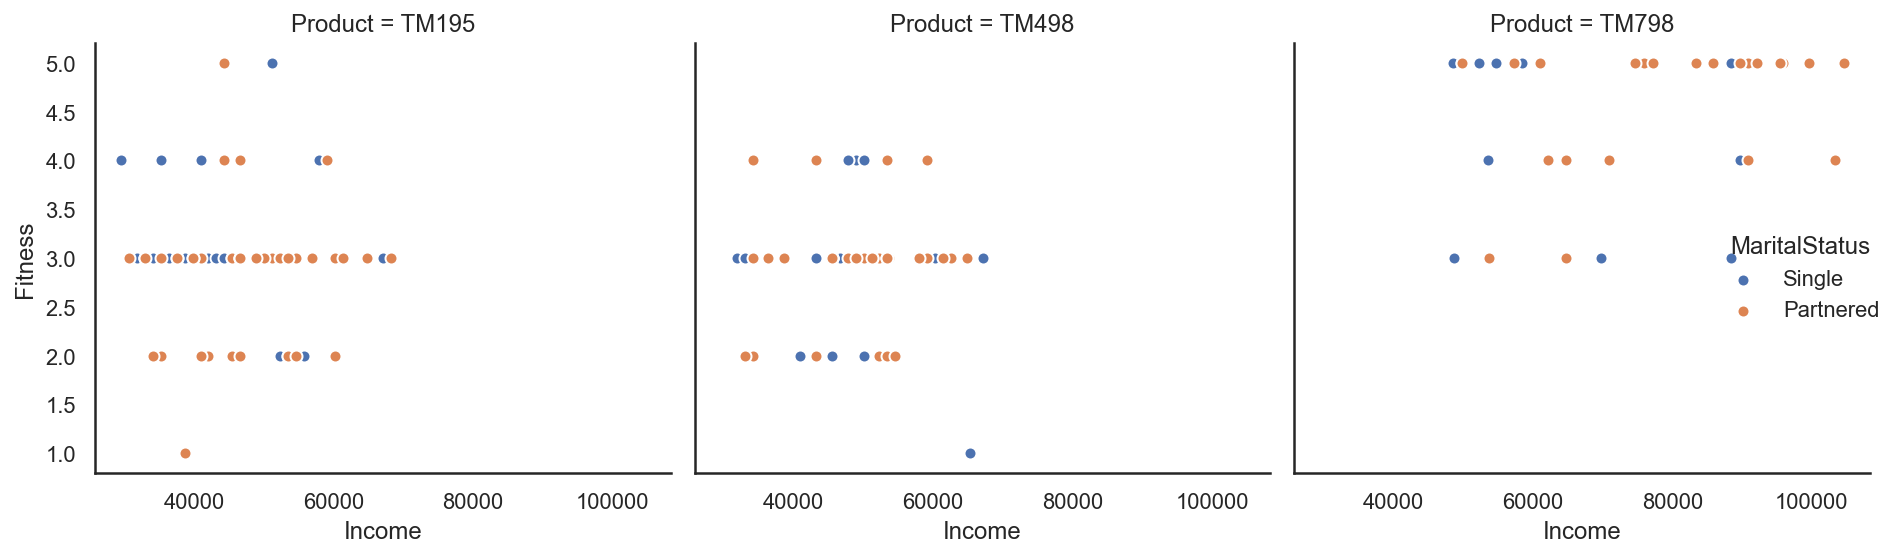

In [ ]:
# Form a facetgrid using columns with a hue 
graph = sns.FacetGrid(df, col ="Product",  hue ="MaritalStatus", col_wrap=3, height=4.0) 

# Map the above form facetgrid with some attributes 
graph.map(plt.scatter, "Income", "Fitness", edgecolor ="w").add_legend() 

# Adjust the arrangement of the plots
graph.fig.tight_layout(w_pad=1)

# Show the plot 
plt.show() 

## Pareto Chart

In [ ]:
# Obtain unique values of Branch column
df["Branch"].unique()

# Obtain count of Branch using pandas crosstab() function
product_count_table = pd.crosstab(index=df["Branch"], columns="count")

# Display 
print(product_count_table)

col_0   count
Branch       
East       45
North      40
South      50
West       48


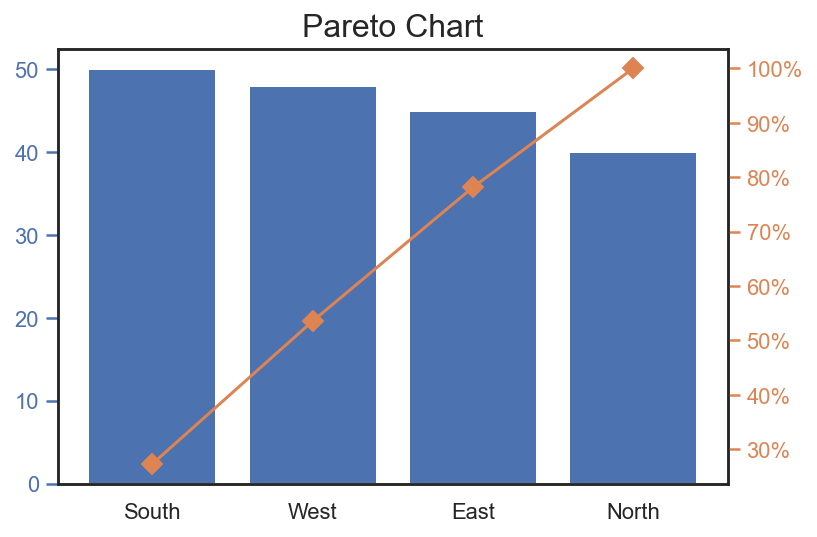

In [ ]:
# Create a new dataframe df1 from the above 
df1 = pd.DataFrame({'count': [45, 40, 50, 48]})
df1.index = ['East', 'North', 'South', 'West']

# Sort the values
df1 = df1.sort_values(by='count',ascending=False)

# Perform cumsum calculation 
df1["cumpercentage"] = df1["count"].cumsum()/df1["count"].sum()*100

# Define a subplot
fig, ax = plt.subplots()

# Create bar plot 
ax.bar(df1.index, df1["count"], color="C0")

# Instantiate a second axes that shares the same x-axis
ax2 = ax.twinx()

# Create line plot
ax2.plot(df1.index, df1["cumpercentage"], color="C1", marker="D", ms=7)

# Set major formatter 
ax2.yaxis.set_major_formatter(PercentFormatter())

# State title of the plot
ax.set_title('Pareto Chart', fontsize=16)

# Change the appearance of ticks, tick labels
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

# Display the plot 
plt.show()

## Bar Chart

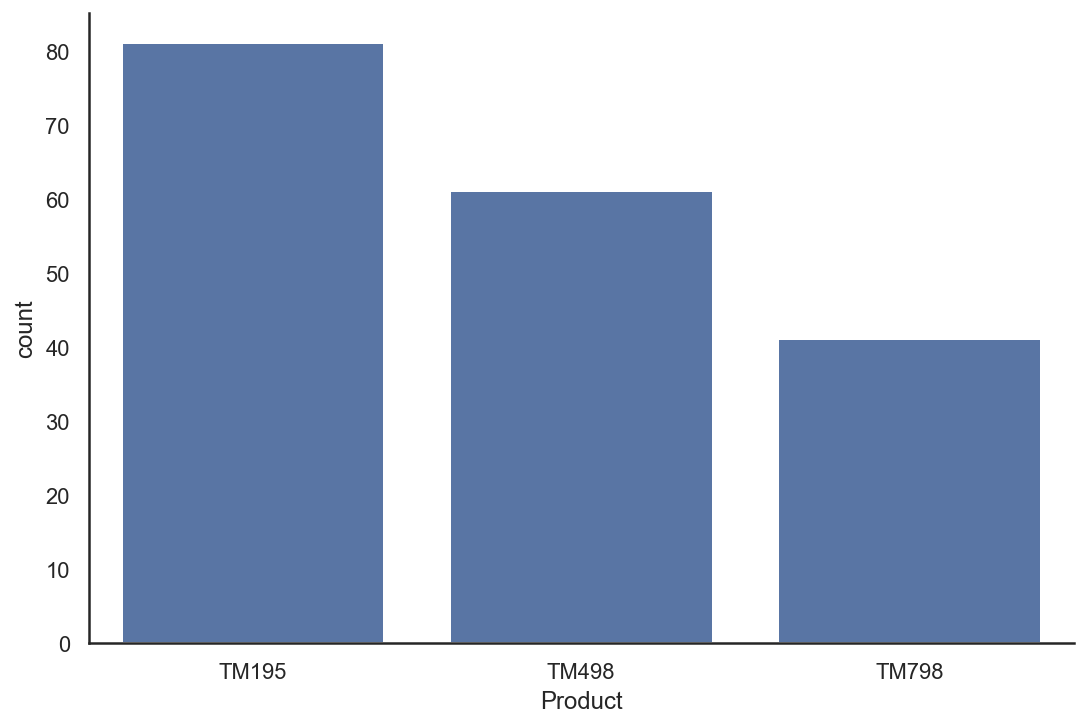

In [ ]:
# Create bar plot 
sns.catplot(x="Product", data=df, aspect=1.5, kind="count", color="b")

In [ ]:
# Get count of target data 
group=df.groupby('Product').count()

#change x axis  to factors 
p = figure(x_range=group.index.tolist(), plot_height=250, toolbar_location=None)

# Apply vbar glyph for bar plot
p.vbar(x=group.index.tolist(), top=group['Income'].tolist(), width=0.9, line_color='white')

# Display output in jupyter notebook
output_notebook()

# Display the plot
show(p)

Loading BokehJS ...

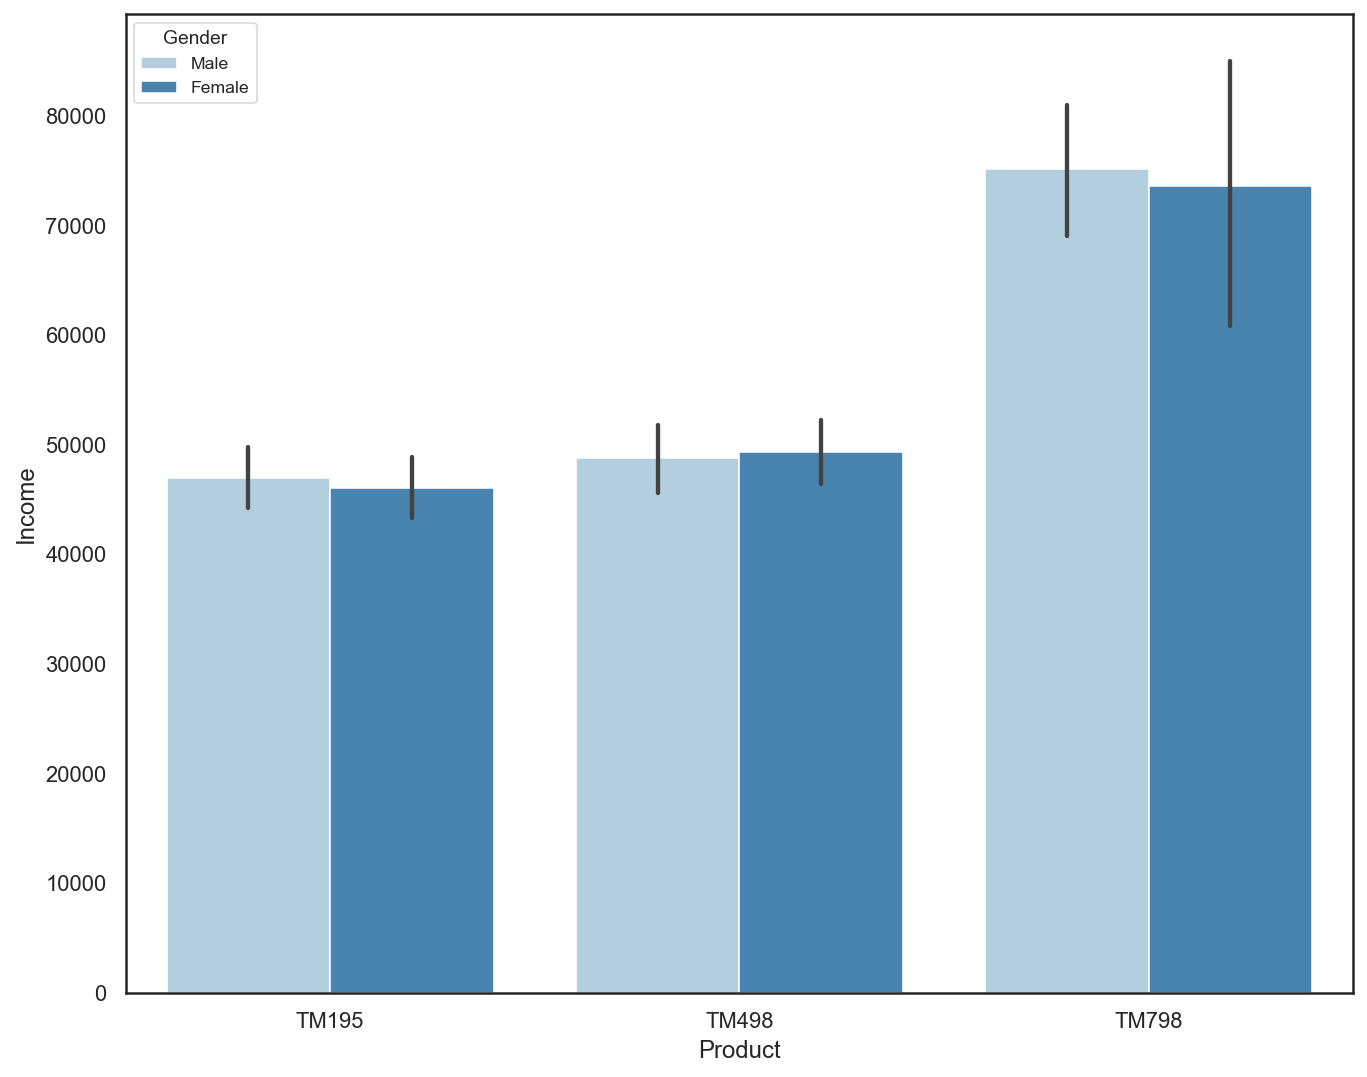

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set the plotting context parameters
sns.set_context('paper')

# Create bar plots using x, y with a hue & mean estimator 
sns.barplot(x = 'Product', y = 'Income', hue = 'Gender', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean)

# Display the plot
plt.show()

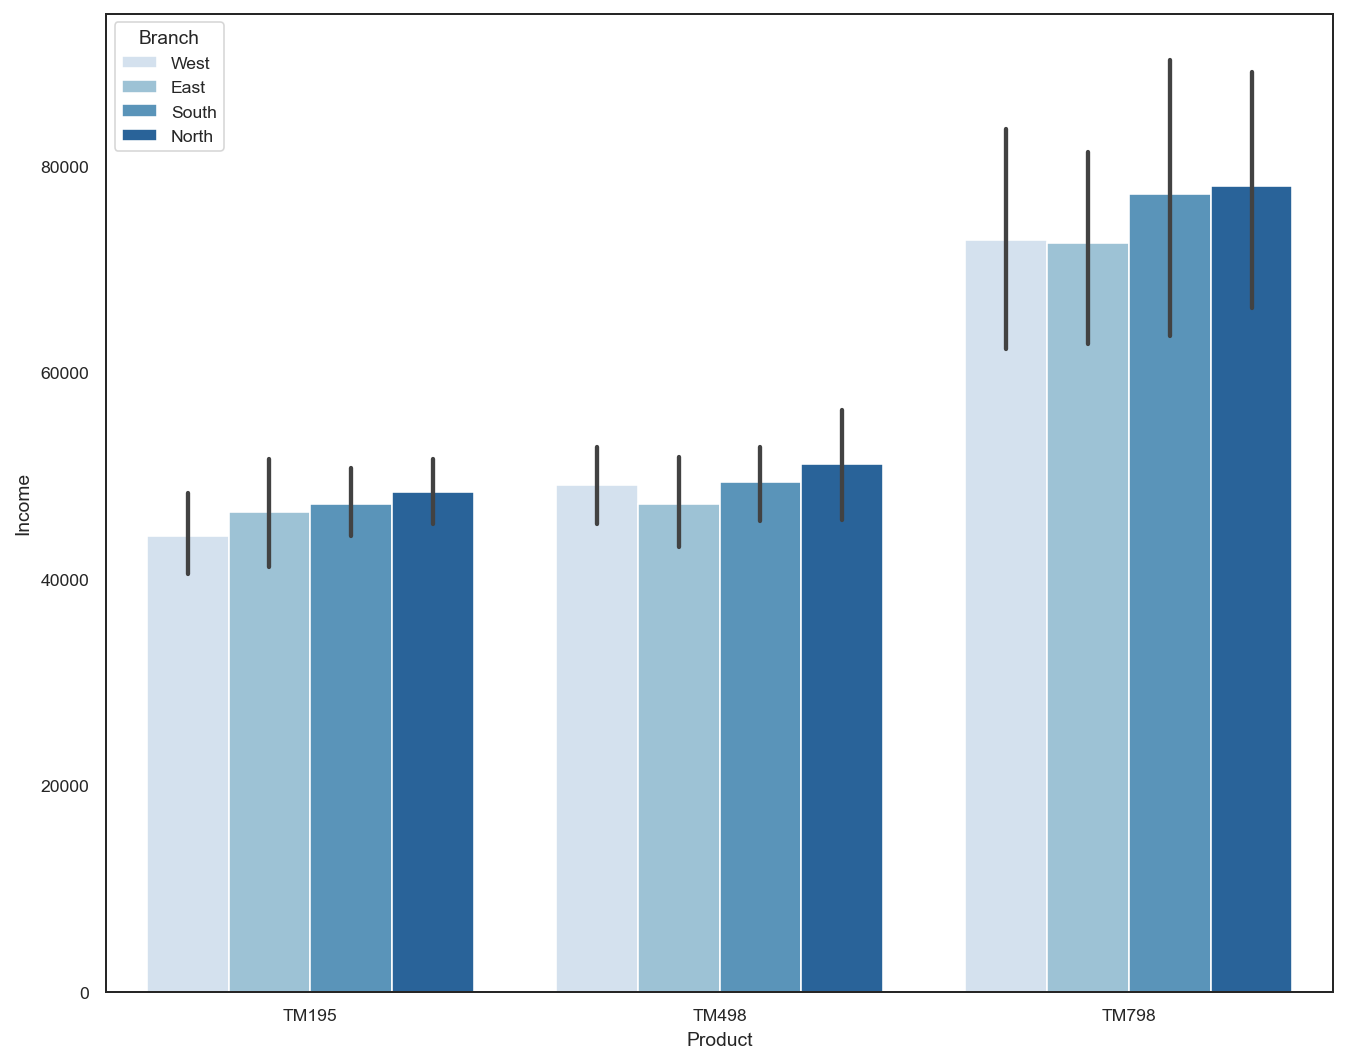

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set the plotting context parameters
sns.set_context('paper')

# Create bar plots using x, y with a hue & mean estimator 
sns.barplot(x = 'Product', y = 'Income', hue = 'Branch', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean)

# Display the plot
plt.show()

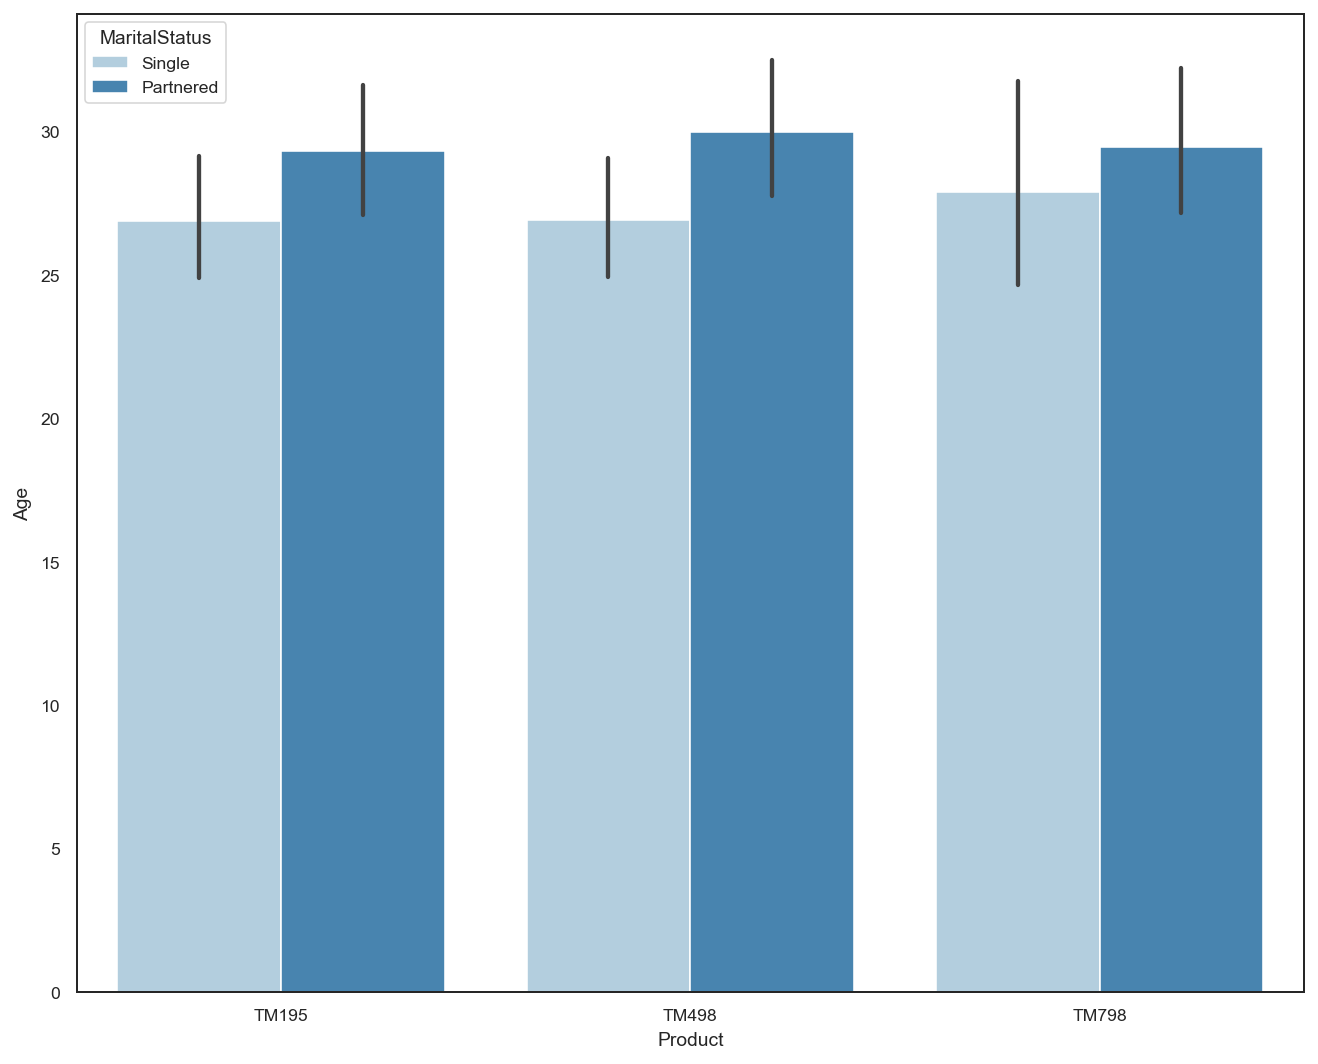

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set the plotting context parameters
sns.set_context('paper')

# Create bar plots using x, y with a hue & mean estimator 
sns.barplot(x = 'Product', y = 'Age', hue = 'MaritalStatus', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean)

# Display the plot
plt.show()

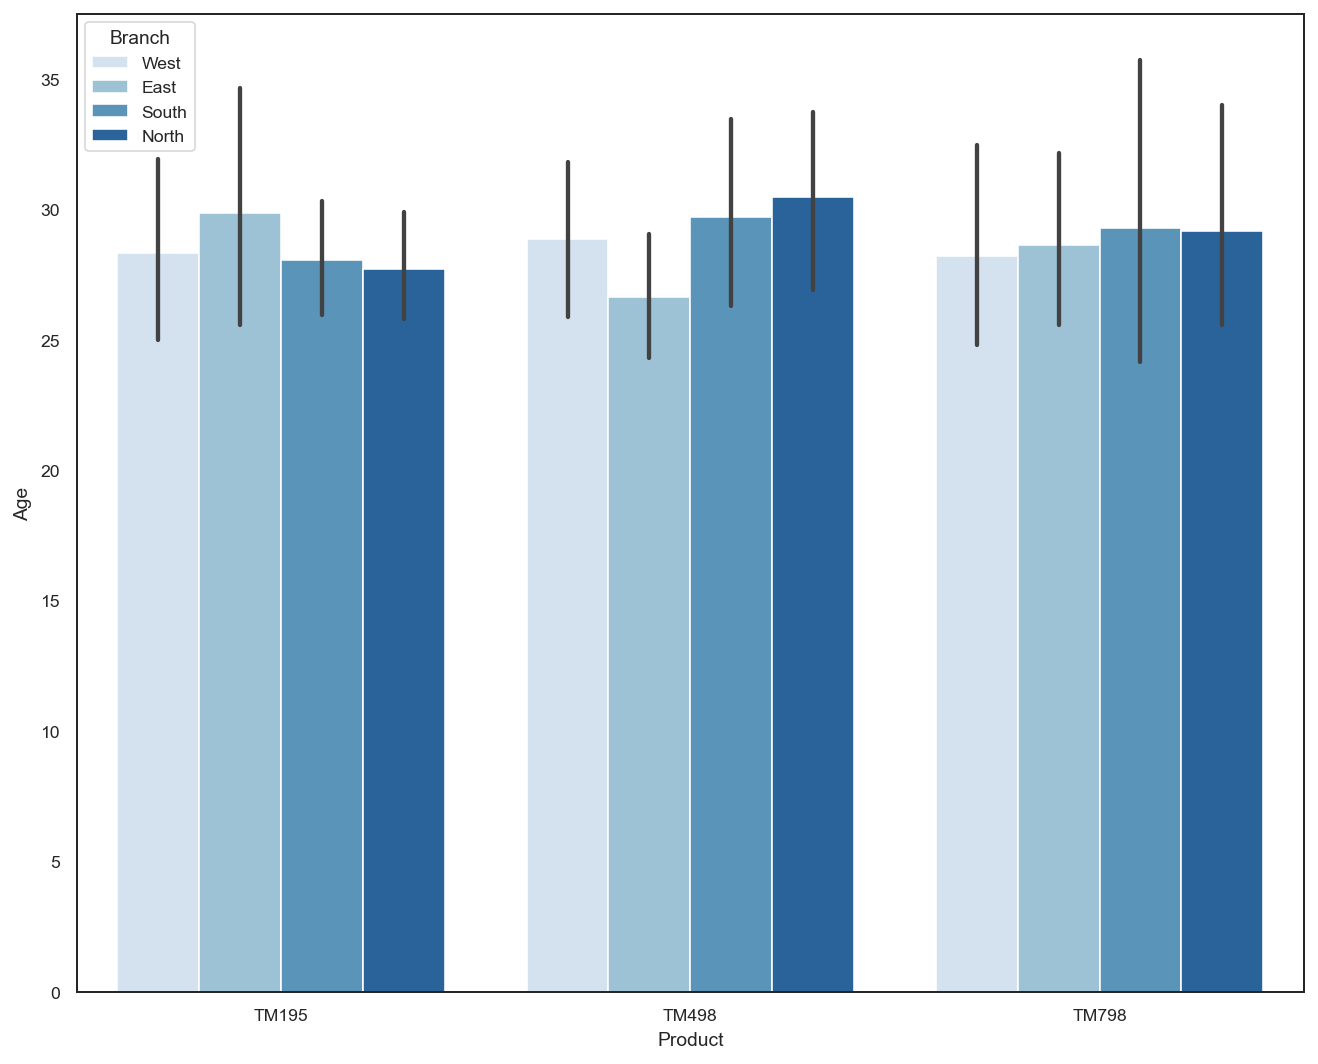

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set the plotting context parameters
sns.set_context('paper')

# Create bar plots using x, y with a hue & mean estimator 
sns.barplot(x = 'Product', y = 'Age', hue = 'Branch', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean)

# Display the plot
plt.show()

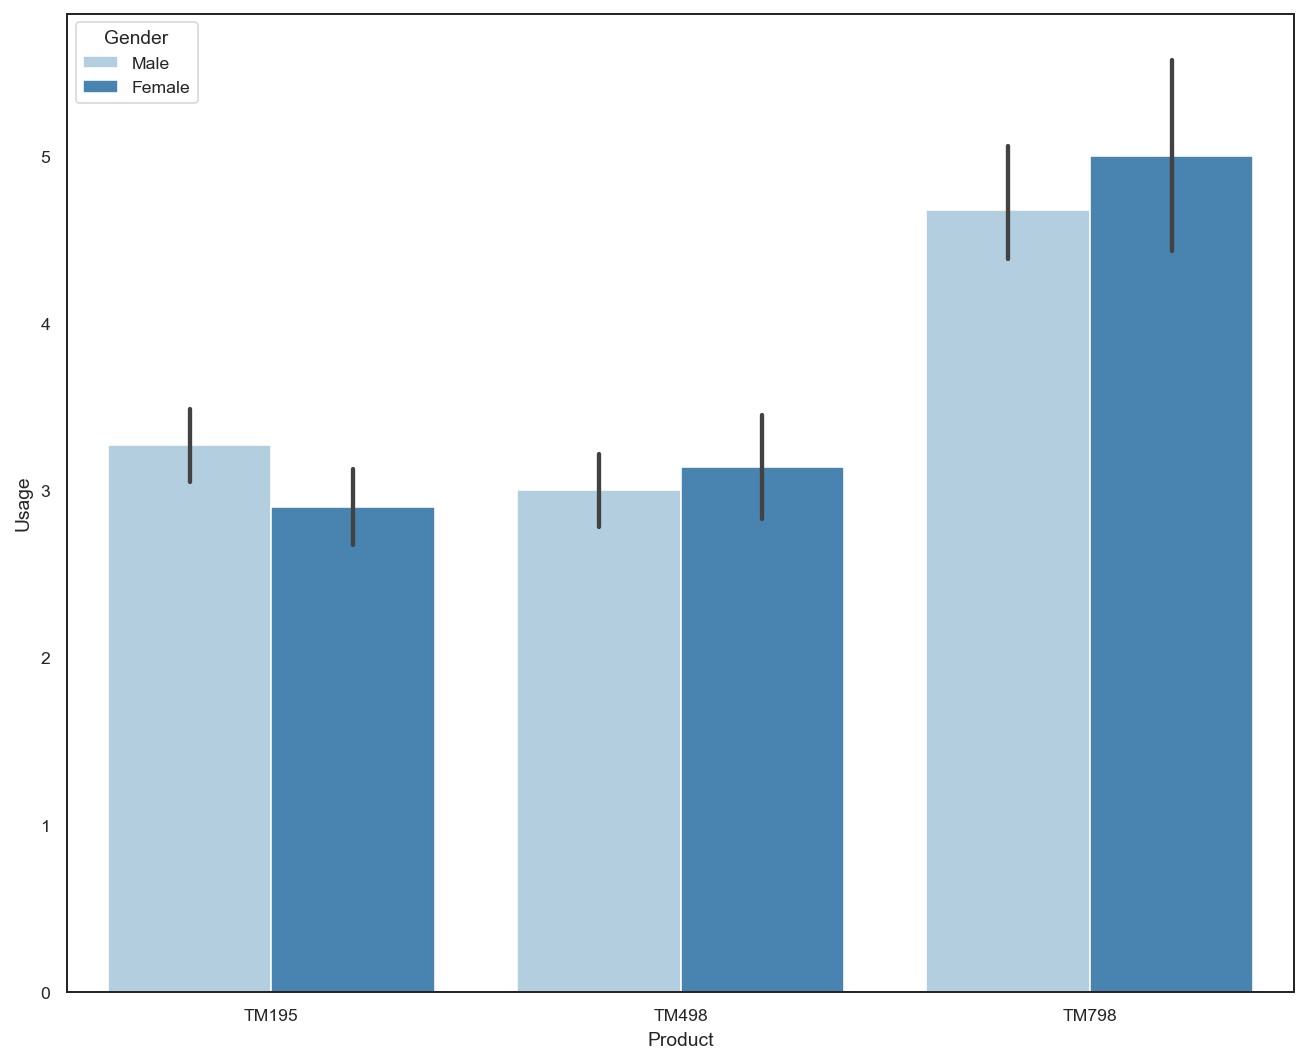

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set the plotting context parameters
sns.set_context('paper')

# Create bar plots using x, y with a hue & mean estimator 
sns.barplot(x = 'Product', y = 'Usage', hue = 'Gender', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean)

# Display the plot
plt.show()

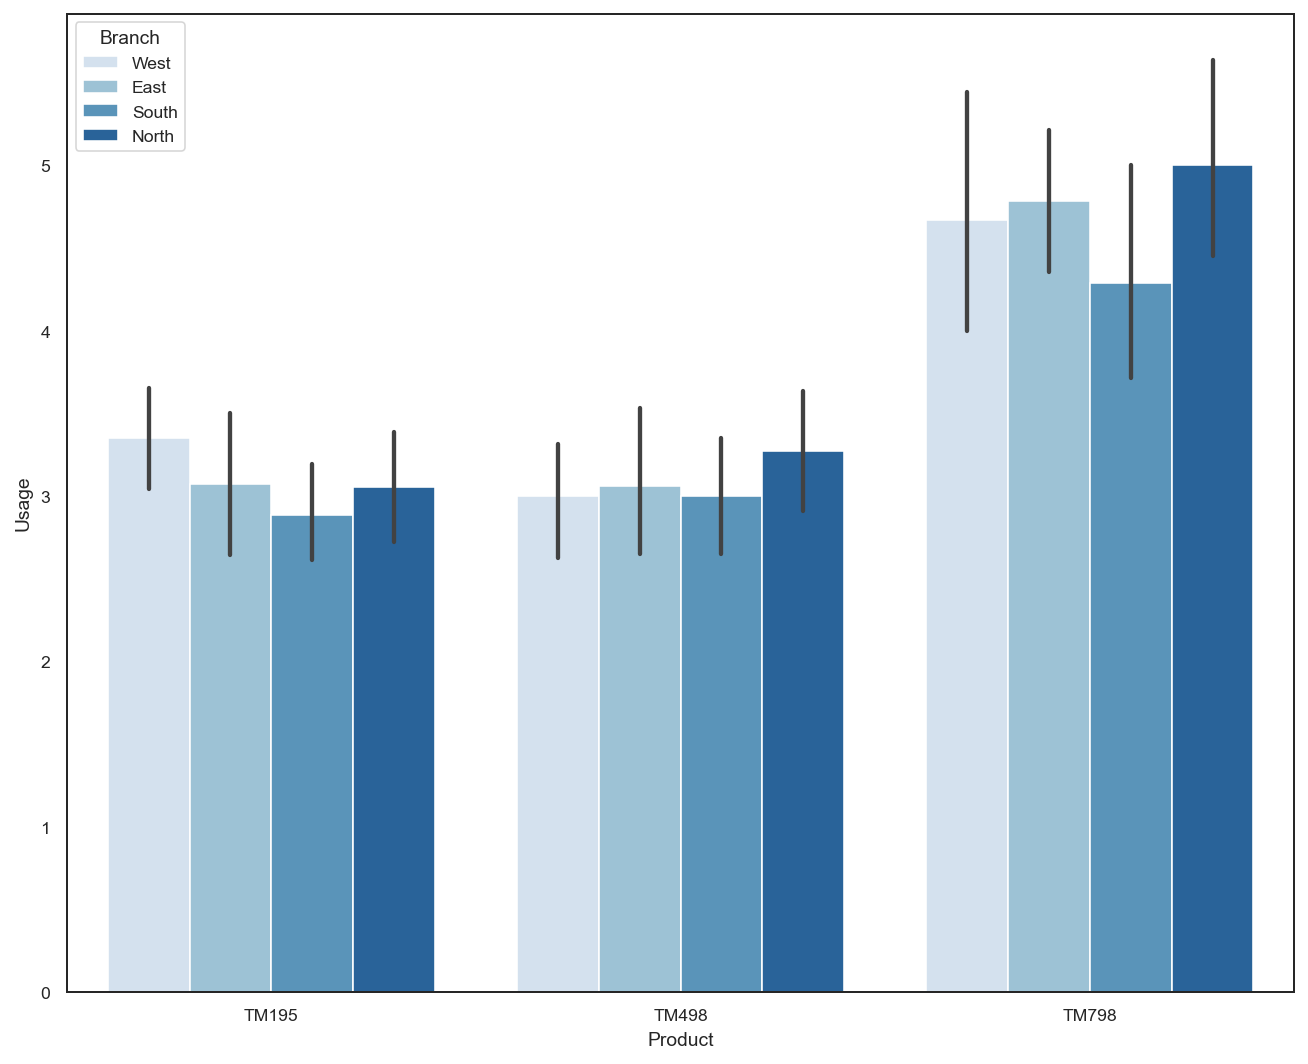

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set the plotting context parameters
sns.set_context('paper')

# Create bar plots using x, y with a hue & mean estimator 
sns.barplot(x = 'Product', y = 'Usage', hue = 'Branch', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean)

# Display the plot
plt.show()

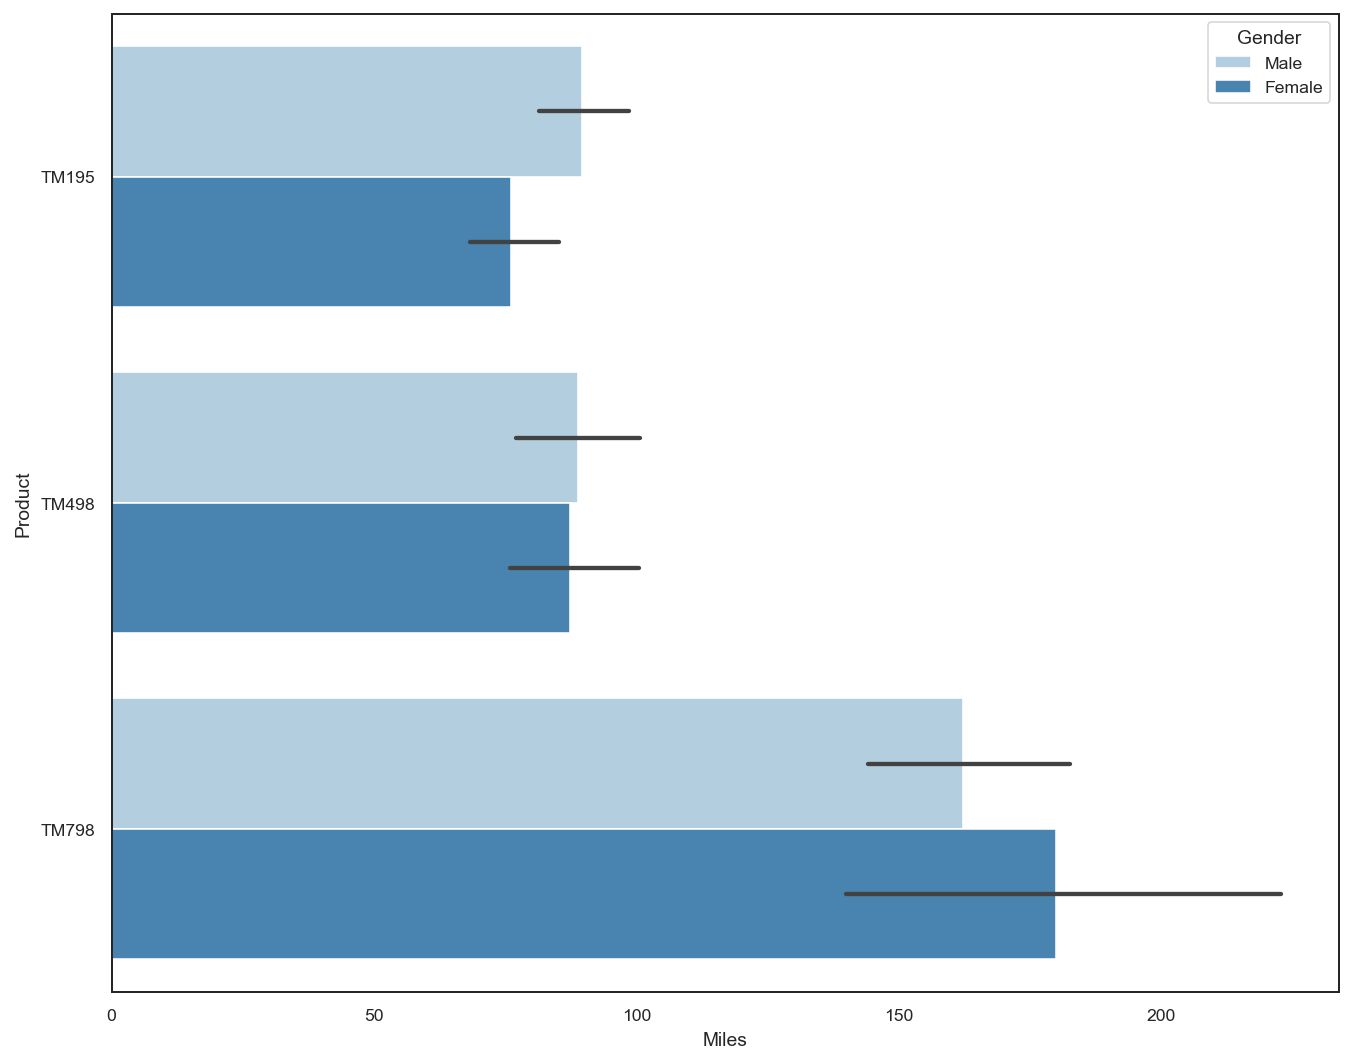

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set the plotting context parameters
sns.set_context('paper')

# Create bar plots using x, y with a hue & mean estimator 
# Horizontal orientation requires numeric `x` variable
sns.barplot(x = 'Miles', y = 'Product', hue = 'Gender', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean, orient = 'h')

# Display the plot
plt.show()

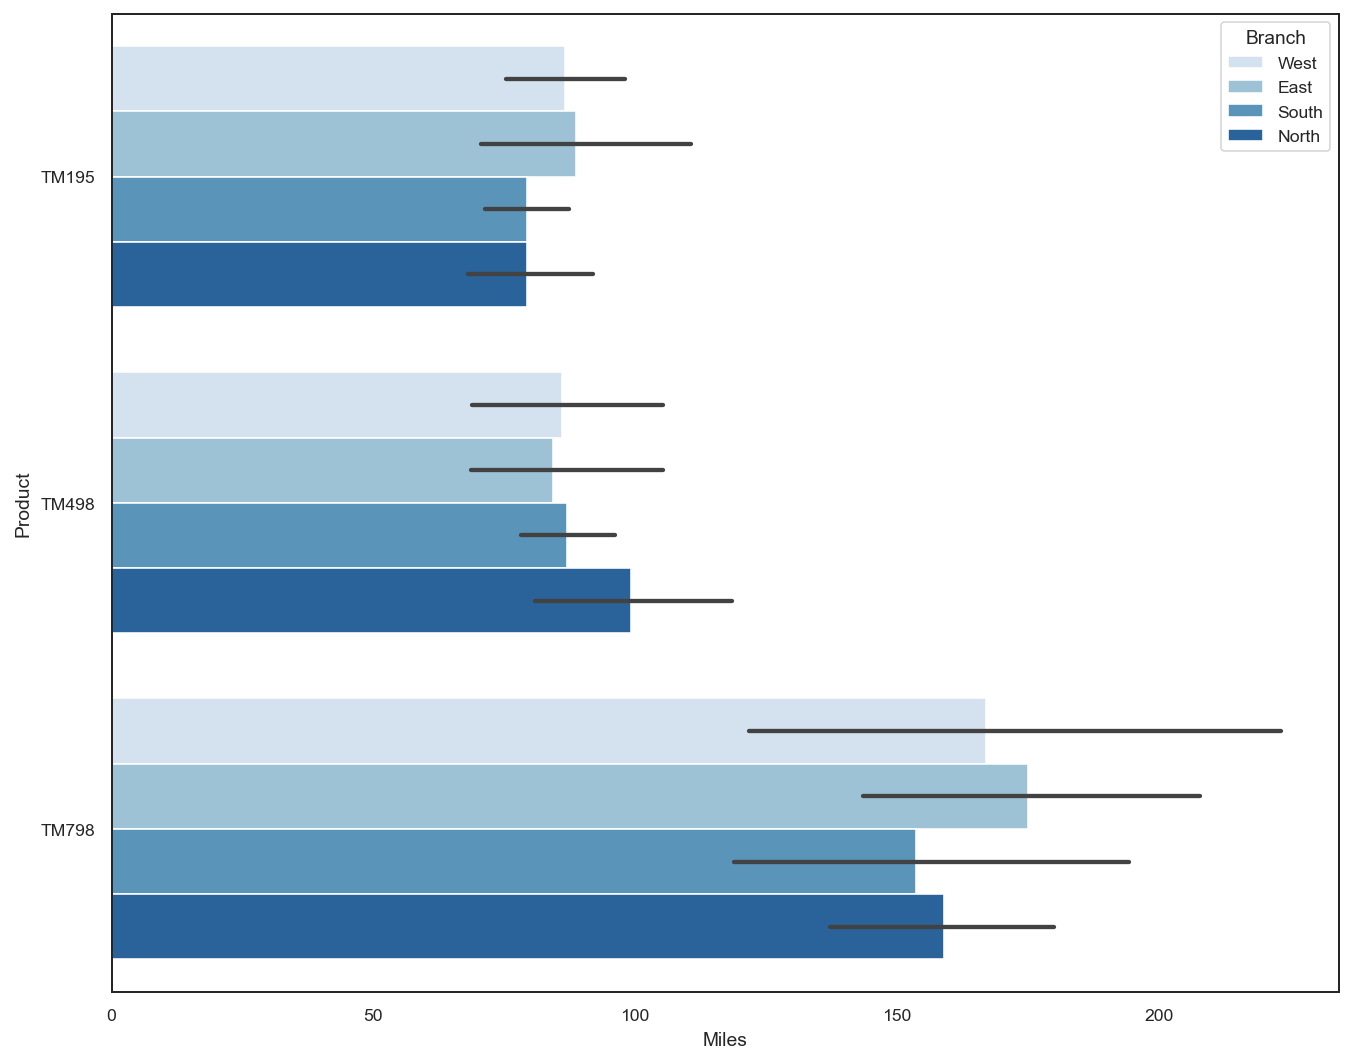

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Set the plotting context parameters
sns.set_context('paper')

# Create bar plots using x, y with a hue & mean estimator 
# Horizontal orientation requires numeric `x` variable
sns.barplot(x = 'Miles', y = 'Product', hue = 'Branch', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean, orient = 'h')

# Display the plot
plt.show()

## Pie Chart

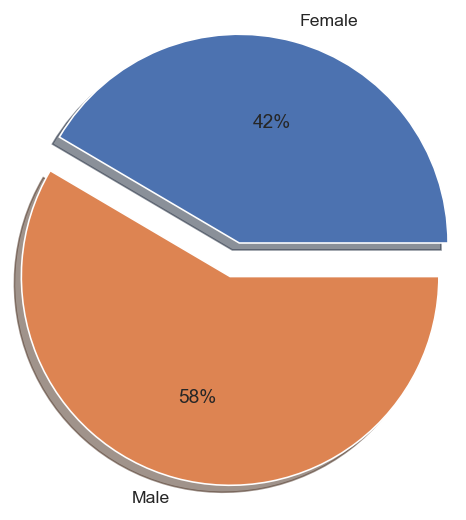

In [ ]:
# Group 'Age' by 'Gender'
genderGroup = df.groupby('Gender')['Age'].count()
#labels = df['Gender'].unique()


# Make square figures and axes
the_grid = GridSpec(1, 1)
# Plot pie chart 
plt.subplot(the_grid[0, 0], aspect=1)
patches, texts, autotexts = plt.pie(genderGroup,explode=(0.1,0.1), labels=["Female", "Male"],
                                    autopct='%.0f%%',
                                    shadow=True, radius=1.2)

# Display the plot
plt.show()  

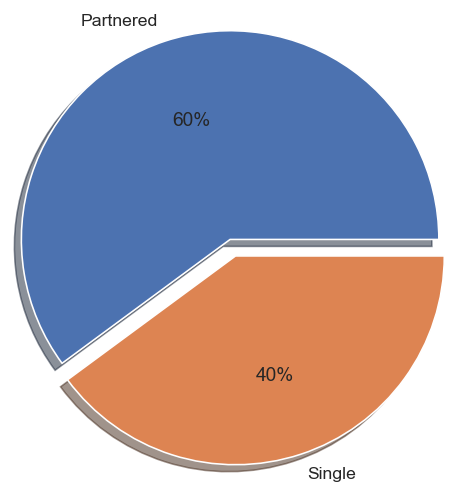

In [ ]:
# Group 'Marital Status' by 'Fitness'
genderGroup = df.groupby('MaritalStatus')['Age'].count()
#labels = df['MaritalStatus'].unique()


# Make square figures and axes
the_grid = GridSpec(1, 1)
# Plot pie chart 
plt.subplot(the_grid[0, 0], aspect=1)
patches, texts, autotexts = plt.pie(genderGroup,explode=(0.1,0), labels=["Partnered", "Single"],
                                    autopct='%.0f%%',
                                    shadow=True, radius=1.2)

# Display the plot
plt.show()  

## Combo Charts

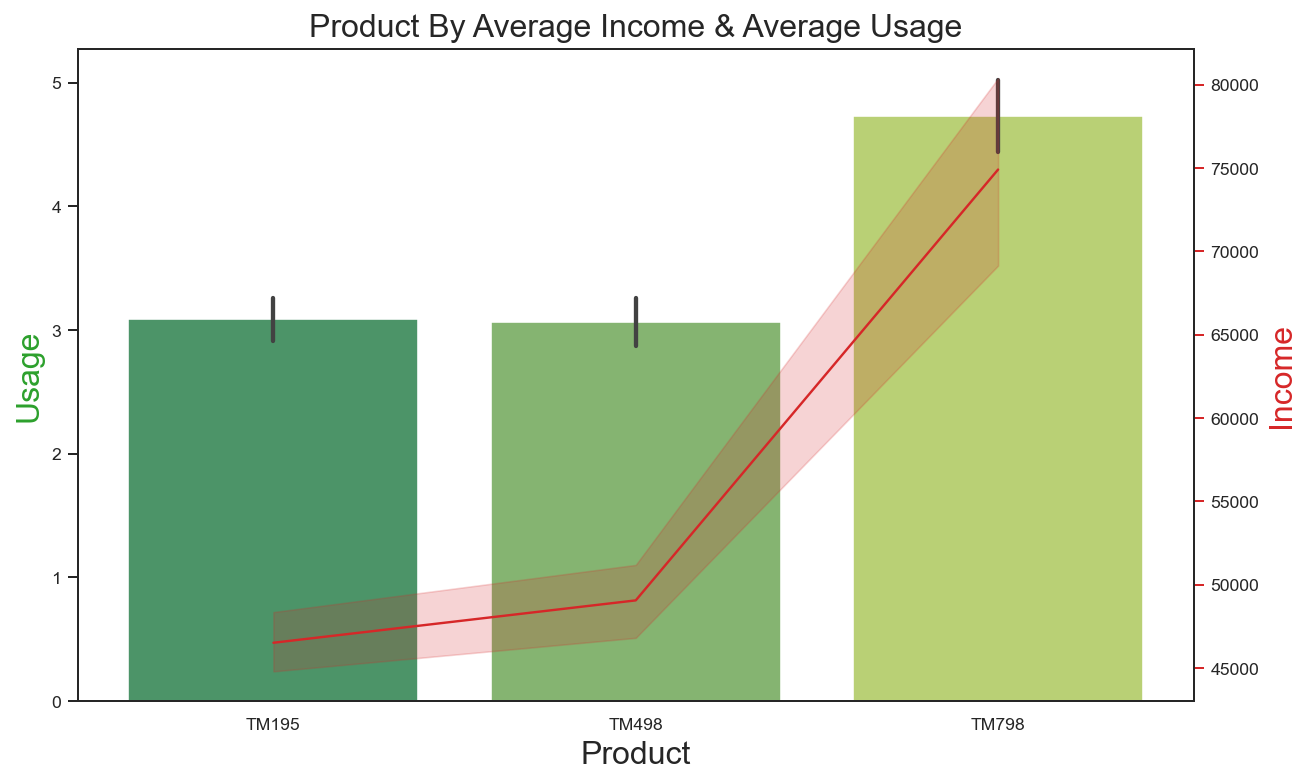

In [ ]:
# Create a figure and subplot
fig, ax1 = plt.subplots(figsize=(10,6))

# Specifying Colors
color = 'tab:green'

# Set title, x-axis, y-axis labels
ax1.set_title('Product By Average Income & Average Usage', fontsize=16)
ax1.set_xlabel('Product', fontsize=16)
ax1.set_ylabel('Usage', fontsize=16, color=color)

# Create bar plots
ax2 = sns.barplot(x='Product', y='Usage', data = df, palette='summer')

# Change the appearance of ticks, tick labels
ax1.tick_params(axis='y')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Specifying Colors
color = 'tab:red'

# Set y-axis label
ax2.set_ylabel('Income', fontsize=16, color=color)

# Create line plot
ax2 = sns.lineplot(x='Product', y='Income', data = df, sort=False, color=color)

# Change the appearance of ticks, tick labels
ax2.tick_params(axis='y', color=color)

# Display the plot
plt.show()

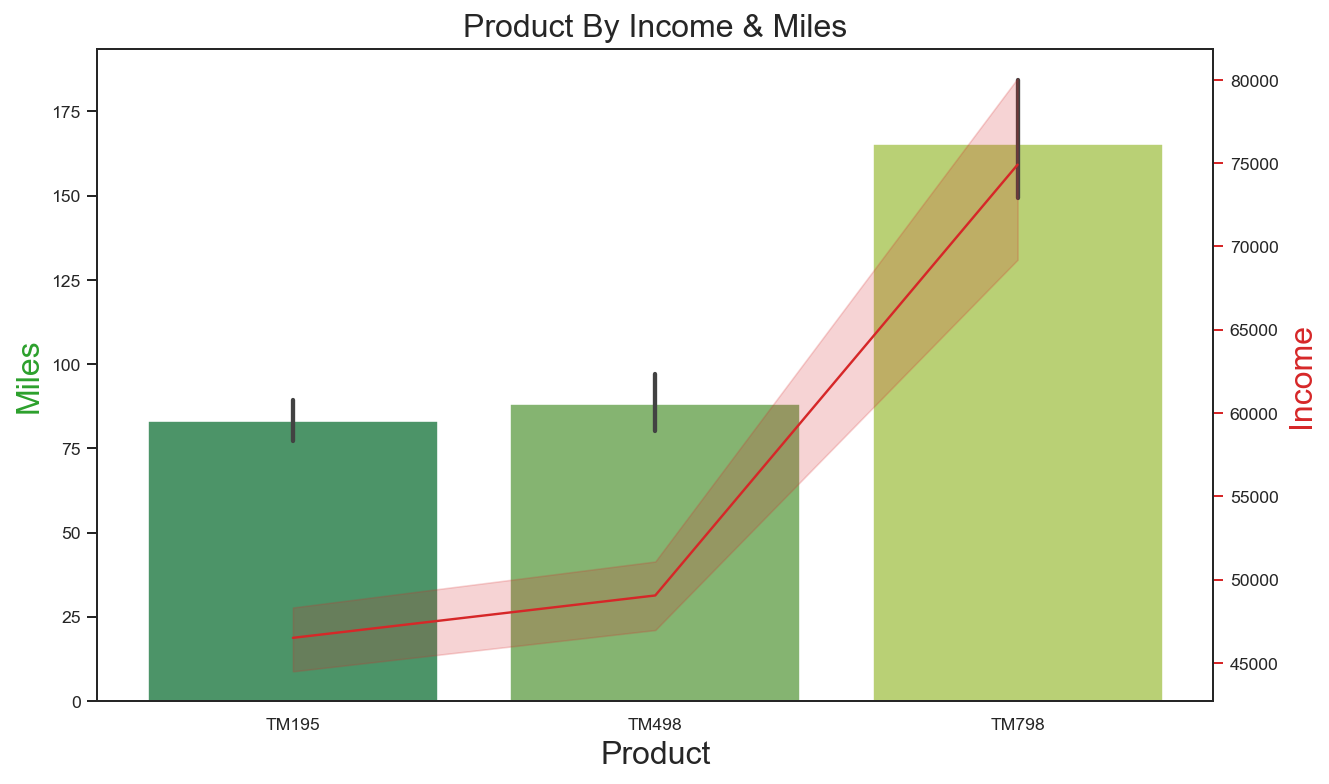

In [ ]:
# Create a figure and subplot
fig, ax1 = plt.subplots(figsize=(10,6))

# Specifying Colors
color = 'tab:green'

# Set title, x-axis, y-axis labels
ax1.set_title('Product By Income & Miles', fontsize=16)
ax1.set_xlabel('Product', fontsize=16)
ax1.set_ylabel('Miles', fontsize=16, color=color)

# Create bar plots
ax2 = sns.barplot(x='Product', y='Miles', data = df, palette='summer')

# Change the appearance of ticks, tick labels
ax1.tick_params(axis='y')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Specifying Colors
color = 'tab:red'

# Set y-axis label
ax2.set_ylabel('Income', fontsize=16, color=color)

# Create line plot
ax2 = sns.lineplot(x='Product', y='Income', data = df, sort=False, color=color)

# Change the appearance of ticks, tick labels
ax2.tick_params(axis='y', color=color)

# Display the plot
plt.show()

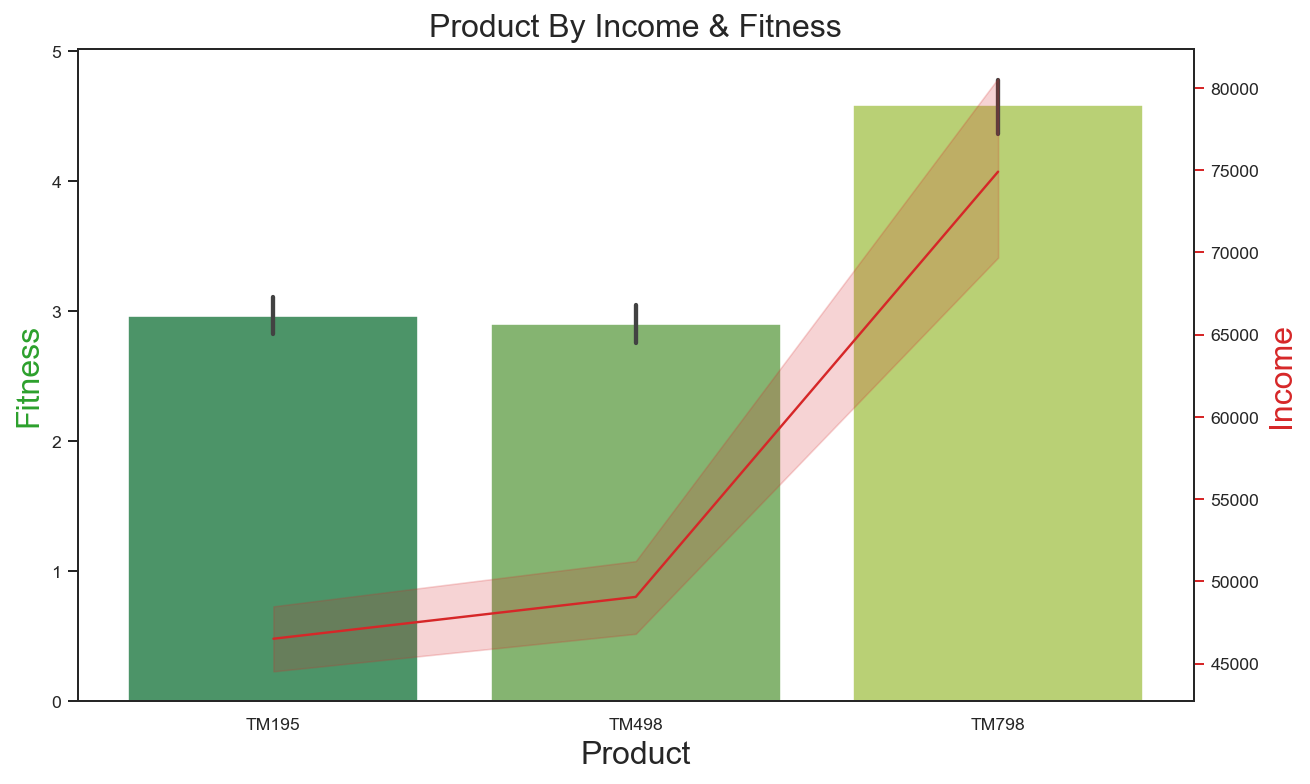

In [ ]:
# Create a figure and subplot
fig, ax1 = plt.subplots(figsize=(10,6))

# Specifying Colors
color = 'tab:green'

# Set title, x-axis, y-axis labels
ax1.set_title('Product By Income & Fitness', fontsize=16)
ax1.set_xlabel('Product', fontsize=16)
ax1.set_ylabel('Fitness', fontsize=16, color=color)

# Create bar plots
ax2 = sns.barplot(x='Product', y='Fitness', data = df, palette='summer')

# Change the appearance of ticks, tick labels
ax1.tick_params(axis='y')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Specifying Colors
color = 'tab:red'

# Set y-axis label
ax2.set_ylabel('Income', fontsize=16, color=color)

# Create line plot
ax2 = sns.lineplot(x='Product', y='Income', data = df, sort=False, color=color)

# Change the appearance of ticks, tick labels
ax2.tick_params(axis='y', color=color)

# Display the plot
plt.show()

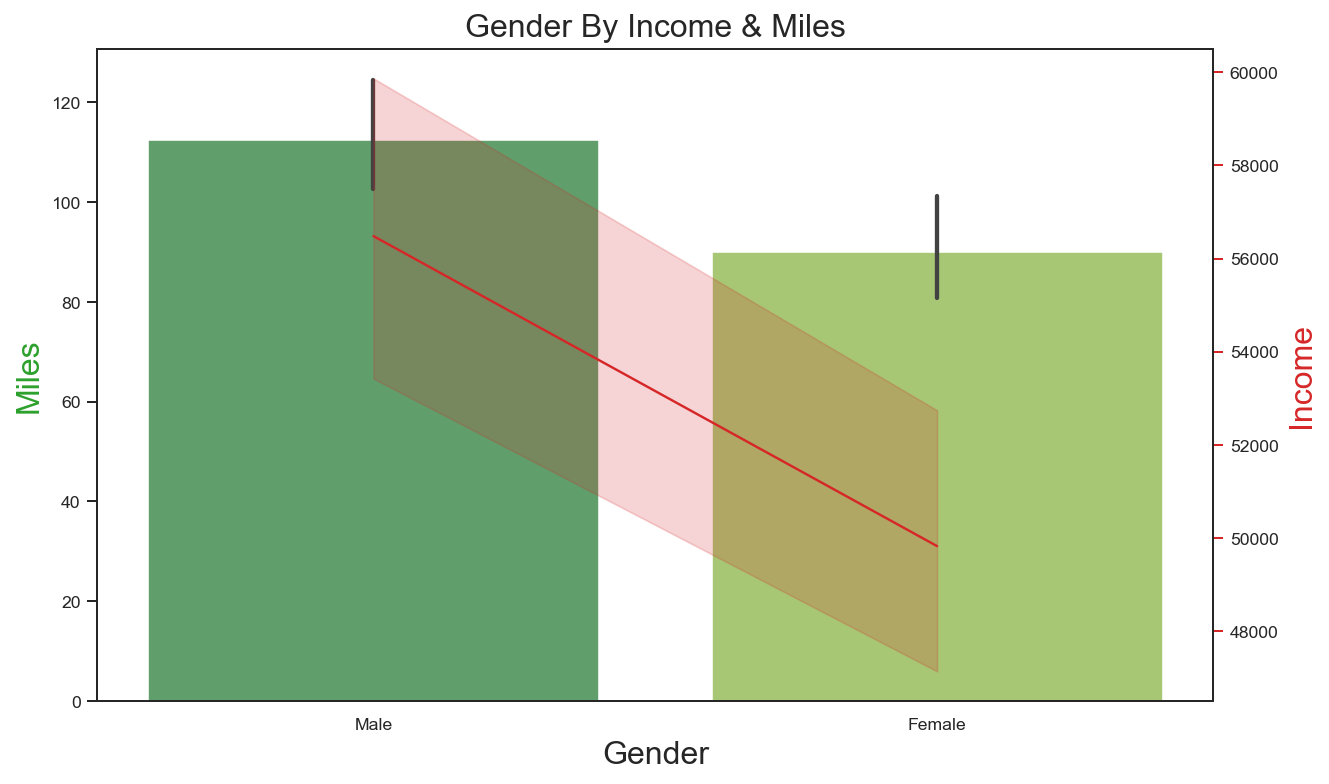

In [ ]:
# Create a figure and subplot
fig, ax1 = plt.subplots(figsize=(10,6))

# Specifying Colors
color = 'tab:green'

# Set title, x-axis, y-axis labels
ax1.set_title('Gender By Income & Miles', fontsize=16)
ax1.set_xlabel('Gender', fontsize=16)
ax1.set_ylabel('Miles', fontsize=16, color=color)

# Create bar plots
ax2 = sns.barplot(x='Gender', y='Miles', data = df, palette='summer')

# Change the appearance of ticks, tick labels
ax1.tick_params(axis='y')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Specifying Colors
color = 'tab:red'

# Set y-axis label
ax2.set_ylabel('Income', fontsize=16, color=color)

# Create line plot
ax2 = sns.lineplot(x='Gender', y='Income', data = df, sort=False, color=color)

# Change the appearance of ticks, tick labels
ax2.tick_params(axis='y', color=color)

# Display the plot
plt.show()

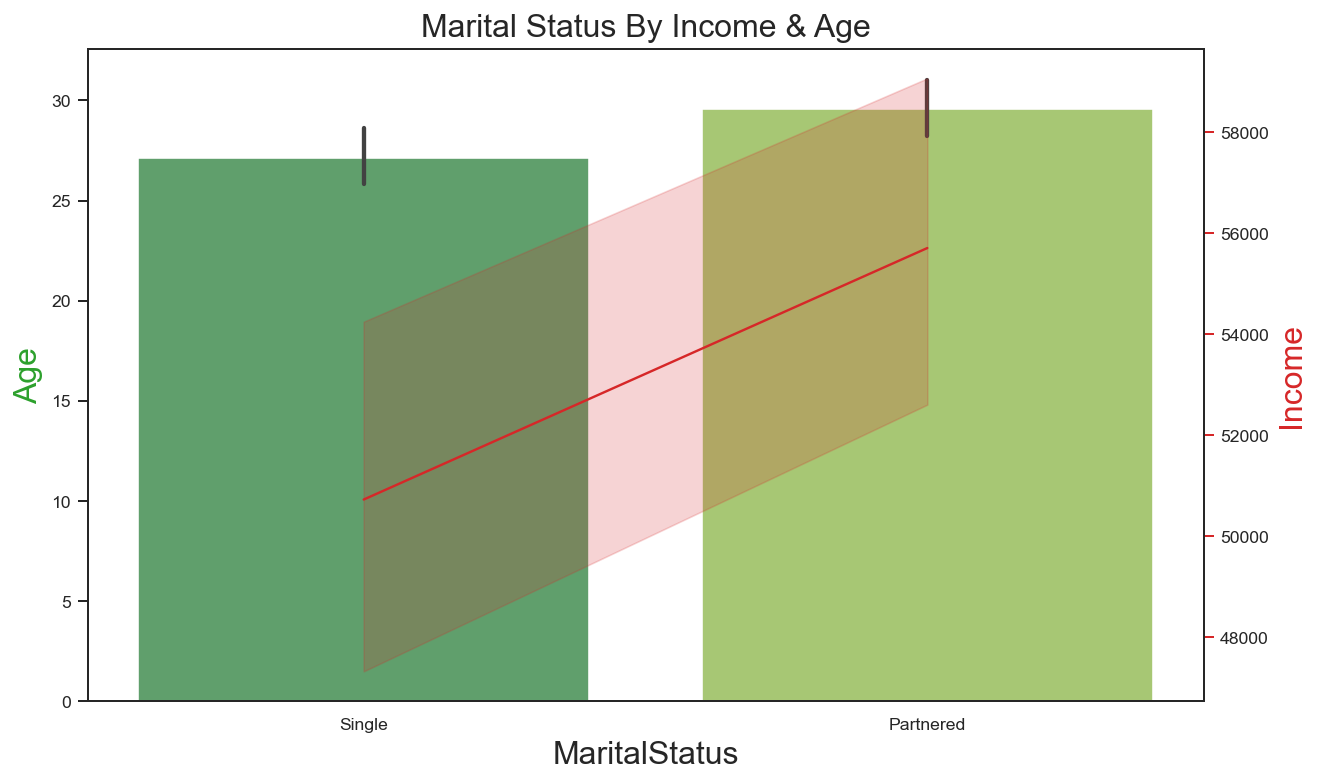

In [ ]:
# Create a figure and subplot
fig, ax1 = plt.subplots(figsize=(10,6))

# Specifying Colors
color = 'tab:green'

# Set title, x-axis, y-axis labels
ax1.set_title('Marital Status By Income & Age', fontsize=16)
ax1.set_xlabel('Marital Status', fontsize=16)
ax1.set_ylabel('Age', fontsize=16, color=color)

# Create bar plots
ax2 = sns.barplot(x='MaritalStatus', y='Age', data = df, palette='summer')

# Change the appearance of ticks, tick labels
ax1.tick_params(axis='y')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Specifying Colors
color = 'tab:red'

# Set y-axis label
ax2.set_ylabel('Income', fontsize=16, color=color)

# Create line plot
ax2 = sns.lineplot(x='MaritalStatus', y='Income', data = df, sort=False, color=color)

# Change the appearance of ticks, tick labels
ax2.tick_params(axis='y', color=color)

# Display the plot
plt.show()

## Interactive Visualisations

## Pie Chart

In [ ]:
# Create pie chart
fig = px.pie(df, values='Age', names='MaritalStatus')

# Display the plot 
fig.show()

In [ ]:
# Create pie chart
fig = px.pie(df, values='Age', names='Gender')

# Display the plot 
fig.show()

## Horizontal Bar Chart

In [21]:
# Create horizontal bar chart, set title 
fig = px.bar(df, x="Income", y="Gender", color='Income', orientation='h',
             hover_data=["Miles", "Usage", "Fitness"],
             height=400,
             title="Gender's Income Distribution")

# Display the plot 
fig.show()

## Sunburst Chart

In [12]:
# Create sunburst chart 
fig = px.sunburst(df, path=['Gender', 'MaritalStatus', 'Fitness'], values='Fitness')

# Display the plot 
fig.show()

## Scatter Plot

In [13]:
# Create scatter plot 
fig = px.scatter(df, x="Product", y="Fitness", color="Education",
                 size='Income', hover_data=['Gender'])

# Display the plot 
fig.show()

## Bar Chart With Long-Form Data

In [22]:
# Create bar chart with long-form data 
fig = px.bar(df, x="Product", y=["Income"], color="Fitness", title="Bar Chart Long-Form Data: Product By Income & Fitness") # Wide-Form Input

# Display the plot
fig.show()

In [23]:
# Create bar chart with long-form data 
fig = px.bar(df, x="Product", y=["Income"], color="Education", title="Bar Chart Long-Form Data: Product By Income & Educaton") # Wide-Form Input

# Display the plot
fig.show()

## Encoding Categorical Data With Dummy Variables

In [24]:
# Encoding categorical data with dummy variables
df["Product_int"] = df["Product"].replace(["TM195","TM498", "TM798"],[1, 2, 3])
df["Branch_int"] = df["Branch"].replace(["South","East", "North", "West"],[1, 2, 3, 4])

# Conversion of data type from string to integer
df["Product_int"] = df["Product_int"].astype(int)
df["Branch_int"] = df["Branch_int"].astype(int)

# Check data type of each column 
print(df.dtypes)

Product          object
Branch           object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
Product_int       int64
Branch_int        int64
dtype: object


## Dashbaord

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a futur

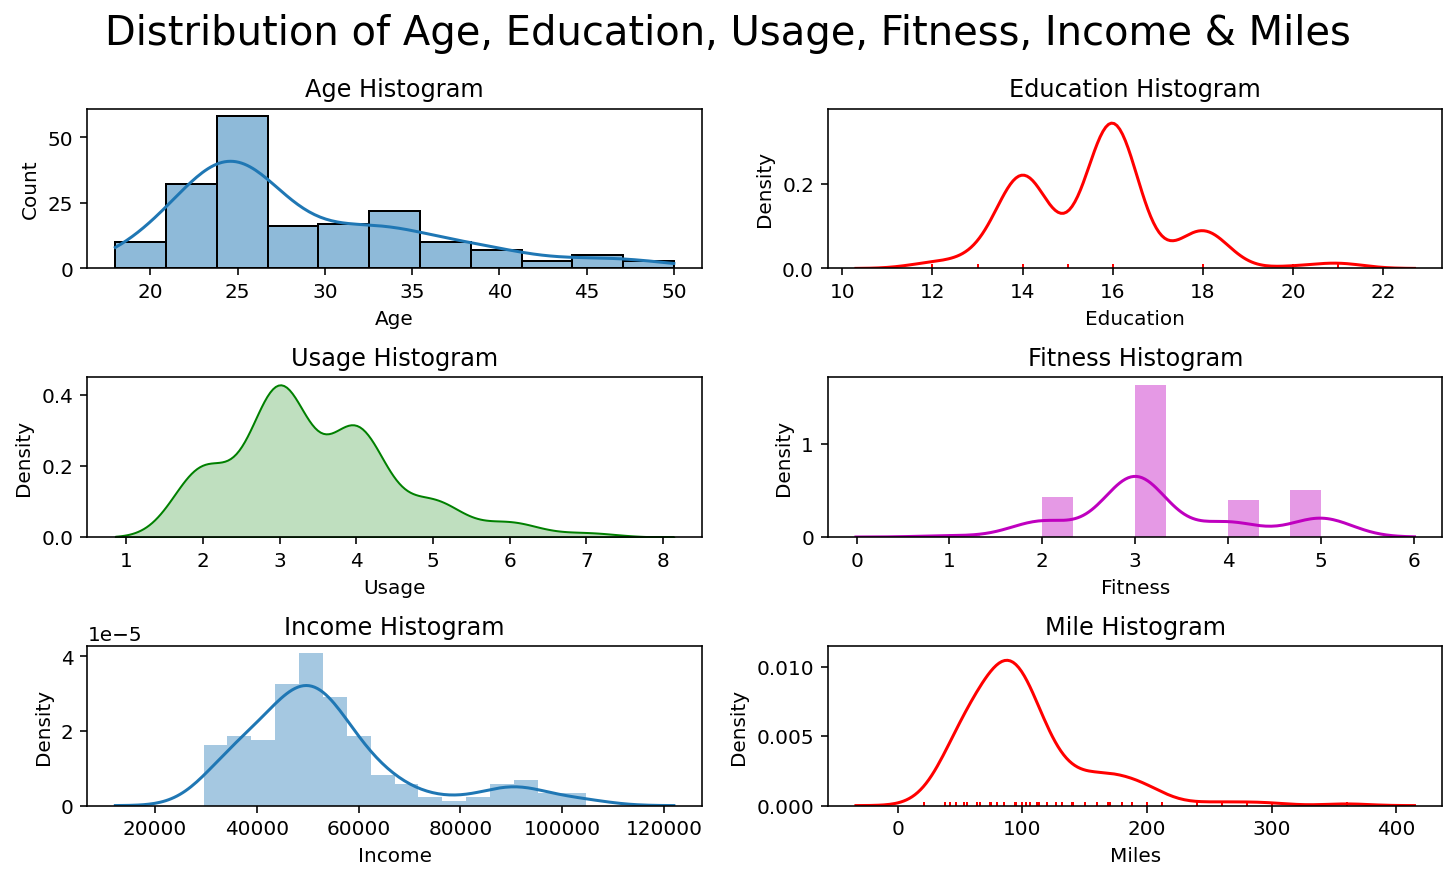

In [17]:
# Set figure size with matplotlib
fig, ax = plt.subplots(3,2, figsize=(10,6), constrained_layout=True) # Object oriented style 

# Plot a simple histogram with binsize determined automatically <-------------------------------------------------------
ax1 = sns.histplot(df.Age,kde=True, ax=ax[0,0]) 
ax1.set_title("Age Histogram")

# Plot a kernel density estimate and rug plot <-------------------------------------------------------
ax2 = sns.distplot(df.Education, hist=False, rug=True, color='r', ax=ax[0,1]) 
ax2.set_title("Education Histogram")

# Plot a filled kernel density estimate <-------------------------------------------------------
ax3 = sns.distplot(df.Usage, hist=False, color="g", kde_kws={"shade": True}, ax=ax[1,0])
ax3.set_title("Usage Histogram")

# Plot a histogram and kernel density estimate <-------------------------------------------------------
ax4 = sns.distplot(df.Fitness, color="m", kde=True, ax=ax[1,1]) 
ax4.set_title("Fitness Histogram")

# Plot a simple histogram with binsize determined automatically <-------------------------------------------------------
ax1 = sns.distplot(df.Income, ax=ax[2,0]) 
ax1.set_title("Income Histogram")

# Plot a kernel density estimate and rug plot <-------------------------------------------------------
ax2 = sns.distplot(df.Miles, hist=False, rug=True, color='r', ax=ax[2,1]) 
ax2.set_title("Mile Histogram")

fig.suptitle("Distribution of Age, Education, Usage, Fitness, Income & Miles", fontsize=20)

# Display the plot
plt.show()

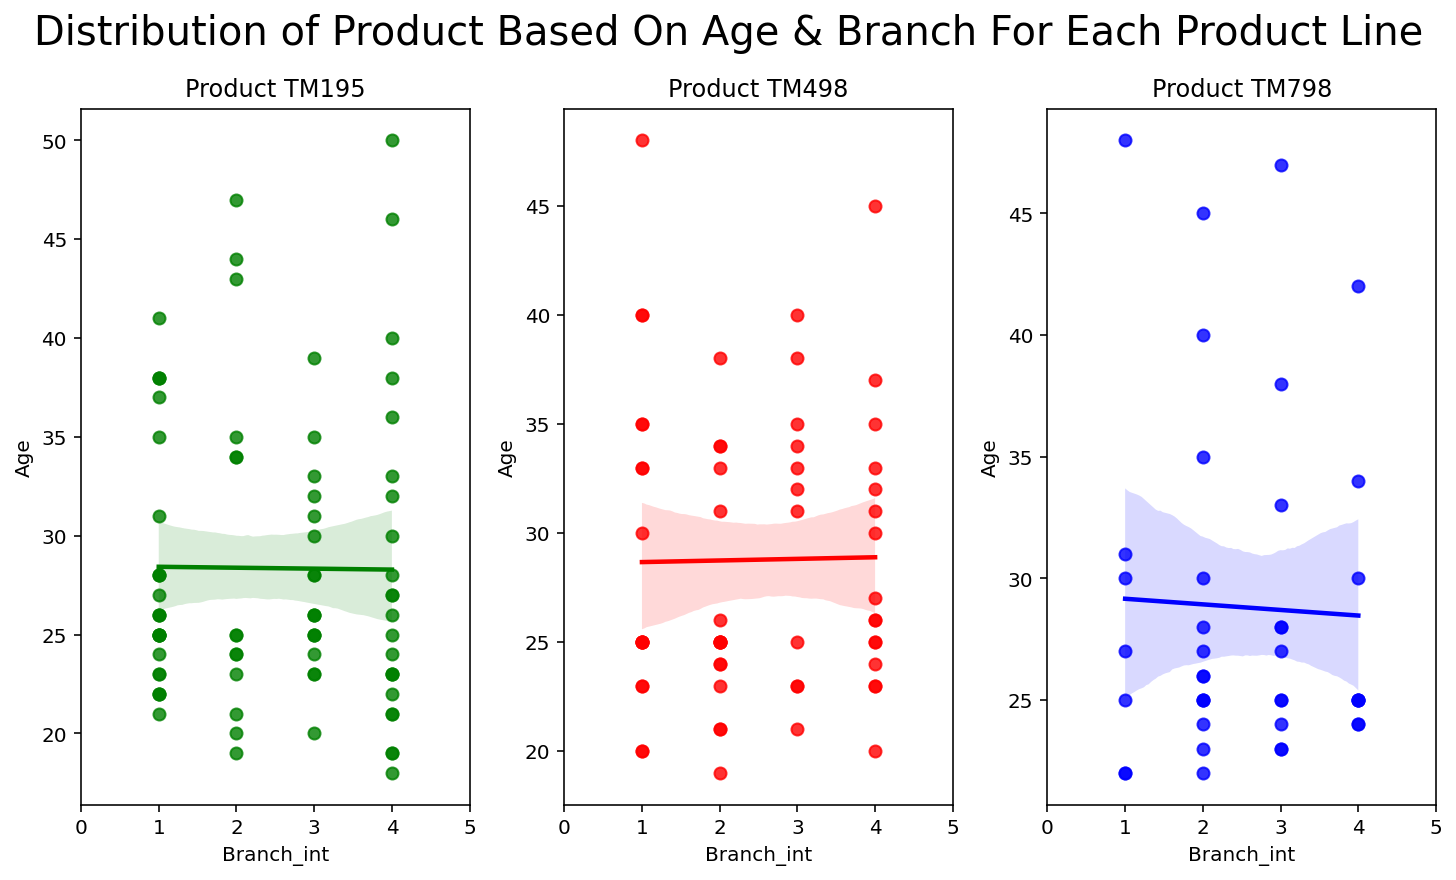

In [18]:
# create a figure with axes of 1 row and 3 columns
fig, ax = plt.subplots(1,3, figsize=(10,6), constrained_layout=True) # Object oriented style 

# Plot "Age" (y-axis) and "Branch_int" (x-axis) for each product line
ax1 = sns.regplot(x='Branch_int', y='Age', data=df[df["Product_int"] == 1], ax=ax[0], color="g") # axes plot (object oriented style) = more than one chart at one time                 
ax1.set_title("Product TM195")
ax2 = sns.regplot(x='Branch_int', y='Age', data=df[df["Product_int"] == 2], ax=ax[1], color="r") 
ax2.set_title("Product TM498")
ax3 = sns.regplot(x='Branch_int', y='Age', data=df[df["Product_int"] == 3], ax=ax[2], color="b")
ax3.set_title("Product TM798")

# State title 
fig.suptitle("Distribution of Product Based On Age & Branch For Each Product Line", fontsize=20)

# Set x axis range 
ax1.set(xlim=(0,5))
ax2.set(xlim=(0,5))
ax3.set(xlim=(0,5))

# Display the plot
plt.show()

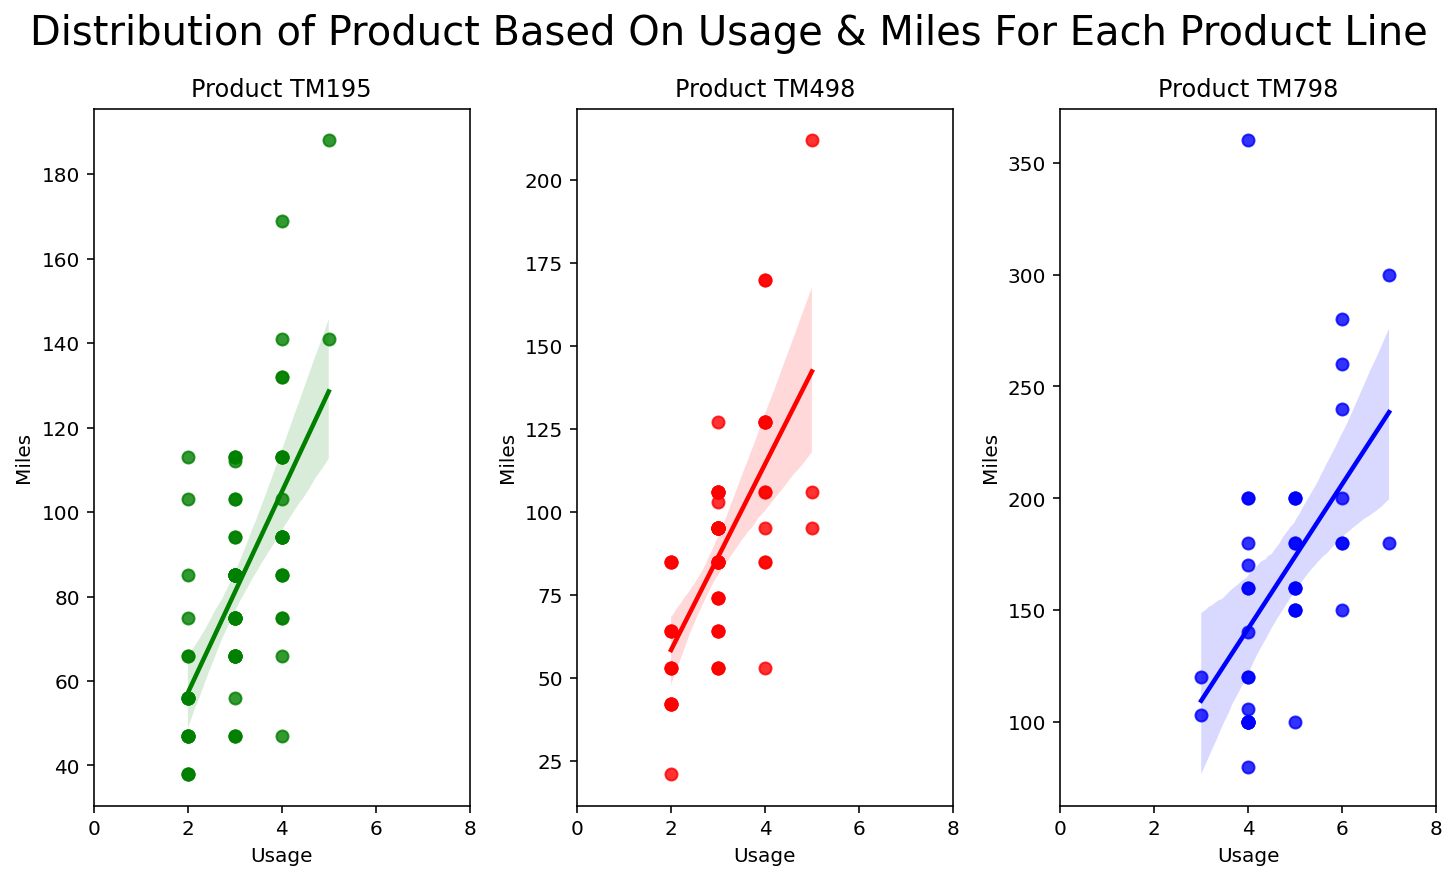

In [19]:
# create a figure with axes of 1 row and 3 columns
fig, ax = plt.subplots(1,3, figsize=(10,6), constrained_layout=True) # Object oriented style 

# Plot "Miles" (y-axis) and "Usage" (x-axis) for each product line
ax1 = sns.regplot(x='Usage', y='Miles', data=df[df["Product_int"] == 1], ax=ax[0], color="g") # axes plot (object oriented style) = more than one chart at one time                 
ax1.set_title("Product TM195")
ax2 = sns.regplot(x='Usage', y='Miles', data=df[df["Product_int"] == 2], ax=ax[1], color="r") 
ax2.set_title("Product TM498")
ax3 = sns.regplot(x='Usage', y='Miles', data=df[df["Product_int"] == 3], ax=ax[2], color="b")
ax3.set_title("Product TM798")

# State title 
fig.suptitle("Distribution of Product Based On Usage & Miles For Each Product Line", fontsize=20)

# Set x axis range 
ax1.set(xlim=(0,8))
ax2.set(xlim=(0,8))
ax3.set(xlim=(0,8))

# Display the plot
plt.show()

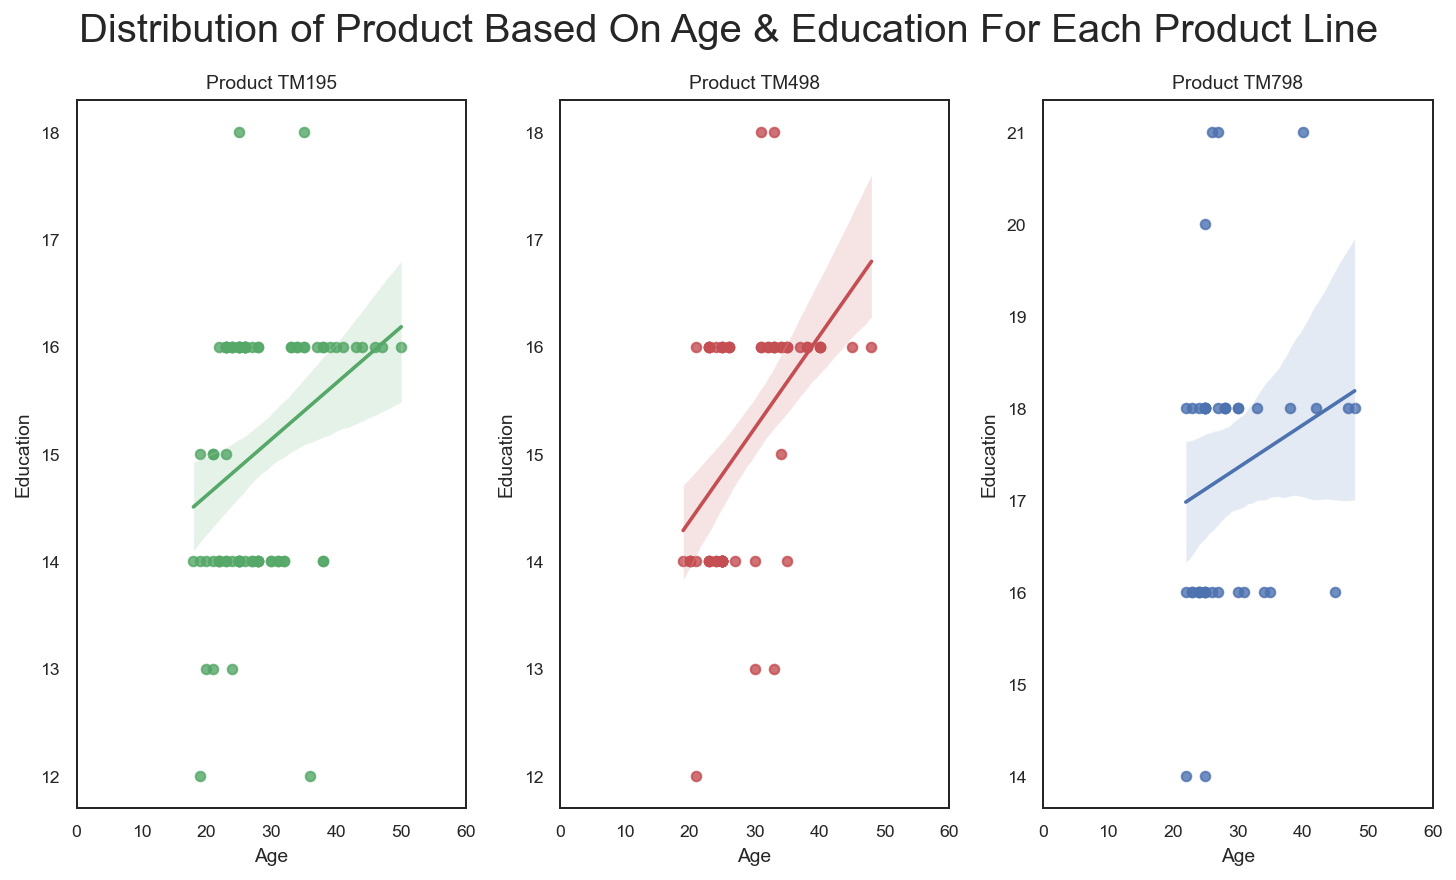

In [ ]:
# create a figure with axes of 1 row and 3 columns
fig, ax = plt.subplots(1,3, figsize=(10,6), constrained_layout=True) # Object oriented style 

# Plot "Education" (y-axis) and "Age" (x-axis) for each product line
ax1 = sns.regplot(x='Age', y='Education', data=df[df["Product_int"] == 1], ax=ax[0], color="g") # axes plot (object oriented style) = more than one chart at one time                 
ax1.set_title("Product TM195")
ax2 = sns.regplot(x='Age', y='Education', data=df[df["Product_int"] == 2], ax=ax[1], color="r") 
ax2.set_title("Product TM498")
ax3 = sns.regplot(x='Age', y='Education', data=df[df["Product_int"] == 3], ax=ax[2], color="b")
ax3.set_title("Product TM798")

# Set title
fig.suptitle("Distribution of Product Based On Age & Education For Each Product Line", fontsize=20)

# Set x axis range 
ax1.set(xlim=(0,60))
ax2.set(xlim=(0,60))
ax3.set(xlim=(0,60))

# Display the plot
plt.show()

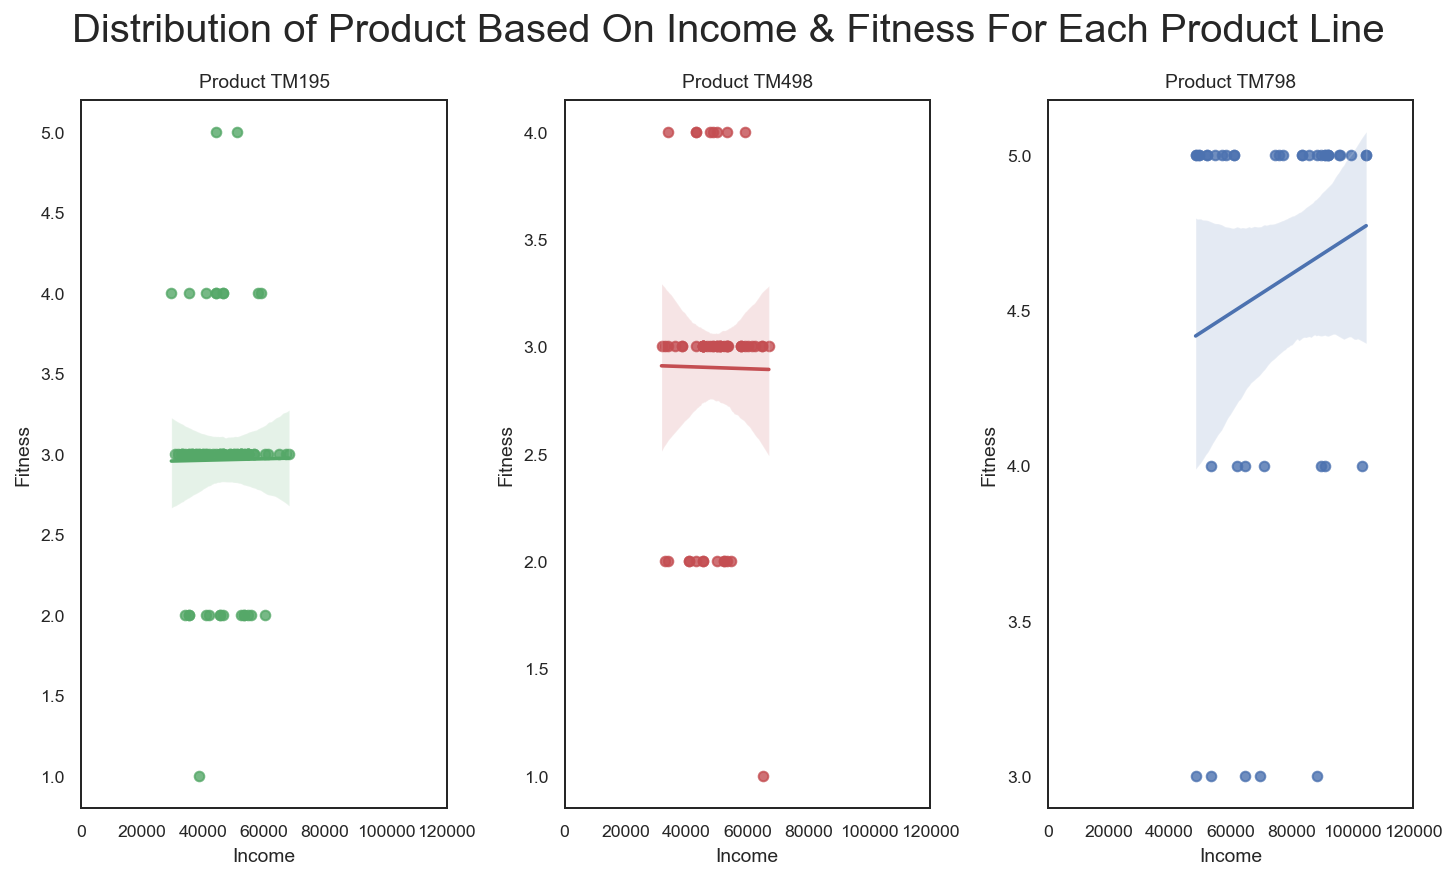

In [ ]:
# create a figure with axes of 1 row and 3 columns
fig, ax = plt.subplots(1,3, figsize=(10,6), constrained_layout=True) # Object oriented style 

# Plot "Fitness" (y-axis) and "Income" (x-axis) for each product line
ax1 = sns.regplot(x='Income', y='Fitness', data=df[df["Product_int"] == 1], ax=ax[0], color="g") # axes plot (object oriented style) = more than one chart at one time                 
ax1.set_title("Product TM195")
ax2 = sns.regplot(x='Income', y='Fitness', data=df[df["Product_int"] == 2], ax=ax[1], color="r") 
ax2.set_title("Product TM498")
ax3 = sns.regplot(x='Income', y='Fitness', data=df[df["Product_int"] == 3], ax=ax[2], color="b")
ax3.set_title("Product TM798")

# Set title
fig.suptitle("Distribution of Product Based On Income & Fitness For Each Product Line", fontsize=20)

# Set x axis range 
ax1.set(xlim=(0,120000))
ax2.set(xlim=(0,120000))
ax3.set(xlim=(0,120000))

# Display the plot
plt.show()

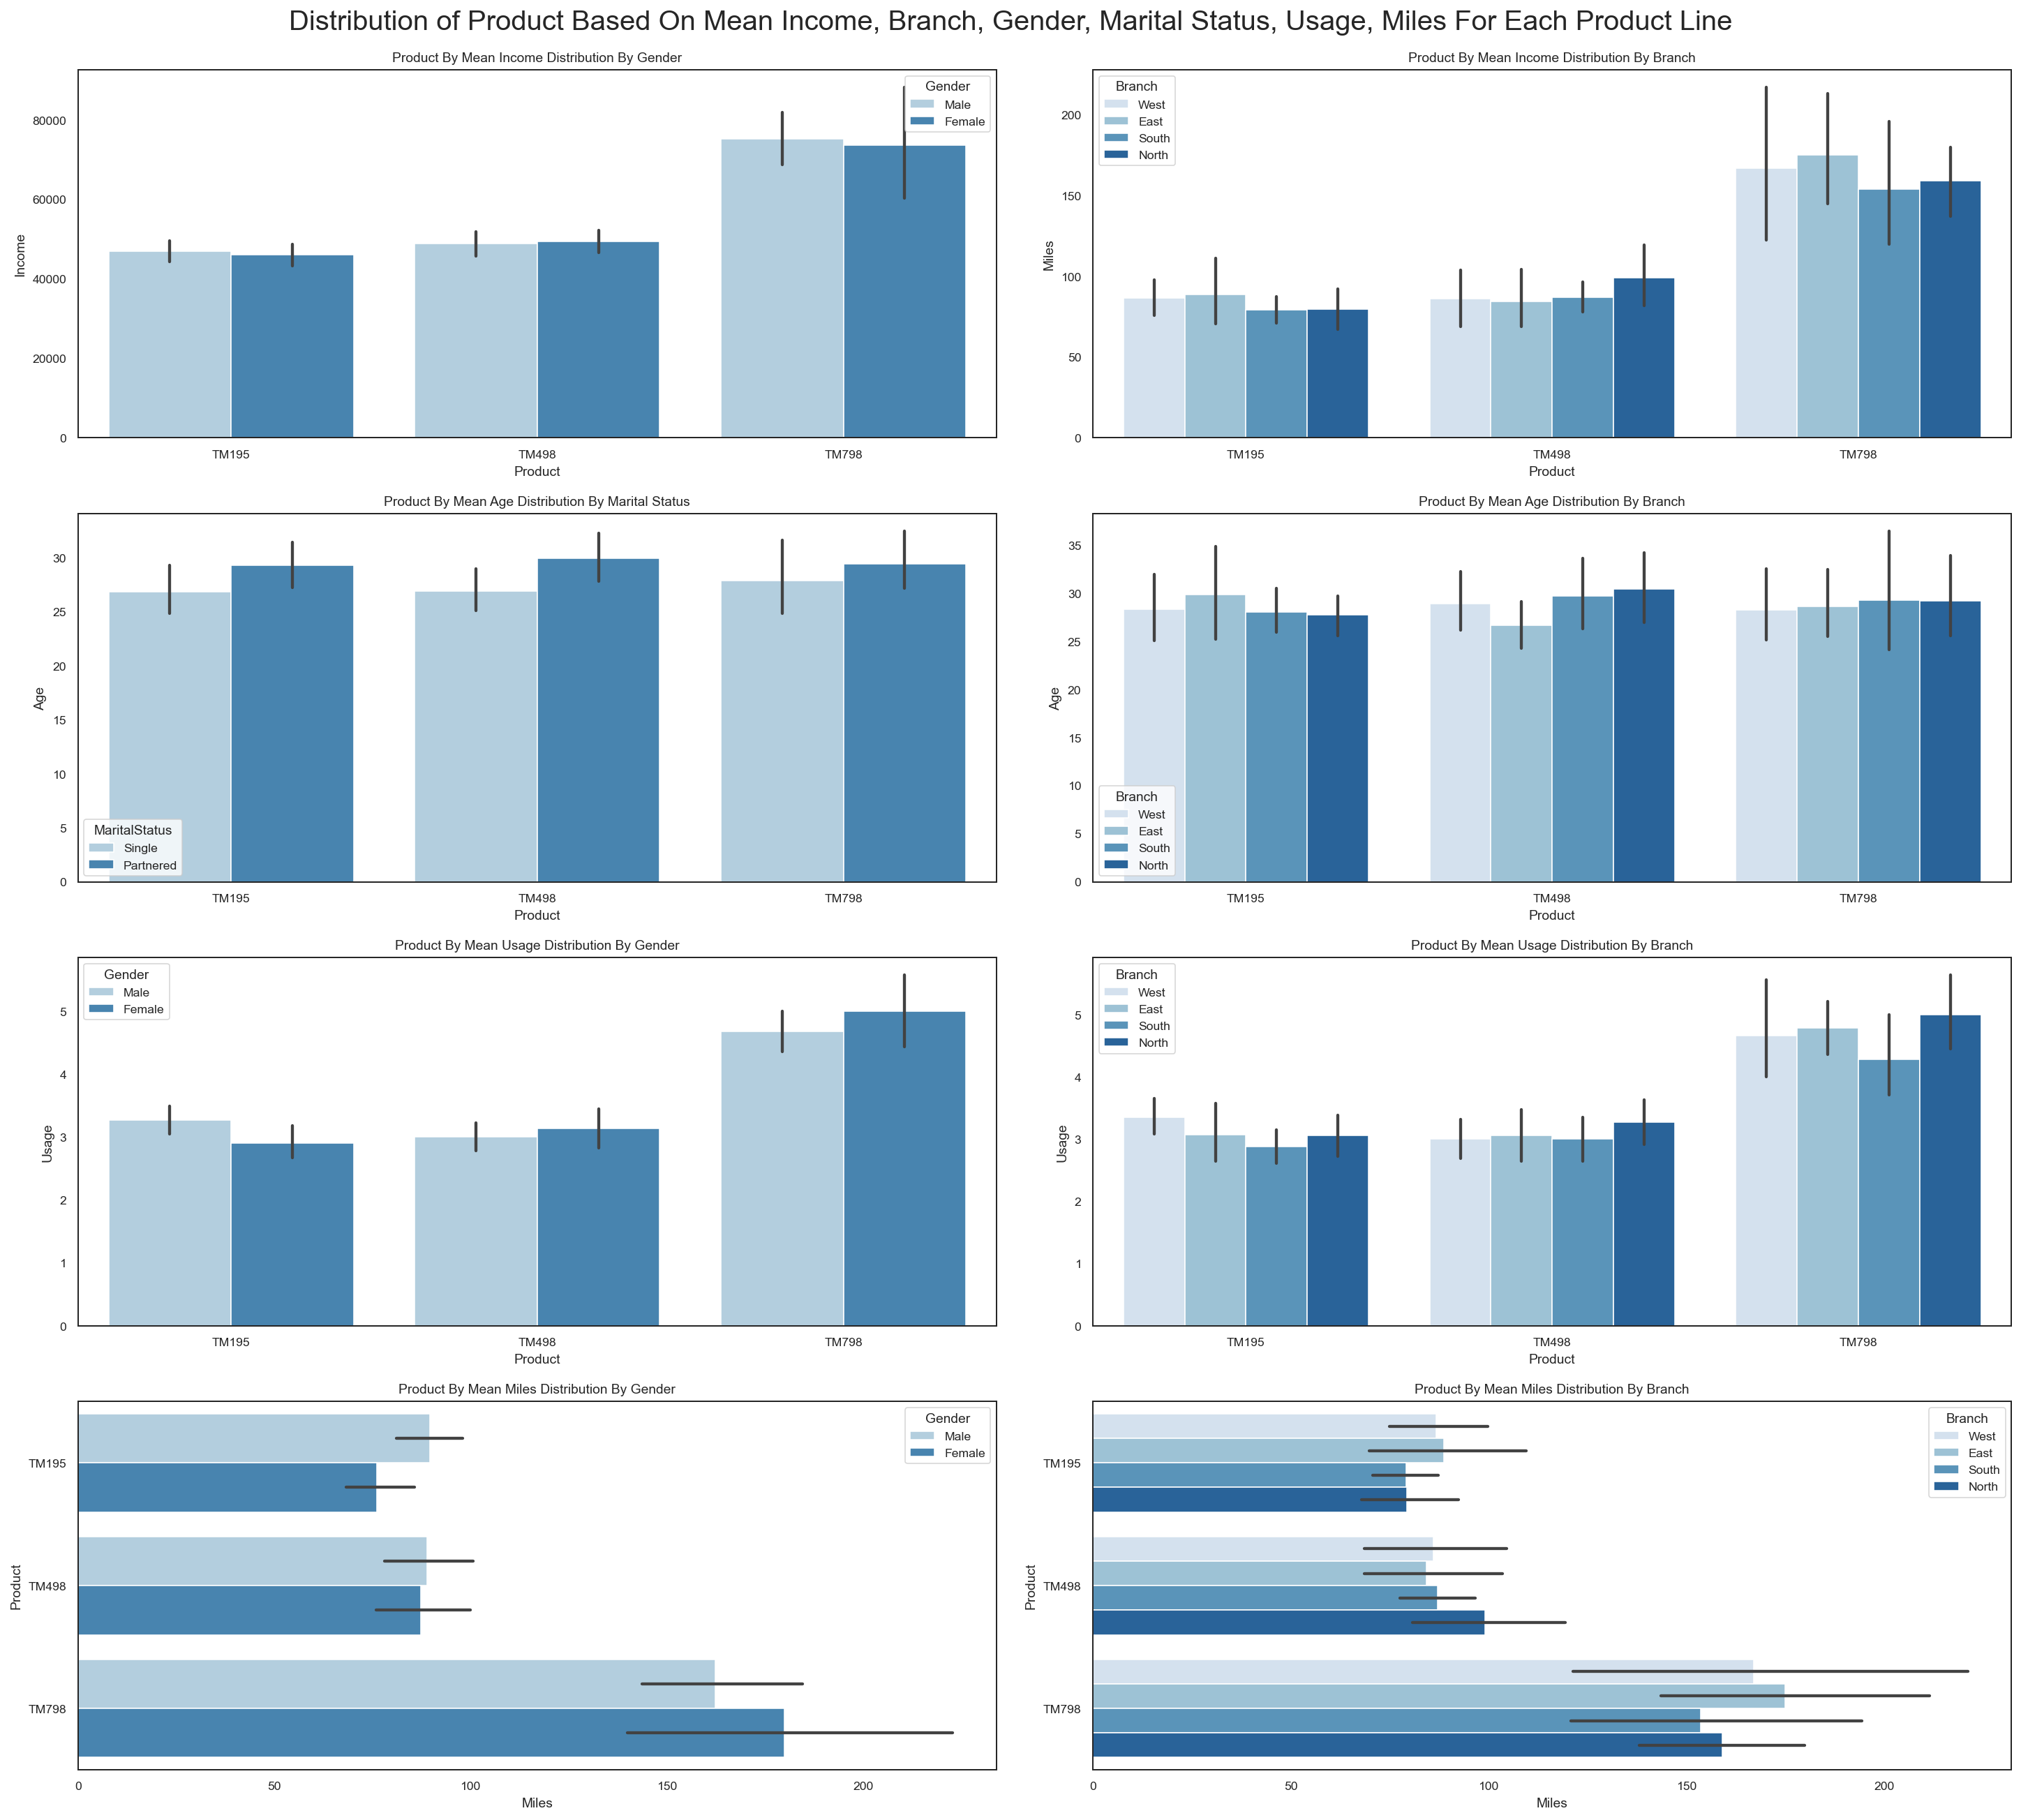

In [ ]:
# create a figure with axes of 4 rows and 2 columns
fig, ax = plt.subplots(4, 2, figsize=(20,18), constrained_layout=True) # Object oriented style 

# Set the plotting context parameters
sns.set_context('paper')
# Create bar plots using x, y with a hue & mean estimator 
sns.barplot(x = 'Product', y = 'Income', hue = 'Gender', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean, ax=ax[0,0]).set_title("Product By Mean Income Distribution By Gender")

# Set the plotting context parameters
sns.set_context('paper')
# Create bar plots using x, y with a hue & mean estimator 
sns.barplot(x = 'Product', y = 'Miles', hue = 'Branch', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean, ax=ax[0,1]).set_title("Product By Mean Income Distribution By Branch")

# Set the plotting context parameters
sns.set_context('paper')
# Create bar plots using x, y with a hue & mean estimator 
sns.barplot(x = 'Product', y = 'Age', hue = 'MaritalStatus', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean, ax=ax[1,0]).set_title("Product By Mean Age Distribution By Marital Status")

# Set the plotting context parameters
sns.set_context('paper')
# Create bar plots using x, y with a hue & mean estimator
sns.barplot(x = 'Product', y = 'Age', hue = 'Branch', data = df, palette = 'Blues', edgecolor = 'w',estimator=mean, ax=ax[1,1]).set_title("Product By Mean Age Distribution By Branch")

# Set the plotting context parameters
sns.set_context('paper')
# Create bar plots using x, y with a hue & mean estimator
sns.barplot(x = 'Product', y = 'Usage', hue = 'Gender', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean, ax=ax[2,0]).set_title("Product By Mean Usage Distribution By Gender")

# Set the plotting context parameters
sns.set_context('paper')
# Create bar plots using x, y with a hue & mean estimator
sns.barplot(x = 'Product', y = 'Usage', hue = 'Branch', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean, ax=ax[2,1]).set_title("Product By Mean Usage Distribution By Branch")

# Set the plotting context parameters
sns.set_context('paper')
# Create bar plots using x, y with a hue & mean estimator
# Horizontal orientation requires numeric `x` variable
sns.barplot(x = 'Miles', y = 'Product', hue = 'Gender', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean, orient = 'h', ax=ax[3,0]).set_title("Product By Mean Miles Distribution By Gender")

# Set the plotting context parameters
sns.set_context('paper')
# Create bar plots using x, y with a hue & mean estimator
# Horizontal orientation requires numeric `x` variable
sns.barplot(x = 'Miles', y = 'Product', hue = 'Branch', data = df, palette = 'Blues', edgecolor = 'w', estimator=mean, orient = 'h', ax=ax[3,1]).set_title("Product By Mean Miles Distribution By Branch")

# Auto adjusts subplot params so that the subplot(s) fits in to the figure area
fig.tight_layout

# State title
fig.suptitle("Distribution of Product Based On Mean Income, Branch, Gender, Marital Status, Usage, Miles For Each Product Line", fontsize=20)

# Display the plot
plt.show()   

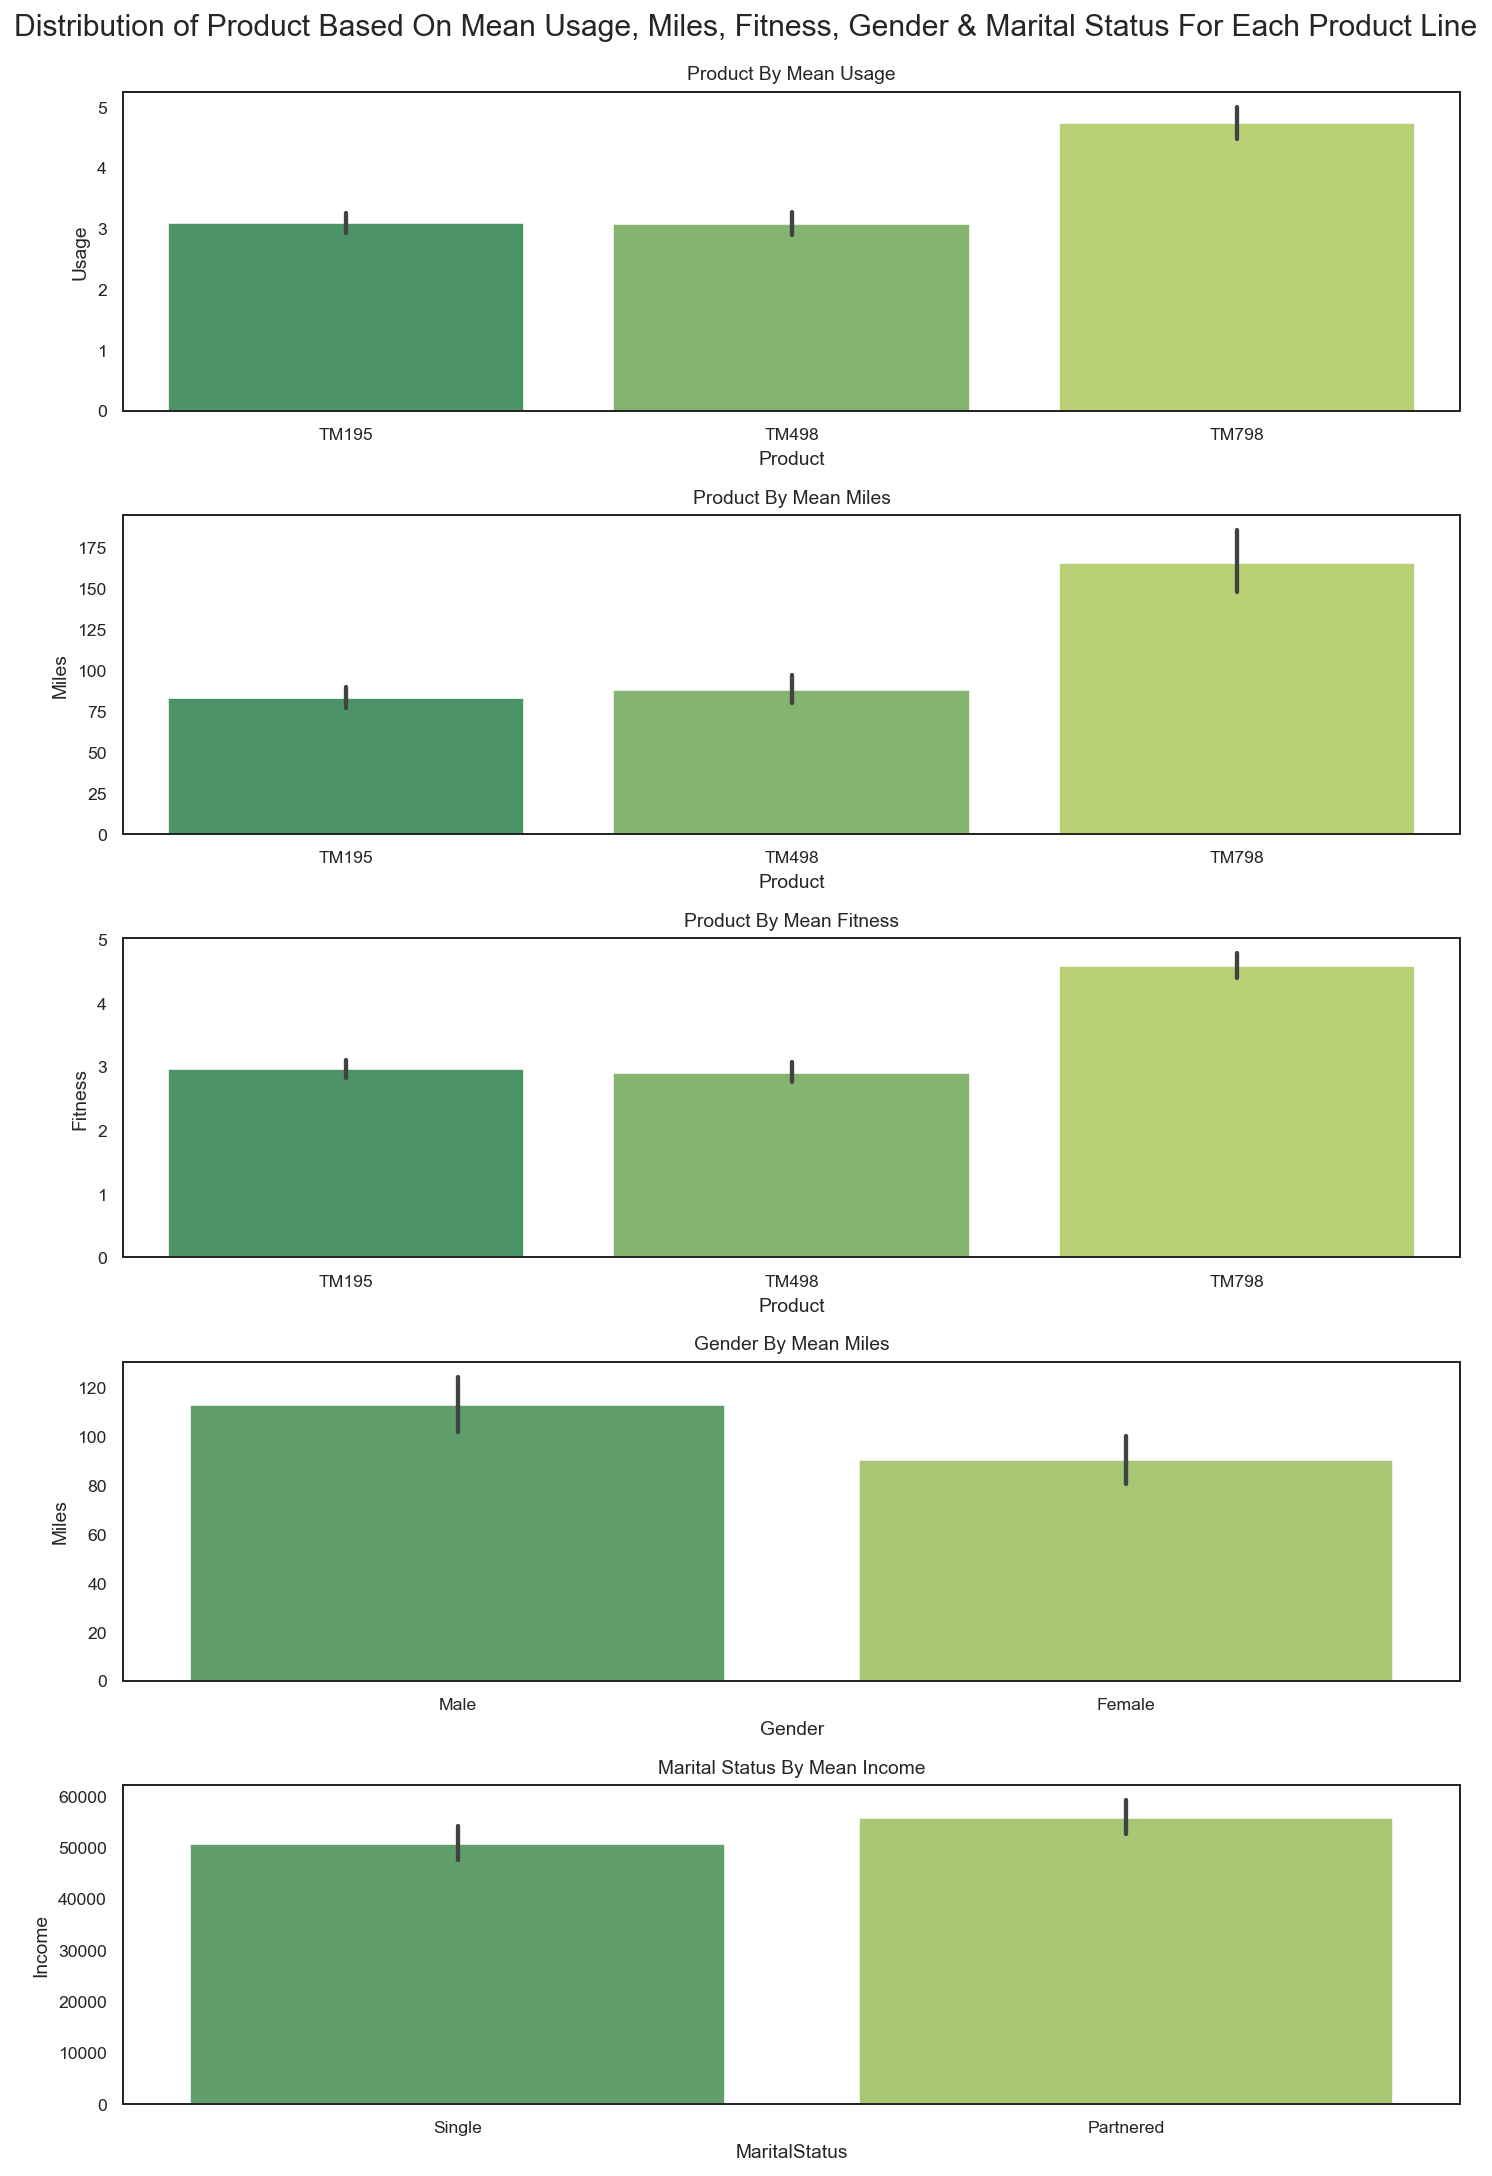

In [ ]:
# create a figure with axes of 5 rows and 1 column
fig, ax = plt.subplots(5,1, figsize=(10,15), constrained_layout=True) # Object oriented style 

# Specifying Colors
color = 'tab:olive'
# Set title, x-axis, y-axis labels
ax1.set_title('Product By Average Income & Average Usage', fontsize=16)
ax1.set_xlabel('Product', fontsize=16)
ax1.set_ylabel('Usage', fontsize=16, color=color)
# Create bar plots
ax2 = sns.barplot(x='Product', y='Usage', data = df, palette='summer', ax=ax[0]).set_title("Product By Mean Usage")
# Change the appearance of ticks, tick labels
ax1.tick_params(axis='y')
# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Specifying Colors
color = 'tab:green'
# Set title, x-axis, y-axis labels
ax1.set_title('Product By Income & Miles', fontsize=16)
ax1.set_xlabel('Product', fontsize=16)
ax1.set_ylabel('Miles', fontsize=16, color=color)
# Create bar plots
ax2 = sns.barplot(x='Product', y='Miles', data = df, palette='summer', ax=ax[1]).set_title("Product By Mean Miles")
# Change the appearance of ticks, tick labels
ax1.tick_params(axis='y')
# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Specifying Colors
color = 'tab:purple'
# Set title, x-axis, y-axis labels
ax1.set_title('Product By Income & Fitness', fontsize=16)
ax1.set_xlabel('Product', fontsize=16)
ax1.set_ylabel('Fitness', fontsize=16, color=color)
# Create bar plots
ax2 = sns.barplot(x='Product', y='Fitness', data = df, palette='summer', ax=ax[2]).set_title("Product By Mean Fitness")
# Change the appearance of ticks, tick labels
ax1.tick_params(axis='y')
# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Specifying Colors
color = 'tab:purple'
# Set title, x-axis, y-axis labels
ax1.set_title('Gender By Income & Miles', fontsize=16)
ax1.set_xlabel('Gender', fontsize=16)
ax1.set_ylabel('Miles', fontsize=16, color=color)
# Create bar plots
ax2 = sns.barplot(x='Gender', y='Miles', data = df, palette='summer', ax=ax[3]).set_title("Gender By Mean Miles")
# Change the appearance of ticks, tick labels
ax1.tick_params(axis='y')
# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# Specifying Colors
color = 'tab:cyan'
# Set title, x-axis, y-axis labels
ax1.set_title('Marital Status By Income & Age', fontsize=16)
ax1.set_xlabel('Marital Status', fontsize=16)
ax1.set_ylabel('Age', fontsize=16, color=color)
# Create bar plots
ax2 = sns.barplot(x='MaritalStatus', y='Income', data = df, palette='summer', ax=ax[4]).set_title("Marital Status By Mean Income")
# Change the appearance of ticks, tick labels
ax1.tick_params(axis='y')
# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()

# State title
fig.suptitle("Distribution of Product Based On Mean Usage, Miles, Fitness, Gender & Marital Status For Each Product Line", fontsize=15)

# Display the plot
plt.show()

C:\Users\wilt7\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:132: UserWarning:

There are no gridspecs with layoutboxes. Possibly did not call parent GridSpec with the figure= keyword



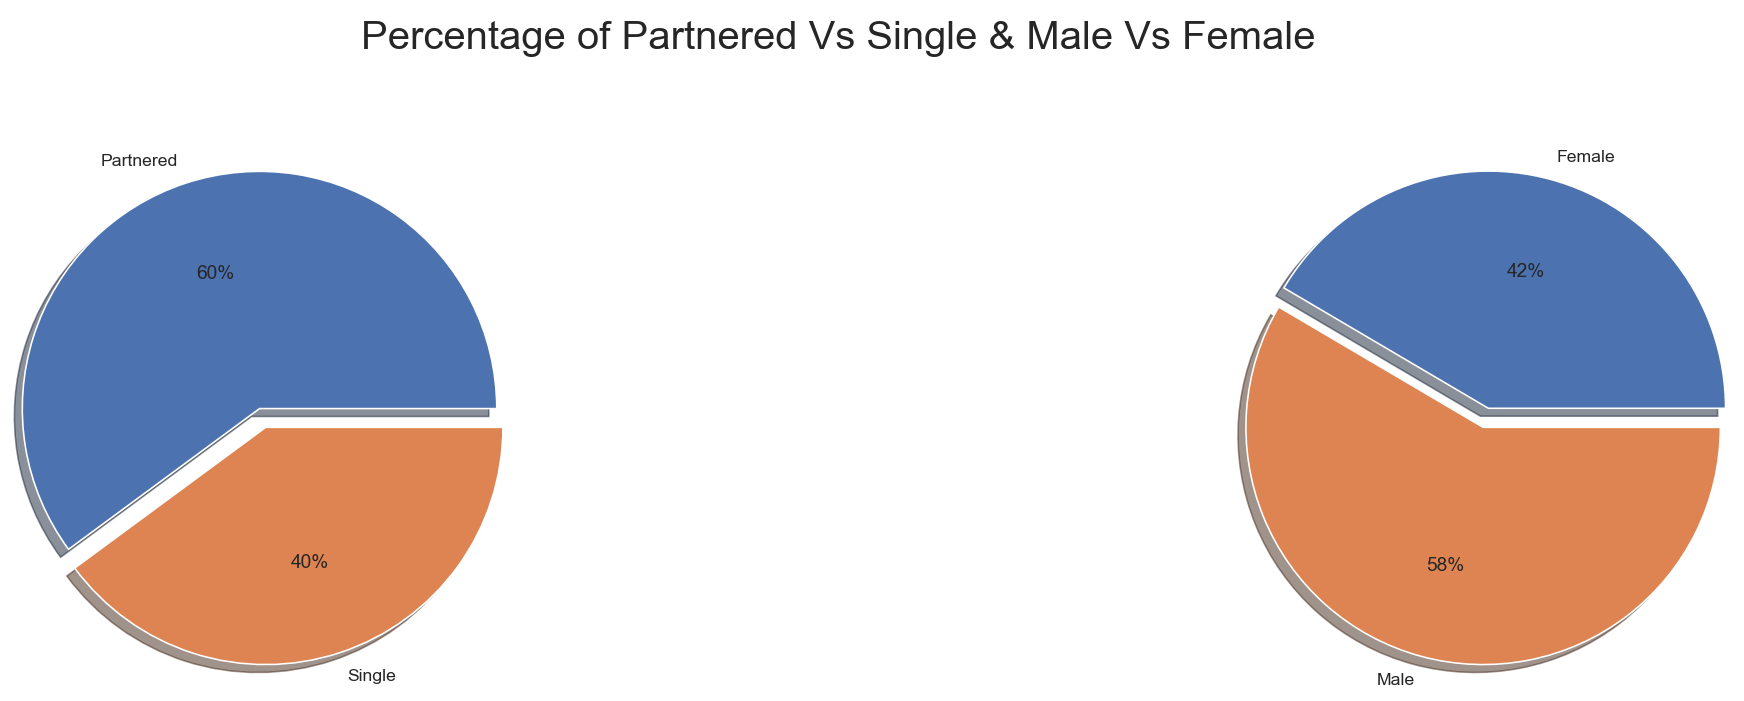

In [ ]:
# create a figure with axes of 1 row and 1 column
fig, ax = plt.subplots(1, 1, figsize=(20,10), constrained_layout=True) # Object oriented style 

# Group 'Age' by 'Gender'
genderGroup = df.groupby('Gender')['Age'].count()

# Make square figures and axes
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1)
patches, texts, autotexts = plt.pie(genderGroup,explode=(0.1,0), labels=["Female", "Male"],
                                    autopct='%.0f%%',
                                    shadow=True, radius=1.2)

# Group 'Age' by 'Marital Status'
genderGroup = df.groupby('MaritalStatus')['Age'].count()


# Make square figures and axes
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 0], aspect=1)
patches, texts, autotexts = plt.pie(genderGroup,explode=(0.1,0), labels=["Partnered", "Single"],
                                    autopct='%.0f%%',
                                    shadow=True, radius=1.2)

# Auto adjusts subplot params so that the subplot(s) fits in to the figure area
fig.tight_layout

# State title
fig.suptitle("Percentage of Partnered Vs Single & Male Vs Female", fontsize=20)

# Display the plot
plt.show()  